# Master's Capstone

--> By: James Quacinella <--

# Table of Contents

* [Abstract](#Abstract)
* [Methods](#Methods)
* [Pre-Data Collection](#Pre-Data-Collection)
* [Data Collection](#Data-Collection)
  * [Consumer Expenditure Report](#Consumer-Expenditure-Report)
  * [USDA Food Plans](#USDA-Food-Plans)
  * [Free Market Rent Data From HUD](#Free-Market-Rent-Data-From-HUD)
  * [Medical Expenditure Panel Survey from the AHRQ](#Medical-Expenditure-Panel-Survey-from-the-AHRQ)
  * [Tax Data](#Tax-Data)
* [Model Variables](#Model-Variables)
    * [Housing Costs](#Housing-Costs)
    * [Food Costs](#Food-Costs)
    * [Child Care Cost](#Child-Care-Cost)
    * [Health Insurance Costs](#Health-Insurance-Costs)
    * [Transportation Costs](#Transportation-Cost)
    * [Health Care Costs](#Health-Care-Costs)
    * [Other Necessities Cost](#Other-Necessities-Cost)
    * [Taxes](#Taxes-Data)
      * [Payroll Taxes](#Payroll-Taxes)
      * [State Tax Rate](#State-Tax-Rate)
      * [Federal Income Tax Rate](#Federal-Income-Tax-Rate)
* [Creating Final Merged Data Frame](#Creating-Final-Merged-Data-Frame)
* [Introductory Analysis](#Introductory-Analysis)
  * [Living Wage in Individual Counties](#Living-Wage-in-Individual-Counties)
  * [State Averages of the Living Wage](#State-Averages-of-the-Living-Wage)
  * [Choropleth Of Counties: 2004, 2006, 2014](#Choropleth-Of-Counties:-2004,-2006,-2014)
  * [Regional Averages of the Living Wage](#Regional-Averages-of-the-Living-Wage)
  * [National Average Breakdown Across 2004 - 2014](#National-Average-Breakdown-Across-2004---2014)  
  * [Living Wage Distribution in Most Populous Counties](#Living-Wage-Distribution-in-Most-Populous-Counties)
  * [Living Wage Distribution by Race](#Living-Wage-Distribution-by-Race)
    * [Loading Race Data from 2010 Census](#Loading-Race-Data-from-2010-Census)
    * [Living Wage County (Non-Weighted\) Breakdown by Race](#Living-Wage-County-Non-Weighted-Breakdown-by-Race)
    * [Living Wage County (Weighted\) Breakdown by Race](#Living-Wage-County-Weighted-Breakdown-by-Race)
    * [Population Weighted Averages Broken Down By Race](#Population-Weighted-Averages-Broken-Down-By-Race)
* [Living Wage Gap](#Living-Wage-Gap)
* [Correlations with Economic Metrics](#Correlations-with-Economic-Metrics)
* [Appendix](#Appendix---Data-Tables)
  * [Data Tables](#Appendix---Data-Tables)
  * [Things to Revisit](#Appendix---Things-to-Revisit)


# Abstract

**Objectives:** This study will extend an established model for estimating the current living wage in 2014 to the past decade for the purpose of:

* an exploratory analysis trends in the gap between the estimated living wage and the minimum wage
* evaluating any correlation between the living wage gap and other economic metrics, including public funds spent on social services

**Methods:** The original data set for this model is for 2014. This study will extend the data sources of this model into the past to enable trend analysis. Data for economic metrics from public data sources will supplement this data for correlation analysis.


# Methods

## Model

The original model proposed estimated the living wage in terms of 9 variables:

** *basic_needs_budget* ** = *food_cost* + *child_care_cost* + ( *insurance_premiums* + *health_care_costs* ) + *housing_cost* + *transportation_cost* + *other_necessities_cost*

** *living_wage* ** = *basic_needs_budget* + ( *basic_needs_budget* \* *tax_rate* )

## Data Sources

The following data sources are used to find estimates of the model variables:

* The food cost is estimated from data from the USDA’s low-cost food plan national average in June 2014.
* Child care is based off state-level estimates published by the National Association of Child Care Resource and Referral Agencies.
* Insurance costs are based on the insurance component of the 2013 Medical Expenditure Panel Survey.
* Housing costs are estimated from the HUD Fair Market Rents (FMR) estimates
* Other variables are pulled from the 2014 Bureau of Labor Statistics Consumer Expenditure Survey.

These data sets extend into the past, allowing for calculating the model for years past. The data will also have to be adjusted for inflation 6.

## Analytic Approach

First, data will be gathered from the data sources of the original model but will be extended into the past. The methodology followed by the model will be replicated to come up with a data set representing estimates of the living wage across time. After the data set is prepared, the trend of the living wage as compared to minimum wage can be examined. Has the gap increased or decreased over time, and at what rate? Have certain areas seen larger than average increases or decreases in this gap? 

Once preliminary trend analysis is done, this data set will be analyzed in comparison to other economic trends to see if any interesting correlations can be found. Correlations to GDP growth rate and the national rate of unemployment can be made, but the primary investigation will be to see if the living wage gap correlates to national spending on SNAP (Food stamps). In other words, we will see if there is any (potentially time lagged) relationship between the living wage gap and how much the United States needs to spend to support those who cannot make ends meet. A relationship here can potentially indicate that shrinking this gap could lower public expenditures.


## Presentation Of Results

Results will be presented for both parts of the data analysis. For studying the living wage gap trends, this report will present graphs of time series, aggregated in different ways, of the living wage as well as the living wage gap. Some of these time series will be presented along side data on public expenditures on SNAP to visually inspect for correlations.

## Background / Sources

- Glasmeier AK, Nadeau CA, Schultheis E: LIVING WAGE CALCULATOR User’s Guide / Technical Notes 2014 Update
- USDA low-cost food plan, June, 2014
- Child Care in America 2014 State fact sheets
- 2013 Medical Expenditure Panel Survey Available
- Consumer Expenditure Survey
- Inflation Calculator

------

------

------

# Pre-Data Collection

([TOC](#Table-of-Contents))

Lets do all of our imports now:

In [3]:
%pylab inline

# Standard stuff
import os
import itertools
from collections import OrderedDict, defaultdict
import pickle

# Data science!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# For crawling insurance data
from bs4 import BeautifulSoup

# Useful for display purposes
from prettytable import PrettyTable
# from IPython.core.display import HTML
from IPython.display import display, HTML
from pprint import pprint

# Used for determining string similarity for county names
# import editdist


# Path to local dir on my laptop
PROJECT_PATH = "/home/james/Development/Masters/Thesis"

def constant_factory(value):
    ''' Always prodcues a constant value; used fo defaultdict '''
    return itertools.repeat(value).next

def caption(msg, tablenum):
    ''' Help convert text into suitable table caption '''
    return "<br><b>Table %d - %s</b>" % (tablenum, msg)

Populating the interactive namespace from numpy and matplotlib


/home/james/Development/Masters/masters/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Lets setup some inflation multipliers:

In [4]:
# Multiply a dollar value to get the equivalent 2014 dollars
# Original numbers from model; used to confirm methodology matches the original model
inflation_multipliers = {
    2010: 1.092609, 
    2011: 1.059176,
    2012: 1.037701,
    2013: 1.022721,
    2014: 1.0
}

# Updated inflation numbers should scale to 2015 dollars
updated_inflation_multipliers = {
    2000: 1.3811731,
    2001: 1.3429588,
    2002: 1.3220567,
    2003: 1.2925978,
    2004: 1.2590683,
    2005: 1.2178085,
    2006: 1.179752,
    2007: 1.1470807,
    2008: 1.1046664,
    2009: 1.1086106, 
    2010: 1.0907198, 
    2011: 1.0573444,
    2012: 1.0359069,
    2013: 1.0209524,
    2014: 1.004655
}

Global identifiers used throughout the project:

In [5]:
# Constants used to refer to US regions
REGION_EAST = 'east'
REGION_MIDWEST = 'midwest'
REGION_SOUTH = 'south'
REGION_WEST = 'west'
REGION_BASE = 'base'   # Used for when a state is not in a region (Alaska, Hawaii mostly)

# Create a initial state to region mapping to use for regional weighting
state_to_region_mapping = defaultdict(constant_factory(REGION_BASE))
    
state_to_region_mapping.update(
    { 
    'PA': REGION_EAST, 'NJ': REGION_EAST, 'NY': REGION_EAST, 'CT': REGION_EAST, 'MA': REGION_EAST,
    'NH': REGION_EAST, 'VT': REGION_EAST, 'ME': REGION_EAST, 'RI': REGION_EAST, 
    'OH': REGION_MIDWEST, 'IL': REGION_MIDWEST, 'IN': REGION_MIDWEST, 'WI': REGION_MIDWEST, 'MI': REGION_MIDWEST,
    'MN': REGION_MIDWEST, 'IA': REGION_MIDWEST, 'MO': REGION_MIDWEST, 'KS': REGION_MIDWEST, 'NE': REGION_MIDWEST,
    'SD': REGION_MIDWEST, 'ND': REGION_MIDWEST,
    'TX': REGION_SOUTH, 'OK': REGION_SOUTH, 'AR': REGION_SOUTH, 'LA': REGION_SOUTH, 'MS': REGION_SOUTH,
    'AL': REGION_SOUTH, 'GA': REGION_SOUTH, 'FL': REGION_SOUTH, 'SC': REGION_SOUTH, 'NC': REGION_SOUTH,
    'VA': REGION_SOUTH, 'WV': REGION_SOUTH, 'KY': REGION_SOUTH, 'TN': REGION_SOUTH, 'MD': REGION_SOUTH,
    'DE': REGION_SOUTH,
    'CA': REGION_WEST, 'OR': REGION_WEST, 'WA': REGION_WEST, 'NV': REGION_WEST, 'ID': REGION_WEST,
    'UT': REGION_WEST, 'AZ': REGION_WEST, 'MT': REGION_WEST, 'WY': REGION_WEST, 'CO': REGION_WEST,
    'NM': REGION_WEST, 'AK': REGION_BASE, 'HI': REGION_BASE
})

# Create the inverse mapping of region to list of states
region_to_state_mapping = { }
for state, region in state_to_region_mapping.iteritems():
    if region in region_to_state_mapping:
        region_to_state_mapping[region].append(state)
    else:
        region_to_state_mapping[region] = [state]

# State to full statename mapping
state_to_statename_mapping = {u'Federal': 'federal', u'AK': u'alaska', u'AL': u'alabama', u'AR': u'arkansas', u'AZ': u'arizona', 
  u'CA': u'california', u'CO': u'colorado', u'CT': u'connecticut', u'DC': u'district of columbia', u'DE': 
  u'delaware', u'FL': u'florida', u'GA': u'georgia', u'HI': u'hawaii', u'IA': u'iowa', u'ID': u'idaho', 
  u'IL': u'illinois', u'IN': u'indiana', u'KS': u'kansas', u'KY': u'kentucky', u'LA': u'louisiana', 
  u'MA': u'massachusetts', u'MD': u'maryland', u'ME': u'maine', u'MI': u'michigan', u'MN': u'minnesota', 
  u'MO': u'missouri', u'MS': u'mississippi', u'MT': u'montana', u'NC': u'north carolina', u'ND': u'north dakota', 
  u'NE': u'nebraska', u'NH': u'new hampshire', u'NJ': u'new jersey', u'NM': u'new mexico', u'NV': u'nevada', 
  u'NY': u'new york', u'OH': u'ohio', u'OK': u'oklahoma', u'OR': u'oregon', u'PA': u'pennsylvania', 
  u'RI': u'rhode island', u'SC': u'south carolina', u'SD': u'south dakota', u'TN': u'tennessee', u'TX': u'texas', 
  u'UT': u'utah', u'VA': u'virginia', u'VT': u'vermont', u'WA': u'washington', u'WI': u'wisconsin', 
  u'WV': u'west virginia', u'WY': u'wyoming'}

statename_to_state_mapping = {statename:state for (state, statename) in state_to_statename_mapping.iteritems()}

Lets setup regional differences for the food data:

In [6]:
# Multiply price of food by regional multipler to get better estimate of food costs
food_regional_multipliers = {
    REGION_EAST: 0.08,
    REGION_WEST: 0.11,
    REGION_SOUTH: -0.07,
    REGION_MIDWEST: -0.05,
}

Create list of values for the years we will work with in the model

In [7]:
model_years = range(2004, 2015)

Some useful FIPS codes:

In [8]:
# FIPS code for NYC Counties Kings 
newyork_county = 3606199999
kings_county = 3604799999
queens_county = 3608199999
bronx_county = 3600599999
richmond_count = 3608599999
nyc_counties = [newyork_county, kings_county, queens_county, bronx_county, richmond_count]

# FIPS code for Trenton, NJ
mercer_county = 3402199999

# Fips code for Orange county
orange_county = 601399999

Global knobs for visuals

In [9]:
global_fontweight = 'bold'
global_fontsize = 20
# global_theme = "whitegrid"
global_theme= "darkgrid"
global_theme_options = {"axes.facecolor": ".9"}

current_color_palette = sns.color_palette()

def setup_custom_visuals():
    sns.set_style(global_theme, global_theme_options)

    font = {'weight' : global_fontweight,
            'size'   : global_fontsize}
    tick = {
        'labelsize' : 12  # fontsize of the x any y labels
    }

    rc('font', **font)  # pass in the font dict as kwargs
    rc('xtick', **tick)
    rc('ytick', **tick)
    
def setup_default_visuals():
    rcdefaults()
    sns.set_style(global_theme, global_theme_options)

setup_default_visuals()
setup_custom_visuals()

/home/james/Development/Masters/masters/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


------

------

------

#  Data Collection 

([TOC](#Table-of-Contents))

The following sections will outline how I gathered the data for the various model parameters as well as other data we need to calculate their values. The original model was made for 2014 data and extending this data to the past means we need to be careful that any changes in the underlying data methodology of these parameters needs to be noted.

## Data Sources

### Consumer Expenditure Report

Wget commands used to get the Consumer Expenditure Reports:

In [ ]:
# Get CEX for 2013 and 2014 (XLSX format)
for i in `seq 2013 2014`; do wget http://www.bls.gov/cex/$i/aggregate/cusize.xlsx -O ${i}_cex.xlsx; done

# Get CEX for 2004 - 2012 (XLS format)
for i in `seq 2004 2012`; do wget http://www.bls.gov/cex/$i/aggregate/cusize.xls -O ${i}_cex.xls; done

# Get CEX for 2001 to 2003 (TXT format)
for i in `seq 2001 2003`; do wget http://www.bls.gov/cex/aggregate/$i/cusize.txt -O ${i}_cex.txt; done


# Get CEX region for 2013 and 2014 (XLSX format)
for i in `seq 2013 2014`; do wget http://www.bls.gov/cex/$i/aggregate/region.xlsx -O ${i}_region_cex.xlsx; done

# Get CEX region for 2004 - 2012 (XLS format)
for i in `seq 2004 2012`; do wget http://www.bls.gov/cex/$i/aggregate/region.xls -O ${i}_region_cex.xls; done

# Get CEX region for 2001 to 2003 (TXT format)
for i in `seq 2001 2003`; do wget http://www.bls.gov/cex/aggregate/$i/region.txt -O ${i}_region_cex.txt; done

### USDA Food Plans

Wget commands used to gather data files:

In [ ]:
# Change command to get '10 - '15
for i in {1..9}; do  wget http://www.cnpp.usda.gov/sites/default/files/usda_food_plans_cost_of_food/CostofFoodJun0$i.pdf; done

### Free Market Rent Data From HUD

Below are the wget commands for getting the FMR data

In [ ]:
cd data/fmr
for i in `seq 2014 2015`; do wget http://www.huduser.gov/portal/datasets/fmr/fmr${i}f/FY${i}_4050_RevFinal.xls -O fmr${i}.xlsx; done
for i in `seq 2010 2013`; do wget http://www.huduser.gov/portal/datasets/fmr/fmr${i}f/FY${i}_4050_Final.xls -O fmr${i}.xlsx; done
for i in `seq 2009 2009`; do wget http://www.huduser.gov/portal/datasets/fmr/fmr${i}r/FY${i}_4050_Rev_Final.xls -O fmr${i}.xlsx; done

# GRRRR
wget http://www.huduser.gov/portal/datasets/fmr/fmr2008r/FMR_county_fy2008r_rdds.xls
wget http://www.huduser.gov/portal/datasets/fmr/fmr2007f/FY2007F_County_Town.xls
wget http://www.huduser.gov/portal/datasets/fmr/fmr2006r/FY2006_County_Town.xls
wget http://www.huduser.gov/portal/datasets/fmr/fmr2005r/Revised_FY2005_CntLevel.xls
wget http://www.huduser.gov/portal/datasets/FMR/FMR2004F/FMR2004F_County.xls
wget http://www.huduser.gov/portal/datasets/fmr/FMR2003F_County.xls
wget http://www.huduser.gov/portal/datasets/fmr/FMR2002F.xls

In [23]:
# Counties dict will map county ID to useful infomation, mostly region and state
counties = { }

### Medical Expenditure Panel Survey from the AHRQ

Below are the wget commands used to download this data. This data will have to be further parsed from HTML.

In [ ]:
# Load insurance data
cd data/insurance
for i in `seq 2001 2014`; do 
    wget -O ${i}_tiic2.html http://meps.ahrq.gov/mepsweb/data_stats/summ_tables/insr/state/series_2/${i}/tiic2.htm ;
done

### Tax Data

Here is all the files we need for tax data:

In [ ]:
# Data from Tax Foundation on individual tax rates per state per year
cd data/taxes
wget -O State_Individual_Income_Tax_Rates_2000-2014.xlsx http://taxfoundation.org/sites/taxfoundation.org/files/docs/State%20Individual%20Income%20Tax%20Rates%2C%202000-2014.xlsx

### Median Wage Data

In [ ]:
# Download data from census website
cd data/census/SAIPE
for i in `seq 10 14`; do wget http://www.census.gov/did/www/saipe/downloads/estmod${i}/est${i}ALL.xls ; done
for i in `seq 4 9`; do wget http://www.census.gov/did/www/saipe/downloads/estmod0${i}/est0${i}ALL.xls ; done

### Minimum Wage Data

**TODO:** Fill in

---

---

---

## Model Variables  

[TOC](#Table-of-Contents)

### Housing Costs

Definition from the model:

> We assumed  that  a  one  adult  family  would  rent a  single occupancy unit (zero bedrooms) for an individual adult household, that a two adult family would  rent a one bedroom apartment,

The counties are identified by the FIPS code, which is just state code + county code + subcounty code (only post 2005). 

We need to do some string matching to find FIPS codes for 2002, since they are not in the file. Exact matches work for 84% of the data. The other data is filled in via finding name with smallest levishtein distance. Used [py-editdist]( http://www.mindrot.org/projects/py-editdist) instead of nltk's implementation due to speed issues.

Final data can be found in the [Appendix: Housing Costs Data Table](#Housing-Costs-Data-Table).

#### Methodology Confidence 

**TODO**

#### TODO

* Fix 2002 issue
* Look into 2005 and 2006 transition


In [621]:
# Fair Market Rent data
fmr_data = { }

def pad_county(county):
    ''' Pad counties to three digits when we need to construct one manually. '''
    return '%03d' % county

def pad_fips(fip):
    ''' Add 99999 to end of fip code (which nullifies the subcounty identifier) '''
    return int(str(fip) + '99999')

In [622]:
# For now, loading 2002 - 2014
for year in range(2002, 2015):
    with open(PROJECT_PATH + "/data/fmr/fmr%d.csv" % year, 'rb') as csvfile:
        # Store dataframe from csv into dict
        fmr_data[year] = pd.read_csv(csvfile)
        
        # Lower case headings to make life easier
        fmr_data[year].columns = map(str.lower, fmr_data[year].columns)
        
        # Custom processing per year
        if year > 2012:
            fmr_data[year] = fmr_data[year][["fmr1", "county", "cousub", "countyname", "fips2010", "pop2010", "state", "state_alpha"]]
            fmr_data[year].rename(columns={'fips2010':'fips', 'pop2010': 'pop'}, inplace=True)
            # fmr_data[year] = fmr_data[year].query('cousub == 99999').reset_index(drop=True)
            fmr_data[year]["fips"] = fmr_data[year]["fips"].map(lambda x: (x / 100000) * 100000 + 99999)
            fmr_data[year] = fmr_data[year].drop_duplicates(subset=["state", "countyname"])
        elif year > 2005:
            fmr_data[year] = fmr_data[year][["fmr1", "county", "cousub", "countyname", "fips", "pop2000", "state", "state_alpha"]]
            fmr_data[year].rename(columns={'pop2000': 'pop'}, inplace=True)
            # fmr_data[year] = fmr_data[year].query('cousub == 99999').reset_index(drop=True)
            fmr_data[year]["fips"] = fmr_data[year]["fips"].map(lambda x: (x / 100000) * 100000 + 99999)
            fmr_data[year] = fmr_data[year].drop_duplicates(subset=["state", "countyname"])
        elif year == 2005:
            fmr_data[year] = fmr_data[year][["fmr_1bed", "county", "countyname", "pop2000", "state", "state_alpha", "stco"]]
            fmr_data[year].rename(columns={'stco':'fips', 'fmr_1bed': 'fmr1', 'pop2000': 'pop'}, inplace=True)
            fmr_data[year]['fips'] = fmr_data[year]['fips'].map(pad_fips)
        elif year == 2004:
            fmr_data[year] = fmr_data[year][["new_fmr1", "county", "countyname", "pop100", "state", "state_alpha"]]
            fmr_data[year]['fips'] = fmr_data[year]['state'].map(str) + fmr_data[year]['county'].map(pad_county)
            fmr_data[year].rename(columns={'new_fmr1': 'fmr1', 'pop100': 'pop'}, inplace=True)
            fmr_data[year]['fips'] = fmr_data[year]['fips'].map(pad_fips)
        elif year == 2003:
            fmr_data[year] = fmr_data[year][["fmr1", "county", "countyname", "pop", "state", "state_alpha"]]
            fmr_data[year]['fips'] = fmr_data[year]['state'].map(str) + fmr_data[year]['county'].map(pad_county)
            fmr_data[year]['fips'] = fmr_data[year]['fips'].map(pad_fips)
        elif year == 2002:
            # NOTE: we have to calculate FIPS codes by hand in cell below
            fmr_data[year] = fmr_data[year][["fmr1br", "areaname", "st"]]
            fmr_data[year].rename(columns={'st':'state_alpha', 'fmr1br': 'fmr1', 'areaname': 'countyname'}, inplace=True)

        # Inflation
        fmr_data[year]['fmr1_inf'] = fmr_data[year]['fmr1'] * updated_inflation_multipliers[year]
        
        # Add region column
        # METHOD: the defaultdict will use region_base if the state is not in the initial state to region mapping
        fmr_data[year]['region'] = fmr_data[year]['state_alpha'].map(lambda x: state_to_region_mapping[x])

In [243]:
# year = 2004
# f = open(PROJECT_PATH + "/data/fmr/fmr%s.csv" % year, 'rb')
# df = pd.read_csv(f)
# df.columns = map(str.lower, df.columns)
# df = df[["new_fmr1", "county", "countyname", "pop100", "state", "state_alpha"]]

# df['fips'] = df['state'].map(str) + df['county'].map(pad_county)
# df.rename(columns={'new_fmr1': 'fmr1'}, inplace=True)
# df['fips'] = df['fips'].map(pad_fips)
# df[ df['state_alpha'] == 'NH' ]

In [ ]:
# year = 2005
# f = open(PROJECT_PATH + "/data/fmr/fmr%s.csv" % year, 'rb')
# df2 = pd.read_csv(f)
# df2.columns = map(str.lower, df2.columns)

# df2 = df2[["fmr_1bed", "county", "countyname", "pop2000", "state", "state_alpha", "stco"]]
# df2.rename(columns={'stco':'fips', 'fmr_1bed': 'fmr1'}, inplace=True)
# df2['fips'] = df2['fips'].map(pad_fips)

# df2[ df2['state_alpha'] == 'NH' ]
# fmr_data[2005][fmr_data[2005]['state_alpha'] == 'NH']

In [14]:
# set(fmr_data[2005]['state_alpha'].values) - set(fmr_data[2006]['state_alpha'].values)

{'CT', 'MA', 'ME', 'NH', 'RI', 'VT'}

In [342]:
##### Handle 2002 data ######

# Custom comparator to compare column of strings to given string
def compare_lambda(y):
    def compare(x):
        return (x[0], x[1], editdist.distance(x[1], y), x[2])
    return compare

# Init list of fips we need to find and a bitmap of which 2002 counties we processes
fips = [ None ] * len(fmr_data[2002]['countyname'])
found_bitmap = [ False ] * len(fmr_data[2002]['countyname'])

# For each count in 2002 ...
# for idx, countyname in enumerate(fmr_data[2002]['countyname']):
for idx, county_and_state in enumerate(fmr_data[2002][['countyname', 'state_alpha']].values.tolist()):
    (countyname, state) = county_and_state
    
    # See if any row mathes this countyname exactly
    county_matches = fmr_data[2003][ (fmr_data[2003]['state_alpha'] == state) & (fmr_data[2003]['countyname'].str.lower() == countyname.lower()) ]
    
    if len(county_matches) > 0:
        fips_val = county_matches['fips'].values[0]
        found_bitmap[idx] = True
        fips[idx] = fips_val

In [ ]:
##### Handle 2002 data ######

# For each county in 2002 ...
# for idx, countyname in enumerate(fmr_data[2002]['countyname']):
for idx, county_and_state in enumerate(fmr_data[2002][['countyname', 'state_alpha']].values.tolist()):
    (countyname, state) = county_and_state
        
    # If already matched, we skip; otherwise ...
    if not found_bitmap[idx]:
        # Get list of counties (as tuples) in 2003 which we try to match to
        # good_counties = list(enumerate(fmr_data[2003]['countyname']))
        good_counties = list(enumerate([ list(i) for i in fmr_data[2003][ fmr_data[2003]['state_alpha'] == state ][['countyname', 'fips']].values]))

        if len(good_counties) == 0:
            continue
        
        # Get list of distances from 2002 countyname to all 2003 countynames
        # NOTE: use of compare_lambda to create custom comparator that also 
        # returns data in (idx, countyname, levdist) form
        distances = map(compare_lambda(countyname.lower()), 
                        map(lambda x: (x[0], x[1][0].lower(), x[1][1]), 
                            good_counties))
        
        # Find the minimum distance (with custom key to only compare third element, which is levdist)
        min_distance = min(distances, key=lambda x: x[2])

        
        # Update bitmap and store appropriate FIPS code from 2003 
        found_bitmap[idx] = True
        fips[idx] = min_distance[3]
        
# Add calculated fips to new column in 2002
fmr_data[2002]['fips'] = fips

In [623]:
##### Construct final multi-level dataframe #####

fmr_df = pd.DataFrame()
for year in model_years:
    mindex = pd.MultiIndex.from_tuples(zip([year]*len(fmr_data[year]), fmr_data[year]['fips']), names=["year", "fips"])
    new_df = fmr_data[year]
    new_df.index = mindex
    new_df.columns = fmr_data[year].columns
    fmr_df = pd.concat([fmr_df, new_df])

# fmr_df.to_csv("fmr_df.v1.csv")

In [248]:
# [ list(i) for i in fmr_data[2003][ fmr_data[2003]['state_alpha'] == 'OR' ][['countyname', 'fips']].values]

# fmr_data[2002][ fmr_data[2002]['state_alpha'] == 'OR' ][['countyname', 'fips']].values

# np.sum(found_bitmap) / float(len(found_bitmap))

# print len(set(fmr_data[2002][ fmr_data[2002]['state_alpha'] == 'NY' ]['fips']))
# print len(set(fmr_data[2003][ fmr_data[2003]['state_alpha'] == 'NY' ]['fips']))

# set(fmr_data[2003][ fmr_data[2003]['state_alpha'] == 'NY' ]['fips']).difference(set(fmr_data[2002][ fmr_data[2002]['state_alpha'] == 'NY' ]['fips']))

## Filter out FIPS that are consistent

Seems like data from 2002 - 2003 is iffy with respect to matching counties; restricting the analysis from 2004 for now, until I can figure out a way to do better mapping

In [14]:
countyset = set(fmr_data[2004]['fips'])
# print len(countyset)

# Create set that is the intersection of all fips values
for year in range(2005, 2014):
    countyset = countyset.intersection(set(fmr_data[year]['fips']))

# Filter out each dataframe based on above set
for year in range(2005, 2014):
    fmr_data[year] = fmr_data[year][ fmr_data[year].isin({'fips': countyset})['fips'].values ]

# Confirm
# print fmr_data[2004].sort('fips')
# print fmr_data[2005].sort('fips')

#### Issue with county change from 2005 to 2006

In [15]:
for year in model_years:
    x = set(fmr_data[year]['fips'])
    y = set(fmr_data[year+1]['fips'])
    print("Diff between %d and %d is: %s" % (year, year+1, len(y.difference(x))))
    print("Diff between %d and %d is: %s" % (year, year+1, len(x.difference(y))))
    print

# print(list(set(fmr_data[2005]['fips']))[0:10])
# print(list(set(fmr_data[2006]['fips']))[0:10])

print set(fmr_data[2006]['fips']).difference(set(fmr_data[2005]['fips']))

Diff between 2004 and 2005 is: 0
Diff between 2004 and 2005 is: 103

Diff between 2005 and 2006 is: 0
Diff between 2005 and 2006 is: 0

Diff between 2006 and 2007 is: 0
Diff between 2006 and 2007 is: 0

Diff between 2007 and 2008 is: 0
Diff between 2007 and 2008 is: 0

Diff between 2008 and 2009 is: 0
Diff between 2008 and 2009 is: 0

Diff between 2009 and 2010 is: 0
Diff between 2009 and 2010 is: 0

Diff between 2010 and 2011 is: 0
Diff between 2010 and 2011 is: 0

Diff between 2011 and 2012 is: 0
Diff between 2011 and 2012 is: 0

Diff between 2012 and 2013 is: 0
Diff between 2012 and 2013 is: 0

Diff between 2013 and 2014 is: 56
Diff between 2013 and 2014 is: 0



KeyError: 2015

### Most Populous Counties

[This article from Business Insider](http://www.businessinsider.com/half-of-the-united-states-lives-in-these-counties-2013-9) lists the top 150 counties by population.

In [705]:
# Taken from link above
most_populous_counties = [("Los Angeles County","CA"),("Cook County", "IL"),("Harris County", "TX"),("Maricopa County", "AZ"),("San Diego County","CA"),("Orange County", "CA"),("Miami-Dade County","FL"),("Kings County", "NY"),("Dallas County", "TX"),("Queens County", "NY"),("Riverside County", "CA"),("San Bernardino County","CA"),("King County", "WA"),("Clark County", "NV"),("Tarrant County", "TX"),("Santa Clara County","CA"),("Broward County", "FL"),("Wayne County", "MI"),("Bexar County", "TX"),("New York County","NY"),("Alameda County", "CA"),("Philadelphia County", "PA"),("Middlesex County", "MA"),("Suffolk County", "NY"),("Sacramento County", "CA"),("Bronx County", "NY"),("Palm Beach County","FL"),("Nassau County", "NY"),("Hillsborough County", "FL"),("Cuyahoga County", "OH"),("Allegheny County", "PA"),("Oakland County", "MI"),("Orange County", "FL"),("Franklin County", "OH"),("Hennepin County", "MN"),("Fairfax County", "VA"),("Travis County", "TX"),("Contra Costa County","CA"),("Salt Lake County","UT"),("Montgomery County", "MD"),("St. Louis County", "MO"),("Pima County", "AZ"),("Fulton County", "GA"),("Honolulu County", "HI"),("Mecklenburg County", "NC"),("Westchester County", "NY"),("Milwaukee County", "WI"),("Wake County", "NC"),("Fresno County", "CA"),("Shelby County", "TN"),("Fairfield County", "CT"),("DuPage County", "IL"),("Pinellas County", "FL"),("Erie County", "NY"),("Marion County", "IN"),("Bergen County", "NJ"),("Hartford County", "CT"),("Prince George's County", "MD"),("Duval County", "FL"),("New Haven County","CT"),("Kern County", "CA"),("Macomb County", "MI"),("Gwinnett County", "GA"),("Ventura County", "CA"),("Collin County", "TX"),("El Paso County","TX"),("San Francisco County","CA"),("Middlesex County", "NJ"),("Baltimore County", "MD"),("Pierce County", "WA"),("Montgomery County", "PA"),("Hidalgo County", "TX"),("Worcester County", "MA"),("Hamilton County", "OH"),("Essex County", "NJ"),("Multnomah County", "OR"),("Essex County", "MA"),("Jefferson County", "KY"),("Monroe County", "NY"),("Suffolk County", "MA"),("Oklahoma County", "OK"),("San Mateo County","CA"),("Snohomish County", "WA"),("Cobb County", "GA"),("Denton County", "TX"),("DeKalb County", "GA"),("San Joaquin County","CA"),("Lake County", "IL"),("Will County", "IL"),("Norfolk County", "MA"),("Jackson County", "MO"),("Bernalillo County", "NM"),("Jefferson County", "AL"),("Hudson County", "NJ"),("Davidson County", "TN"),("Lee County", "FL"),("El Paso County","CO"),("Denver County", "CO"),("District of Columbia","DC"),("Monmouth County", "NJ"),("Providence County", "RI"),("Fort Bend County","TX"),("Bucks County", "PA"),("Baltimore city", "MD"),("Polk County", "FL"),("Kent County", "MI"),("Tulsa County", "OK"),("Arapahoe County", "CO"),("Ocean County", "NJ"),("Delaware County", "PA"),("Johnson County", "KS"),("Bristol County", "MA"),("Anne Arundel County","MD"),("Washington County", "OR"),("Brevard County", "FL"),("New Castle County","DE"),("Jefferson County", "CO"),("Union County", "NJ"),("Summit County", "OH"),("Utah County", "UT"),("Montgomery County", "OH"),("Douglas County", "NE"),("Lancaster County", "PA"),("Kane County", "IL"),("Stanislaus County", "CA"),("Ramsey County", "MN"),("Camden County", "NJ"),("Chester County", "PA"),("Sedgwick County", "KS"),("Dane County", "WI"),("Passaic County", "NJ"),("Guilford County", "NC"),("Plymouth County", "MA"),("Morris County", "NJ"),("Volusia County", "FL"),("Lake County", "IN"),("Sonoma County", "CA"),("Montgomery County", "TX"),("Spokane County", "WA"),("Richmond County", "NY"),("Pasco County", "FL"),("Greenville County", "SC"),("Onondaga County", "NY"),("Hampden County", "MA"),("Adams County", "CO"),("Williamson County", "TX")]

most_populous_fips = []

for (county, state) in most_populous_counties:
    selector = fmr_data[2014][ fmr_data[2014]['state_alpha'] == state ]['countyname'].map(str.lower)  == county.lower()
    if not np.any(selector):
        print "missed %s %s" % (county, state)
    else:
        most_populous_fips.append( fmr_data[2014][ fmr_data[2014]['state_alpha'] == state ][selector]['fips'].values[0] )

In [706]:
print len(most_populous_counties)
print len(most_populous_fips)

146
146


In [707]:
# Serialize
# pickle.dump(most_populous_fips, open(os.path.join(PROJECT_PATH, "data/most_populous_fips.v2.csv"), "wb"))

# De-serialize
most_populous_fips = pickle.load(open(os.path.join(PROJECT_PATH, "data/most_populous_fips.v2.csv"), "rb"))

## Food Costs

([TOC](#Table-of-Contents))
 
Data for the food calculations have been successfully downloaded in PDF form. The main way to calculate this is, from the PDF:

>Adult  food  consumption  costs  are  estimated  by  averaging  the  low - cost  plan  food  costs for  males  and  females  between  19  and  50

Note, we add 20% to the values from the data sheets, since the notes on all published PDFs from the USDA state to add 20% to the listed values for individuals since:

>The costs given are for individuals in 4-person families. For individuals in other size families, the following adjustments are suggested: 1-person—add 20 percent; ...

The notes for the model also state that regional weights are applied to give a better estimate for food costs across the nation. The result of this section are values for 2014 that match exactly to the data given on the model website, so I am confident the implementation of the methodology below is correct.

The final data can be seen in the [Appendix: Food Costs Data Table](#Food-Costs-Data-Table)

### Notes: Change of USDA Methodology

In 2006, the data from the USDA changed the age ranges for their healthy meal cost calculations. The differences in range are minimal and should not effect overall estimations.

### Methodology Confidence

The methodology of this section produces numbers exactly like the original model, so the confidence in the methodology is **high**.

In [625]:
# The base food cost (not regionally weighed) for nation (data pulled manually from PDFs)
national_monthly_food_cost_per_year = {
    2014: {"base": np.average([241.50, 209.80])},
    2013: {"base": np.average([234.60, 203.70])},
    2012: {"base": np.average([234.00, 203.00])},
    2011: {"base": np.average([226.80, 196.90])},
    2010: {"base": np.average([216.30, 187.70])},
    2009: {"base": np.average([216.50, 187.90])},
    2008: {"base": np.average([216.90, 189.60])},
    2007: {"base": np.average([200.20, 174.10])},
    2006: {"base": np.average([189.70, 164.80])},
    2005: {"base": np.average([186.20, 162.10])},
    2004: {"base": np.average([183.10, 159.50])},
    2003: {"base": np.average([174.20, 151.70])},
    2002: {"base": np.average([170.30, 148.60])},
    2001: {"base": np.average([166.80, 145.60])},
}

# Create ordered dict to make sure we process things in order
national_monthly_food_cost_per_year = OrderedDict(sorted(national_monthly_food_cost_per_year.items(), 
                                                        key=lambda t: t[0]))

# Adjust the data according to notes above
for year in national_monthly_food_cost_per_year:
    # Inflation and 20% adjustment
    national_monthly_food_cost_per_year[year]["base"] = \
        national_monthly_food_cost_per_year[year]["base"] * 1.20 * updated_inflation_multipliers[year]

    # Regional adjustment
    for region in food_regional_multipliers:
        national_monthly_food_cost_per_year[year][region] = \
            national_monthly_food_cost_per_year[year]["base"] * (1 + food_regional_multipliers[region])

national_monthly_food_cost_per_year_df = pd.DataFrame.from_dict(national_monthly_food_cost_per_year)

## Child Care Cost

([TOC](#Table-of-Contents))
 
Manually download PDFs from ChildCareAware.org. Sadly, they only go back to 2010. I can now either:

* have to find other estimates of child care costs from pre-2010 (prefered)
* check if the Consumer Expenditure Survey has data on this
* impute the data (dont think this is a good idea)
* limit the analysis going back to 2010 (which seems limiting since other data, like the Consumer Expenditure Survey in 2014 provides 2013 data and that is the latest currently).

Currently I am only focusing on modeling costs for a single adult (an assumption I made early on) since I am interested in trends, and the other 'family configurations' are just linear combinations of the costs for one adult and for one child. However if I wanted to extend the numbers for 1 adult + 1 child, I would have to look into this further. For now I'll move on.

## Health Insurance Costs

([TOC](#Table-of-Contents))
 
The model uses data from the Medical Expenditure Panel Survey from the Agency for Healthcare Research and Quality (searchable [here](http://meps.ahrq.gov/mepsweb/data_stats/quick_tables_search.jsp?component=2&subcomponent=2)). Specifically, the model assumes a single adult's insurance costs are best estimated from Table X.C.1 Employee contribution distributions (in dollars) for private-sector employees enrolled in single coverage. This survey gives the mean cost for a single adult per state. 

Table X.C.1 was only added to the survey starting in 2006. There is an alternative table that appears in all years (Table II.C.2: Average total employee contribution (in dollars) per enrolled employee for single coverage at private-sector establishments), which is what is downloaded from the previous section.

One problem is that in 2007 this survey was not done. I solved this by linearly impute data from 2006 and 2008, which seems reasonable if we can assume that costs tend to go up every year and not go down. This is true for the data I have looked at.
    
Another problem is that some states do not appear in the earlier data due to funding issues (and not being able to get a statistically significant sample). I fix this by using the value in the data for 'states not specified' and fill in the missing states.

Below is code on processing each html file.

Final table shown in [Appendix: Insurance Costs Data Table](#Insurance-Costs-Data-Table)

In [627]:
# Process HTML files with BeautifulSoup
insurance_costs = {}
insurance_costs_path = os.path.join(PROJECT_PATH, "data/insurance")

# Loop thru all the files
for filename in [f for f in os.listdir(insurance_costs_path) if f.endswith('.html')]:
    states = {}
    
    # File is for what year?
    year = int(filename.split('_')[0])
    
    # Open file
    full_filename = os.path.join(insurance_costs_path, filename)
    f = open(full_filename, "r")
    
    # Import into BeautifulSoup
    data = f.readlines()
    soup = BeautifulSoup(''.join(data))

    # Works for years 2008 - 2014
    if year in range(2008, 2015):
        for tr in soup.find_all('tr'):
            # State is located in the TR element
            state = tr.get_text().split("\n")[1].lower().strip()
            
            # Find the data, but if you can't, skip it
            td = tr.find_all('td')
            value = None
            if td: 
                try:
                    value = float(td[0].get_text().strip().replace(",", ""))
                    
                    # Account for inflation and round up
                    value = float(np.round(value * updated_inflation_multipliers[year]))
                except ValueError as e:
                    continue

                # We need to stop processing after the first chunk or if we couldnt get a value
                if state not in states and value:
                    states[state] = value
    # Works for 2001 - 2006
    elif year in range(2001, 2007):
        for tr in soup.find_all('tr'):
            td = tr.find_all('td')

            value = None
            if len(td) > 2: 
                # Same as above, but state is fist TD, not in TR
                state = td[0].get_text().lower().strip()
                try:
                    value = float(td[1].get_text().strip().replace(",", ""))
                    
                    # Account for inflation and round up
                    value = float(np.round(value * updated_inflation_multipliers[year]))
                except ValueError as e:
                    continue

            if state not in states and value:
                states[state] = value
    else:
        pass

    # Add data from file to global dict
    insurance_costs[year] = states

    
# For each state in 2007, linearly impute the data
insurance_costs[2007] = { }
for state in insurance_costs[2014]:
    insurance_costs[2007][state] = (insurance_costs[2006][state] + insurance_costs[2008][state]) / 2.0

def state_filter(state):
    ''' Filter out some entries from the html that we pick up as states'''
    return "district" not in state and 'united' not in state and 'separately' not in state

# Get all states in 2014, assuming thats the largest set of states
full_set_of_states = set([state for state in sorted(insurance_costs[2014].keys()) if state_filter(state)])
for year in range(2001, 2015):   
    # Find current set of states from this year
    current_set_of_states = set([state for state in sorted(insurance_costs[year].keys()) if state_filter(state)])
    
    # Find difference between states we have now and states in 2014
    diff = full_set_of_states.difference(current_set_of_states)
    
    # If there are some states missing, fill in those states with given value from "States not shown separately" in data
    if diff and 'states not shown separately' in insurance_costs[year]:
        # Fill in each state
        for state in list(diff):
            insurance_costs[year][state] = insurance_costs[year]['states not shown separately']

# Create final dataframe results for this  model variable
insurance_costs_df = pd.DataFrame(insurance_costs)

## Transportation Costs

([TOC](#Table-of-Contents))

Looking at the (1) Cars and trucks (used), (2) gasoline and motor oil, (3) other vehicle expenses, and (4) public transportation fields under "Transportation" in the 2014 Consumer Expenditure Report, we can pull out information from each to model the calculation done in the original model. For each sub-variable, we get the amount of money (in millions) and the percentage of that that single adults spend. After multiple those numbers (accounting for units) and dividing by the total number of single adults in the survey gives us a mean total cost per adult.

The original model takes into account regional drift by scaling based on each regions. NOTE: See todo in this section

Data can bee seen in full in [Appendix: Transportation Costs Data Tables](#Transportation-Costs-Data-Tables)

### TODO:

* Figure out how to do regional differences correctly. Emailed model creator for clarification
* Since this data reflects conditions in 2013, we account for inflation to get the 2014 estimate that is produced in the original model. Is this correct?
* See if there is any issue in using totals for Apparel and services, versus men over 16 wrt regional weighting


## Health Care Costs

([TOC](#Table-of-Contents))

> The health component of the basic needs budget includes: (1) health insurance costs for employer sponsored plans, (3) medical services, (3) drugs, and (4) medical supplies. 8 Costs for medical services, drugs and medical supplies were derived from 2013 national expenditure estimates by household size provided in the 2014 Bureau of Labor Statistics Consumer Expenditure Survey


Data can be seen in full in [Appendix: Health Care Costs](#Health-Care-Costs-Data-Table)

## Other Necessities Cost

([TOC](#Table-of-Contents))

>   Expenditures for other necessities are based on  2013 data by household size  from  the  2014 Bureau  of  Labor  Statistics  Consumer  Expenditure  Survey including: (1) Apparel  and  services,  (2)  Housekeeping  supplies,  (3)  Personal  care  products  and  services,  (4)  Reading, and (5) Miscellaneous.  These costs were further adjusted for regional differences using annual  expenditure  shares  reported  by  region

The data can be seen in full [Appendix: Other Necessities Cost](#Other-Necessities-Cost-Data-Table)

In [628]:
# Created this CSV by hand by reading in appropriate data from each CEX survey
cex_full_data = pd.DataFrame.from_csv("data/cex_survey/cex_data.csv")

cex_other_columns          = ['housekeeping', 'apparel and services', 'personal care', 'reading', 'misc']
cex_health_columns         = ['healthcare']
cex_transportation_columns = ['cars and trucks used', 'gasoline and motor oil', 'others', 'public']

transportation_costs = { }
health_costs = { }
other_costs = { }

# For every year in the CEX data ...
for year in range(2001, 2015):
    # Convert int year to str for indexing; store number of adults in single adults field
    str_year = str(year)
    num_adults = cex_full_data.loc["number of adults"].loc[str_year]

    # Calc transportation model variable
    transportation_cost = 0.0
    for cex_column in cex_transportation_columns:
        transportation_cost += (cex_full_data.loc[cex_column].loc[str_year] * 1000000.0 * \
                        cex_full_data.loc[cex_column + ' percent'].loc[str_year] * 0.01 ) / float(num_adults * 1000)
    # print transportation_costs  * inflation_multipliers[year - 1]
    transportation_costs[year] = {'transportation_costs': transportation_cost * updated_inflation_multipliers[year]}
    
    
    # Calc health model variable
    health_cost = 0.0
    for cex_column in cex_health_columns:
        health_cost += (cex_full_data.loc[cex_column].loc[str_year] * 1000000.0 * \
                        cex_full_data.loc[cex_column + ' percent'].loc[str_year] * 0.01 ) / float(num_adults * 1000)
    # print health_costs  * inflation_multipliers[year-1]
    health_costs[year] = {'health_costs': health_cost * updated_inflation_multipliers[year]}
    
    
    # Calc other model variable
    other_cost = 0.0
    for cex_column in cex_other_columns:
        other_cost += (cex_full_data.loc[cex_column].loc[str_year] * 1000000.0 * \
                        cex_full_data.loc[cex_column + ' percent'].loc[str_year] * 0.01 ) / float(num_adults * 1000) 
    # print other_costs  * inflation_multipliers[year-1]
    other_costs[year] = {'other_costs': other_cost * updated_inflation_multipliers[year]}

# Create Data frames
transportation_costs_df = pd.DataFrame(transportation_costs)
health_costs_df = pd.DataFrame.from_dict(health_costs)
other_costs_df = pd.DataFrame.from_dict(other_costs)

## Taxes Data

([TOC](#Table-of-Contents))

From the model documentation:

> Estimates for payroll taxes, state income tax, and federal income tax rates are included in the calculation of a living wage. Property taxes and sales taxes are already represented in the budget estimates through the cost of rent and other necessities. 

All tax data can be found in the [Appendix: Tax Data Tables](#Tax-Data-Tables).

Lets look at the other tax break downs:

### Payroll Taxes

>A flat payroll tax and state income tax rate is applied to the basic needs budget. Payroll tax is a
nationally representative rate as specified in the Federal Insurance Contributions Act. 
>>The payroll tax rate (Social Security and Medicare taxes) is 6.2% of total wages as of 2014.

I am not sure where the model gets 6.2% from. The data from the [SSA website](https://www.ssa.gov/oact/progdata/taxRates.html) states that 6.2% is the rate for the Social Security part of the FICA tax. This might be a mistake in the original model. I will use 6.2% for any work in confirming how close I am to the real model, but will use the combined rate (which includes Medicare's Hospital Insurance rate) when calculating final numbers for my model.

Another thing to note is that in 2011 and 2012, the rate for the Social Security part of the FICA tax was 2% lower for individuals.

In [629]:
# Data from FICA rates
updated_fica_tax_rate = dict(zip(
        [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
        [0.0765, 0.0765, 0.0765, 0.0765, 0.0765, 0.0765, 0.0765, 0.0765, 0.0765, 0.0765, 0.0765, 0.0565, 0.0565, 0.0765, 0.0765]))

# Create dataframe
updated_fica_tax_rate_df = pd.DataFrame.from_dict({"fica rate": updated_fica_tax_rate}).transpose()

# Data that the model used (see notes above)
fica_tax_rate = {
    2013: 0.062
}

### State Tax Rate

>The state tax rate is taken from the second lowest income tax rate for 2011 for the state as reported by the CCH State Tax Handbook (the lowest bracket was used if the second lowest bracket was for incomes of over 30,000 ) (we assume no deductions). 26 
>>State income tax rates are for the 2011 tax year. These rates were taken from the 2011 CCH Tax Handbook
(various organizations provide the CCH State Tax Handbook rates (including The Tax Foundation)). No updates
were available as of March 30, 2014

Using the excel file provide by [The Tax Foundation](http://taxfoundation.org/tax-topics/state-taxes#article), the second lowest tax bracket's rate is chosen as the rate for the state (except when the bracket is for incomes > 30k, as the original model suggests). 

This only came into play in the later years for Vermont, North Dakota, and RI. To be consistent, I used the lowest tax bracket for all years for these states.

Note that I used the rate under "Single" since the model is only for adults. This is done by hand by importing correct numbers from the spreadsheet, which is imported via CSV below:

In [630]:
updated_state_tax_rate_df = pd.DataFrame.from_csv("data/taxes/formatted_state_taxes.csv")
updated_state_tax_rate_df = updated_state_tax_rate_df.apply(lambda x: x / 100)
updated_state_tax_rate_df.columns = map(int, updated_state_tax_rate_df.columns)

### Federal Income Tax Rate

> The federal income tax rate is calculated as a percentage of total income based on the average tax paid by median-income four-person families as reported by the Tax Policy Center of the Urban Institute and Brookings Institution for 2013. 27
>>The Tax Policy Center reported that the average federal income tax rate for 2013 was 5.32%. This estimate
includes the effects of (1) the Earned Income Tax Credit (assuming two eligible children), (2) the Child Tax Credit
expansion as part of EGTRRA, and (3) the Making Work Pay Credit enacted in the American Recovery and
Reinvestment Act of 2009.

One issue is that the model authors used ["Historical Federal Income Tax Rates for a Family of Four"](http://www.taxpolicycenter.org/taxfacts/displayafact.cfm?Docid=226). Since I am 
focusing on single adults, I should use ["Historical Average Federal Tax Rates for Nonelderly Childless Households"](http://www.taxpolicycenter.org/taxfacts/displayafact.cfm?DocID=465&Topic2id=20&Topic3id=22). However, that data stops at 2011 for some reason, so for consistency, I will stick with the model definition and use the Family of Four rate.

Also, the model officially used a number that is different than what is on the updated link above. I will use the number used by the model to confirm the methodology (if I can), but use numbers from the updated data.

In [631]:
# Original model used 5.32% for the tax rate in 2013; the document this was taken from has since been updated. 
# So to confirm my methodology, I will use the 5.32% value; however, I will use updated information going forward
updated_federal_income_tax_rate = dict(zip(
        [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
        [0.0802, 0.0671, 0.0656, 0.0534, 0.0537, 0.0569, 0.0585, 0.0593, 0.0354, 0.0447, 0.0450, 0.0559, 0.0584, 0.0579, 0.0534]))

# Create dataframe
updated_federal_income_tax_rate_df = \
    pd.DataFrame.from_dict({'federal income tax rate': updated_federal_income_tax_rate}).transpose()

# Value used by model, used for verifying methodology
federal_income_tax_rate = {
    2013: 0.0532
}

### Minimum Wage or Mediun Wage per County or State

-----

-----

-----

## Creating Final Merged Data Frame

([TOC](#Table-of-Contents))

Take all data loaded in prior into a multi-level index data frame

In [632]:
final_model_values = []

# For every year + fips combo in housing data ...
for year, df in fmr_data.iteritems():
    # Skip all non-model years for now
    if year not in model_years:
        continue
    
    for x in df.iterrows():
        # First entry in tuple is index value
        (_, fips) = x[0]
        
        ## Look up values for model variables
        
        # Extract this row's state and lookup region
        state = x[1]['state_alpha']
        region = state_to_region_mapping[state]

        # Some tax rate info is not found for these, so skip for now
        if state in ['PR', 'VI', 'GU']: continue
        
        # Housing cost is in this df (convert from monthly cost)
        housing_cost = x[1]['fmr1'] * 12
        
        # Regional food cost (convert from monthly cost)
        food_cost = national_monthly_food_cost_per_year_df.loc[region][year] * 12
        
        # Insurance cost
        # NOTE: Convert state name to alpha
        try:
            insurance_cost = insurance_costs_df.loc[state_to_statename_mapping[state]][year]
        except Exception as e:
            # If the state is not found, use US average
            insurance_cost = insurance_costs_df.loc['united states'][year]
            
        # CEX data
        healthcare_cost = health_costs_df.iloc[0][year]
        transportation_cost = transportation_costs_df.iloc[0][year]
        other_cost = other_costs_df.iloc[0][year]
        
        # Get the state tax rate for thos year and state
        try:
            state_tax_rate = updated_state_tax_rate_df.loc[state][year] / 100.0
        except Exception as e:
            print "State tax issue with %s and %d" % (state, year)
            break
        
        # Keep Population, even though its not a model variable (this will be used for proper weighted averages)
        pop = x[1]["pop"]
        
        # Create tuple of model values for this county in this year
        model_values = (year, fips, state, food_cost, insurance_cost, healthcare_cost, 
                        housing_cost, transportation_cost, other_cost, state_tax_rate, pop)
        final_model_values.append( model_values )

# Create dataframe from list of tuples
columns = ["year", "fips", "state", "food_cost", "insurance_cost", "healthcare_cost", 
            "housing_cost", "transportation_cost", "other_cost", "state_tax_rate", "pop"]
final_model_values_df = pd.DataFrame(final_model_values, columns=columns)
final_model_values_df = final_model_values_df.set_index(["year", "fips"])

In [633]:
# Add appropriate columns for federal tax rates
fica_tax_rates = [ ]
federal_income_tax_rates = [ ]

for x in final_model_values_df.iterrows():
    (year, _) = x[0]
    
    fica_tax_rates.append( updated_fica_tax_rate_df.iloc[0][year] )
    federal_income_tax_rates.append( updated_federal_income_tax_rate_df.iloc[0][year] )

# Create new columns in model dataframe
final_model_values_df['fica_tax_rate'] = fica_tax_rates
final_model_values_df['federal_income_tax_rate'] = federal_income_tax_rates

In [634]:
# Adding column that sums the costs and deals with state and federal taxes
final_model_values_df['total_cost'] = \
    (final_model_values_df['food_cost'] + \
    final_model_values_df['insurance_cost'] + \
    final_model_values_df['healthcare_cost'] + \
    final_model_values_df['housing_cost'] + \
    final_model_values_df['transportation_cost'] + \
    final_model_values_df['other_cost']) * (1 + final_model_values_df['fica_tax_rate'] + \
                                                final_model_values_df['federal_income_tax_rate'] + \
                                                final_model_values_df['state_tax_rate'] )

In [635]:
# Make it wasy to look up by FIPS code
final_model_values_df = final_model_values_df.reset_index('year')
final_model_values_df

year state    food_cost  insurance_cost  healthcare_cost  \
fips                                                                   
101599999   2004    AL  2888.365130             914      2136.603659   
108199999   2004    AL  2888.365130             914      2136.603659   
100999999   2004    AL  2888.365130             914      2136.603659   
107399999   2004    AL  2888.365130             914      2136.603659   
111599999   2004    AL  2888.365130             914      2136.603659   
111799999   2004    AL  2888.365130             914      2136.603659   
111399999   2004    AL  2888.365130             914      2136.603659   
107999999   2004    AL  2888.365130             914      2136.603659   
110399999   2004    AL  2888.365130             914      2136.603659   
104599999   2004    AL  2888.365130             914      2136.603659   
106999999   2004    AL  2888.365130             914      2136.603659   
103399999   2004    AL  2888.365130             914      2136.603659   
107799999   2004    AL  2888.365130             914      2136.603659   
105599999   2004    AL  2888.365130             914      2136.603659   
108399999   2004    AL  2888.365130             914      2136.603659   
108999999   2004    AL  2888.365130             914      2136.603659   
100399999   2004    AL  2888.365130             914      2136.603659   
109799999   2004    AL  2888.365130             914      2136.603659   
100199999   2004    AL  2888.365130             914      2136.603659   
105199999   2004    AL  2888.365130             914      2136.603659   
110199999   2004    AL  2888.365130             914      2136.603659   
112599999   2004    AL  2888.365130             914      2136.603659   
100599999   2004    AL  2888.365130             914      2136.603659   
100799999   2004    AL  2888.365130             914      2136.603659   
101199999   2004    AL  2888.365130             914      2136.603659   
101399999   2004    AL  2888.365130             914      2136.603659   
101799999   2004    AL  2888.365130             914      2136.603659   
101999999   2004    AL  2888.365130             914      2136.603659   
102199999   2004    AL  2888.365130             914      2136.603659   
102399999   2004    AL  2888.365130             914      2136.603659   
...          ...   ...          ...             ...              ...   
5512999999  2014    WI  3101.261482            1263      2528.386391   
5513199999  2014    WI  3101.261482            1263      2528.386391   
5513399999  2014    WI  3101.261482            1263      2528.386391   
5513599999  2014    WI  3101.261482            1263      2528.386391   
5513799999  2014    WI  3101.261482            1263      2528.386391   
5513999999  2014    WI  3101.261482            1263      2528.386391   
5514199999  2014    WI  3101.261482            1263      2528.386391   
5600199999  2014    WY  3623.579206            1144      2528.386391   
5600399999  2014    WY  3623.579206            1144      2528.386391   
5600599999  2014    WY  3623.579206            1144      2528.386391   
5600799999  2014    WY  3623.579206            1144      2528.386391   
5600999999  2014    WY  3623.579206            1144      2528.386391   
5601199999  2014    WY  3623.579206            1144      2528.386391   
5601399999  2014    WY  3623.579206            1144      2528.386391   
5601599999  2014    WY  3623.579206            1144      2528.386391   
5601799999  2014    WY  3623.579206            1144      2528.386391   
5601999999  2014    WY  3623.579206            1144      2528.386391   
5602199999  2014    WY  3623.579206            1144      2528.386391   
5602399999  2014    WY  3623.579206            1144      2528.386391   
5602599999  2014    WY  3623.579206            1144      2528.386391   
5602799999  2014    WY  3623.579206            1144      2528.386391   
5602999999  2014    WY  3623.579206            1144      2528.386391   
5603199999  2014    WY  3623.579206            1144 

In [10]:
# Serialize for future use
# final_model_values_df.to_csv("final_model_values_v4.csv")

# De-serialize
final_model_values_df = pd.DataFrame.from_csv("final_model_values_v4.csv")

-----

-----

-----

# Introductory Analysis

([TOC](#Table-of-Contents))

**TODO:**

Create visualizations on:

* Find national mean living wage gap, plot it over time
* Look at distributions over states of living wage gap over time (facet grid, each graph is a state showing gap over time)
* Seperate counties based on race and find national means of gap per year
* motion chart of states, x = gap, y = life exp, debt levels
* look at delta between 2013 and 2014 across FIPS


## Living Wage in Individual Counties

([TOC](#Table-of-Contents))

Plotted here are the living wage values for Kings County, NYC, NY and Orange County, CA:

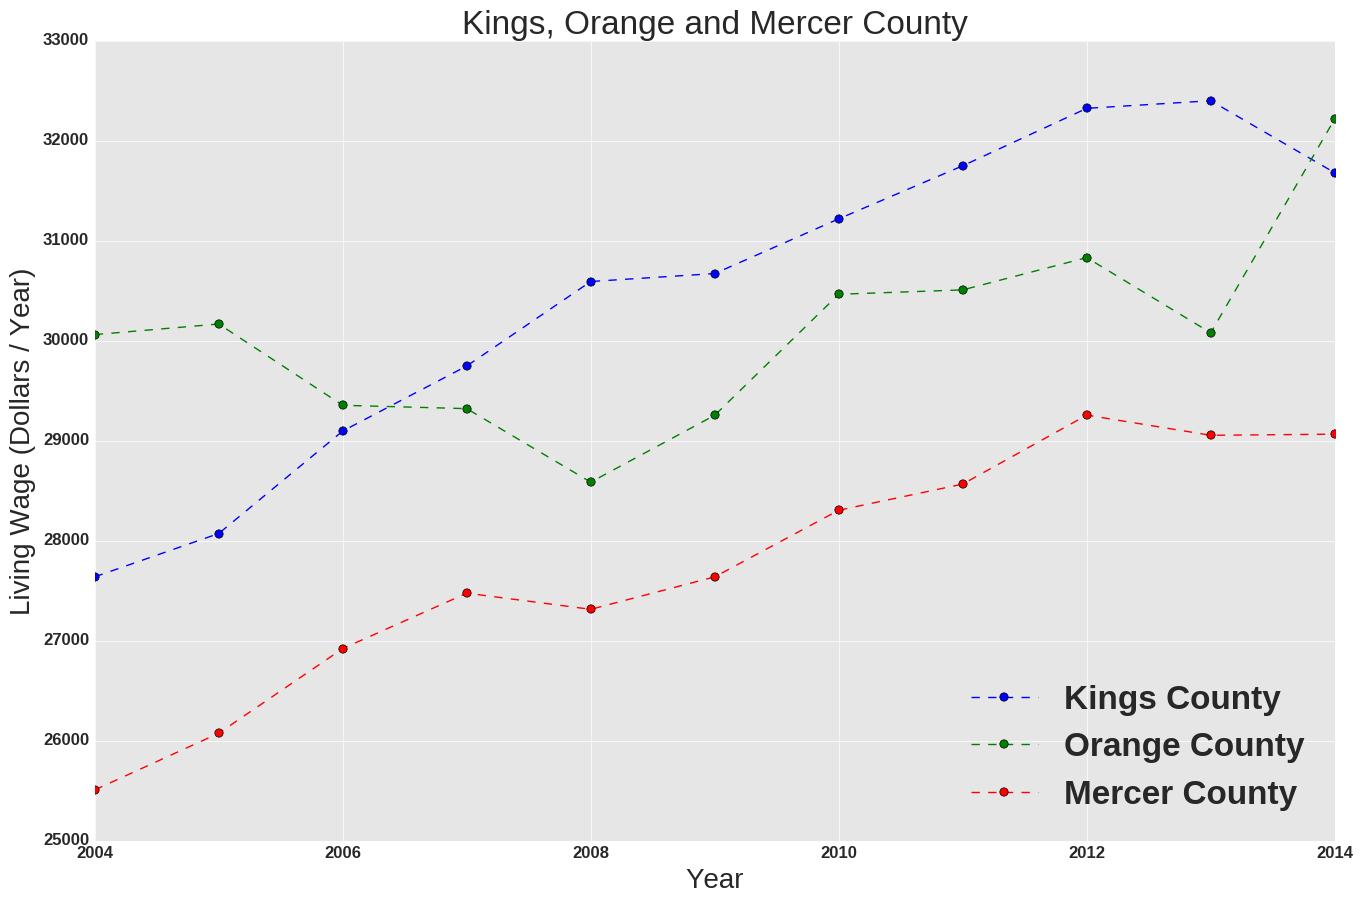

In [24]:
# Plot three counties
f = plt.figure(figsize=(16, 10))
plt.plot(final_model_values_df.loc[kings_county]['year'], 
         final_model_values_df.loc[kings_county]['total_cost'], linestyle='--', marker='o', label="Kings County")
plt.plot(final_model_values_df.loc[orange_county]['year'], 
         final_model_values_df.loc[orange_county]['total_cost'], linestyle='--', marker='o', label="Orange County")
plt.plot(final_model_values_df.loc[mercer_county]['year'], 
         final_model_values_df.loc[mercer_county]['total_cost'], linestyle='--', marker='o', label="Mercer County")

f.axes[0].set_title('Kings, Orange and Mercer County')
f.axes[0].set_ylabel('Living Wage (Dollars / Year)')
f.axes[0].set_xlabel('Year')
l = f.axes[0].legend(loc='lower right')
plt.savefig("LaTeX/CurrentThesis/figures/county_trend.png")
plt.show()

In [12]:
final_model_values_df.loc[kings_county]

year state    food_cost  insurance_cost  healthcare_cost  \
fips                                                                   
3604799999  2004    NY  3354.230474             899      2136.603659   
3604799999  2005    NY  3298.289159             951      2128.872392   
3604799999  2006    NY  3252.094925            1138      2158.144340   
3604799999  2007    NY  3338.643532            1092      2046.496085   
3604799999  2008    NY  3491.788629            1046      2003.912390   
3604799999  2009    NY  3486.152857            1192      2228.358321   
3604799999  2010    NY  3426.500615            1185      2209.464019   
3604799999  2011    NY  3483.623290            1216      2229.735367   
3604799999  2012    NY  3520.127668            1299      2419.270384   
3604799999  2013    NY  3479.631205            1318      2417.518513   
3604799999  2014    NY  3525.644632            1229      2528.386391   

            housing_cost  transportation_cost   other_cost  state_tax_rate  \
fips                                                                         
3604799999         11328          3924.435905  2800.961068         0.00045   
3604799999         11592          4022.279086  2763.890813         0.00045   
3604799999         12036          4249.598878  2790.161546         0.00045   
3604799999         12828          4278.041226  2595.236769         0.00045   
3604799999         14220          4215.876585  2522.705462         0.00045   
3604799999         14160          3715.370400  2561.350255         0.00045   
3604799999         14664          3801.845418  2536.679344         0.00045   
3604799999         15132          3957.491897  2509.044764         0.00045   
3604799999         15360          4055.284079  2325.199510         0.00045   
3604799999         14916          4257.053626  2159.887757         0.00045   
3604799999         14580          3965.869168  2195.290565         0.00045   

                pop  fica_tax_rate  federal_income_tax_rate    total_cost  
fips                                                                       
3604799999  2465326         0.0765                   0.0537  27636.739250  
3604799999  2465326         0.0765                   0.0569  28069.966415  
3604799999  2465326         0.0765                   0.0585  29094.770447  
3604799999  2465326         0.0765                   0.0593  29745.227011  
3604799999  2465326         0.0765                   0.0354  30589.939868  
3604799999  2465326         0.0765                   0.0447  30669.535984  
3604799999  2465326         0.0765                   0.0450  31216.563927  
3604799999  2465326         0.0565                   0.0559  31747.268304  
3604799999  2465326         0.0565                   0.0584  32321.595638  
3604799999  2504700         0.0765                   0.0579  32397.801187  
3604799999  2504700         0.0765                   0.0534  31677.144021

In [13]:
final_model_values_df.loc[mercer_county]

year state    food_cost  insurance_cost  healthcare_cost  \
fips                                                                   
3402199999  2004    NJ  3354.230474           772.0      2136.603659   
3402199999  2005    NJ  3298.289159          1031.0      2128.872392   
3402199999  2006    NJ  3252.094925          1064.0      2158.144340   
3402199999  2007    NJ  3338.643532          1102.5      2046.496085   
3402199999  2008    NJ  3491.788629          1141.0      2003.912390   
3402199999  2009    NJ  3486.152857          1158.0      2228.358321   
3402199999  2010    NJ  3426.500615          1198.0      2209.464019   
3402199999  2011    NJ  3483.623290          1278.0      2229.735367   
3402199999  2012    NJ  3520.127668          1267.0      2419.270384   
3402199999  2013    NJ  3479.631205          1280.0      2417.518513   
3402199999  2014    NJ  3525.644632          1299.0      2528.386391   

            housing_cost  transportation_cost   other_cost  state_tax_rate  \
fips                                                                         
3402199999          9576          3924.435905  2800.961068        0.000175   
3402199999          9756          4022.279086  2763.890813        0.000175   
3402199999         10200          4249.598878  2790.161546        0.000175   
3402199999         10824          4278.041226  2595.236769        0.000175   
3402199999         11184          4215.876585  2522.705462        0.000175   
3402199999         11496          3715.370400  2561.350255        0.000175   
3402199999         12060          3801.845418  2536.679344        0.000175   
3402199999         12216          3957.491897  2509.044764        0.000175   
3402199999         12648          4055.284079  2325.199510        0.000175   
3402199999         12012          4257.053626  2159.887757        0.000175   
3402199999         12204          3965.869168  2195.290565        0.000175   

               pop  fica_tax_rate  federal_income_tax_rate    total_cost  
fips                                                                      
3402199999  350761         0.0765                   0.0537  25506.042736  
3402199999  350761         0.0765                   0.0569  26072.600724  
3402199999  350761         0.0765                   0.0585  26919.539598  
3402199999  350761         0.0765                   0.0593  27473.461784  
3402199999  350761         0.0765                   0.0354  27311.764715  
3402199999  350761         0.0765                   0.0447  27636.546845  
3402199999  350761         0.0765                   0.0450  28302.652542  
3402199999  350761         0.0565                   0.0559  28564.134083  
3402199999  350761         0.0565                   0.0584  29253.860645  
3402199999  366513         0.0765                   0.0579  29052.030811  
3402199999  366513         0.0765                   0.0534  29063.484419

## State Averages of the Living Wage

([TOC](#Table-of-Contents))

**TODO:** 

* Add more analysis and comparisons of state averages
  * Show heat map of 2014? animate 2004 - 2014?

First, lets calculate the state averages:

In [21]:
state_weighted_averages = { }
for state in state_to_statename_mapping.keys():
    subdf = final_model_values_df[ final_model_values_df['state'] == state ][["year", "pop", "total_cost"]].reset_index("fips")
    subdf["weighted_total_cost"] = subdf["total_cost"] * subdf["pop"]
    subdf_grouped = subdf.groupby("year")
    state_weighted_averages[state] = subdf_grouped["weighted_total_cost"].sum() / subdf_grouped["pop"].sum() 
# print state_averages["NY"]

Here, I will compare the average living wge in NJ compared to NY:

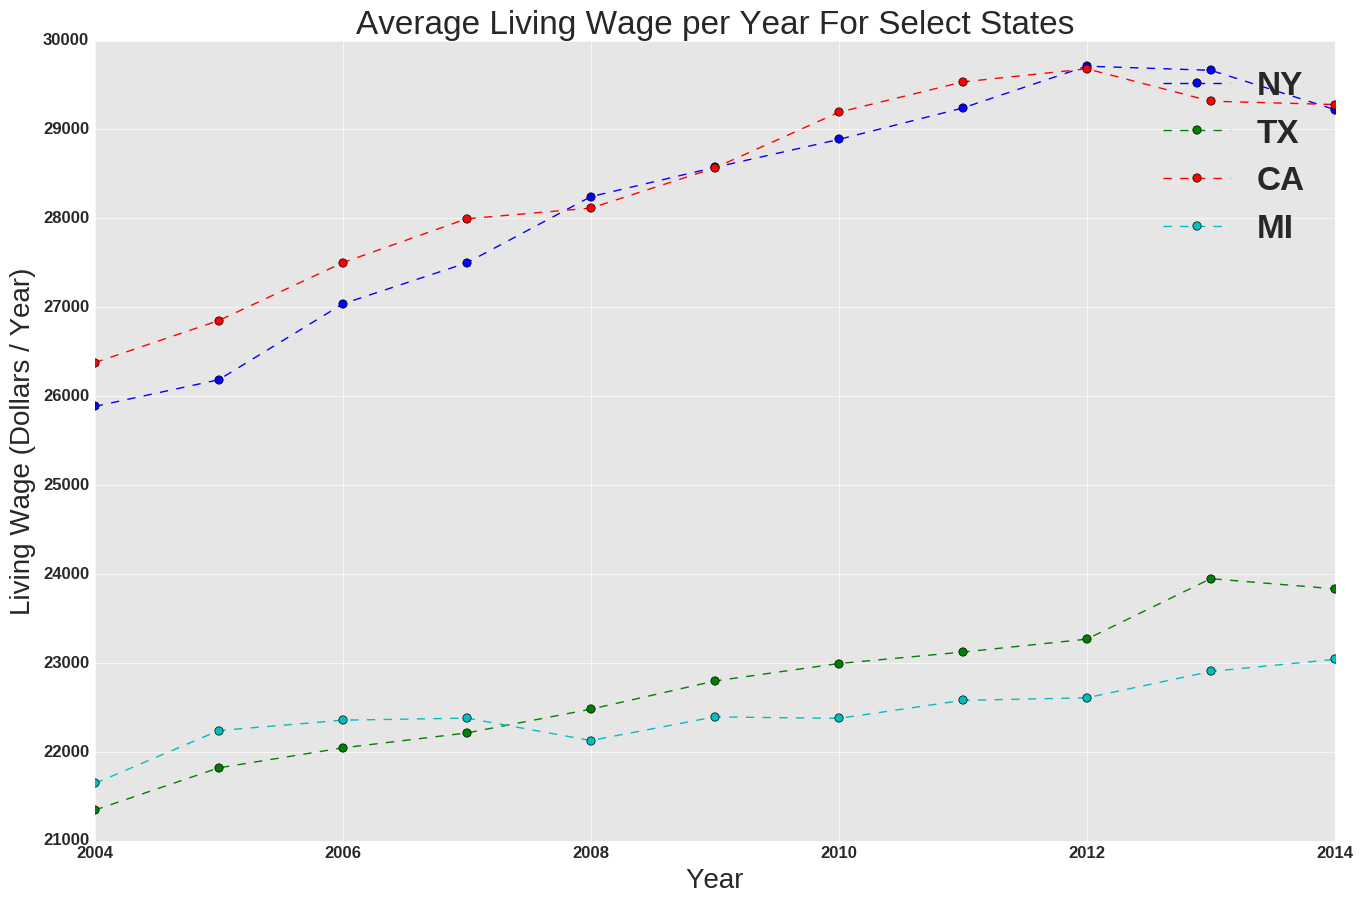

In [34]:
# Plot data for New York and NJ
f = plt.figure(figsize=(16, 10))
state_weighted_averages["NY"].plot(label="NY", linestyle='--', marker='o')
# state_weighted_averages["NJ"].plot(label="NJ", linestyle='--', marker='o')
state_weighted_averages["TX"].plot(label="TX", linestyle='--', marker='o')
state_weighted_averages["CA"].plot(label="CA", linestyle='--', marker='o')
state_weighted_averages["MI"].plot(label="MI", linestyle='--', marker='o')
f.axes[0].set_title('Average Living Wage per Year For Select States')
f.axes[0].set_ylabel('Living Wage (Dollars / Year)')
f.axes[0].set_xlabel('Year')
l = f.axes[0].legend()
plt.savefig("LaTeX/CurrentThesis/figures/state_trend.png")
plt.show()

## Choropleth Of Counties: 2004, 2006, 2014

([TOC](#Table-of-Contents))

Inspired by [mbostock's Choropleth](http://bl.ocks.org/mbostock/4060606); adding JavaScript requirements:

In [26]:
%%javascript
require.config({
  paths: {
      d3: 'https://cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min',
      queue: 'https://cdnjs.cloudflare.com/ajax/libs/queue-async/1.0.7/queue.min',
      topojson: 'https://cdnjs.cloudflare.com/ajax/libs/topojson/1.6.19/topojson.min'
  }
});

<IPython.core.display.Javascript object>

Python call to execute JS to print map for given data and year

In [27]:
from IPython.display import Javascript
def print_map(tsv_filename, map_id, svg_div_id, show_legend=False, domain_min=17000, domain_max=36500):
    if show_legend:
        show_legend = 'true'
    else:
        show_legend = 'false'
        
    return Javascript("""
    require(["d3", "queue", "topojson"], function(d3, queue, topojson) {
    
        var width = 960, 
            height = 600; 

        var rateById = d3.map(); 

        var quantize = d3.scale.quantize() 
            .domain([%d, %d]) 
            .range(d3.range(9).map(function(i) { return "q" + i + "-9"; })); 

        var projection = d3.geo.albersUsa() 
            .scale(1280) 
            .translate([width / 2, height / 2]); 

        var path = d3.geo.path() 
            .projection(projection); 

        var svg = d3.select("#%s").append("svg").attr("id", "%s") 
            .attr("width", width) 
            .attr("height", height); 

        queue() 
            .defer(d3.json, "/notebooks/Thesis/data/map/us.json") 
            .defer(d3.tsv, "%s", function(d) { rateById.set(d.id, +d.rate); }) 
            .await(ready); 

        function ready(error, us) { 
          if (error) throw error; 

          svg.append("g") 
              .attr("class", "counties") 
            .selectAll("path") 
              .data(topojson.feature(us, us.objects.counties).features) 
            .enter().append("path") 
              .attr("class", function(d) { return quantize(rateById.get(d.id)); }) 
              .attr("d", path); 

          svg.append("path") 
              .datum(topojson.mesh(us, us.objects.states, function(a, b) { return a !== b; })) 
              .attr("class", "states") 
              .attr("d", path); 
              
          var legend = d3.select('#%s-legend')
                          .append('ul')
                            .attr('class', 'list-inline');

            if(%s) {
    
                var keys = legend.selectAll('li.key')
                    .data(quantize.range());

                keys.enter().append('li')
                    .attr('class', function(d) {
                        console.log(d);
                        return d + " key";
                        var r = quantize.invertExtent(d);
                        console.log(r);
                    })
                    .text(function(d) {
                        var r = quantize.invertExtent(d);
                        return Math.floor(r[0]) + " - " + Math.floor(r[1]);
                    });
            }
        } 

        d3.select(self.frameElement).style("height", height + "px"); 
    });
    """ % (domain_min, domain_max, map_id, svg_div_id, tsv_filename, map_id, show_legend))

DEBUG: trying to save SVG to png file so output will show on nbviewer.org:

Setting styles and place holder for maps:

In [28]:
%%html
<style>

.counties {
  fill: none;
}

.states {
  fill: none;
  stroke: #fff;
  stroke-linejoin: round;
}

#legend {
    padding: 1.5em 0 0 1.5em;
}

li.key {
    border-top-width: 15px;
    border-top-style: solid;
    font-size: .75em;
    width: 10%;
    padding-left: 0;
    padding-right: 0;
}

.q0-9 { fill:rgb(247,251,255); border-top-color:rgb(247,251,255); }
.q1-9 { fill:rgb(222,235,247); border-top-color:rgb(222,235,247); }
.q2-9 { fill:rgb(198,219,239); border-top-color:rgb(198,219,239); }
.q3-9 { fill:rgb(158,202,225); border-top-color:rgb(158,202,225); }
.q4-9 { fill:rgb(107,174,214); border-top-color:rgb(107,174,214); }
.q5-9 { fill:rgb(66,146,198); border-top-color:rgb(66,146,198); }
.q6-9 { fill:rgb(33,113,181); border-top-color:rgb(33,113,181); }
.q7-9 { fill:rgb(8,81,156); border-top-color:rgb(8,81,156); }
.q8-9 { fill:rgb(8,48,107); border-top-color:rgb(8,48,107); }
</style>

In [29]:
%%html
<div id="map1-legend"></div>
<div id='map1'></div>

In [30]:
maps = []
for idx, year in enumerate([2004, 2006, 2014]):
    subdf = final_model_values_df[final_model_values_df["year"] == year].reset_index().rename(columns={"fips": "id", "total_cost": "rate"})
    subdf["id"] = subdf["id"].apply(lambda x: int(x / 100000.0))
    subdf.to_csv("data/map/df_map_%s.tsv" % year, sep="\t", index=False)
    # max(df_map_2004["rate"]) # 36230.017534800005
    # min(df_map_2004["rate"]) # 19966.945344099997
    # np.any(df_map_2004["id"] == 2300307065)
    maps.append(print_map("/notebooks/Thesis/data/map/df_map_%s.tsv" % year, "map1", "map1_div%d" % idx, show_legend=bool(idx==0)))

In [31]:
maps[0]

<IPython.core.display.Javascript object>

In [32]:
maps[1]

<IPython.core.display.Javascript object>

In [33]:
maps[2]

<IPython.core.display.Javascript object>

## Regional Averages of the Living Wage

([TOC](#Table-of-Contents))

Lets look at all the states within a region.

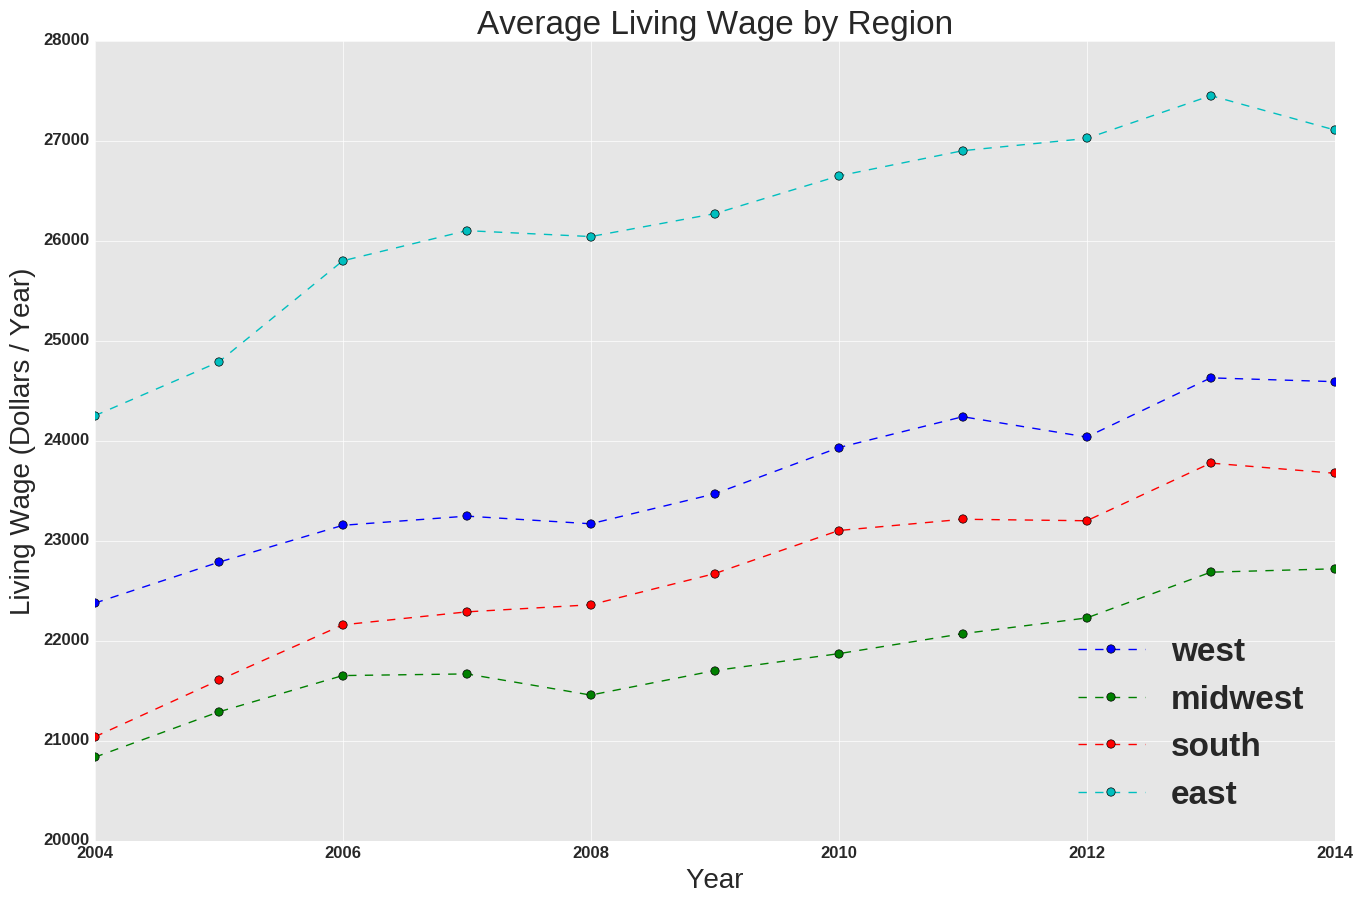

In [35]:
# final_model_values_df[ final_model_values_df['state'].isin(region_to_state_mapping[REGION_EAST]) ]
region_weighted_averages = { }

for region in region_to_state_mapping.keys():
    region_weighted_averages[region] = pd.concat([state_weighted_averages[state] for state in region_to_state_mapping[region]], axis=1) 

del region_weighted_averages['base']
# del region_weighted_averages['east']    

f = plt.figure(figsize=(16, 10))

for region in region_weighted_averages:
    region_weighted_averages[region].apply(np.average, axis=1).plot(label=region, linestyle='--', marker='o')

f.axes[0].set_title('Average Living Wage by Region')
f.axes[0].set_ylabel('Living Wage (Dollars / Year)')
f.axes[0].set_xlabel('Year')
l = f.axes[0].legend(loc="lower right")
plt.savefig("LaTeX/CurrentThesis/figures/regional_trend.png")
plt.show()

## National Average Breakdown Across 2004 - 2014

([TOC](#Table-of-Contents))

Lets see how the model variables changed over the course of a decade from the perspective of a national average, weighed by population.

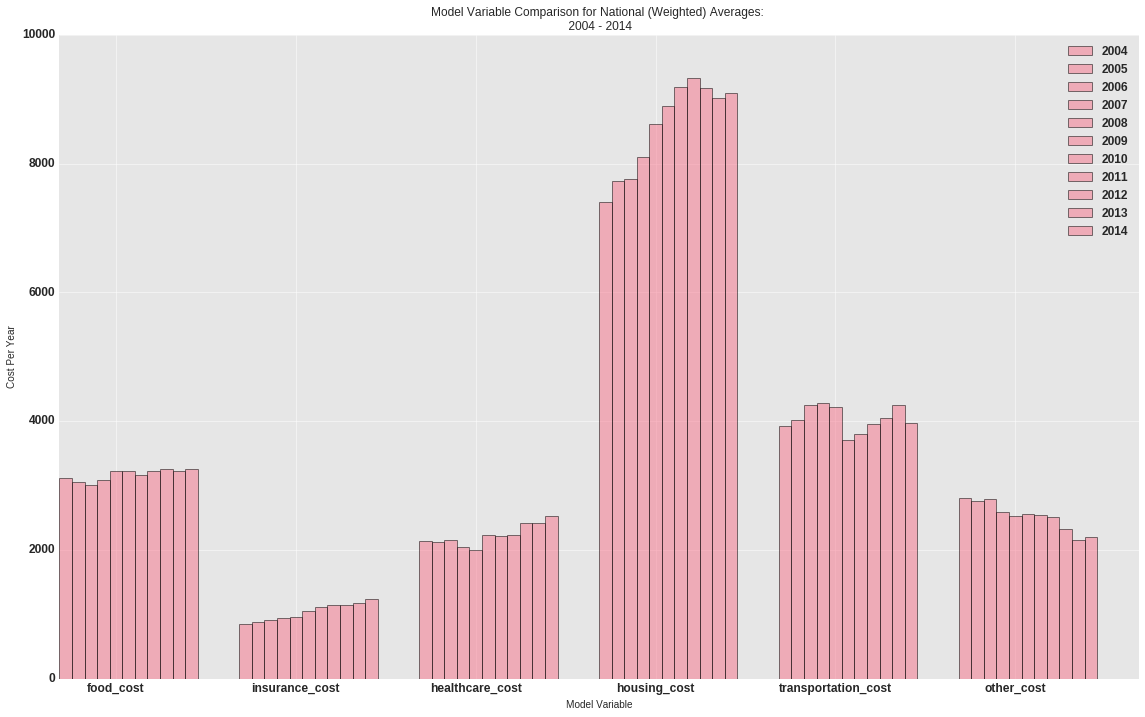

In [690]:
fig, ax = plt.subplots(figsize=(16, 10))

husl_color_palette = sns.color_palette("husl", len(model_years))

index = np.arange(6)
bar_width = 0.07

model_variable_columns = ['pop', 'food_cost', 'insurance_cost', 'healthcare_cost', 'housing_cost', 'transportation_cost', 'other_cost']

for idx, year in enumerate(model_years):
    data = final_model_values_df[ final_model_values_df['year'] == year ][model_variable_columns]
    
    weighted_data = []
    for column in model_variable_columns[1:]:
        weighted_data.append(sum(data['pop'] * data[column]) / sum(data['pop']))
    weighted_series = pd.Series(weighted_data, index=model_variable_columns[1:])

    rects1 = plt.bar(index + idx*bar_width, weighted_series, bar_width, alpha=0.5, color=husl_color_palette[0])

plt.xlabel('Model Variable')
plt.ylabel('Cost Per Year')
plt.title('Model Variable Comparison for National (Weighted) Averages: \n 2004 - 2014')
plt.xticks(index + 9*bar_width/2, weighted_series.index)
plt.legend(labels=model_years, fontsize=12)
plt.tight_layout()
plt.show()

## Living Wage Distribution in Most Populous Counties

([TOC](#Table-of-Contents))

[This article from Business Insider](http://www.businessinsider.com/half-of-the-united-states-lives-in-these-counties-2013-9) lists the top 150 counties by population. Here I look at the distribution of living wage values seperated by this grouping. 

Some observations:
* The populated county distributions are spread out more (std: 3123.05) than the non-populated one (std: 1791.76)
* The populated county distributions seem almost bimodal, with peaks at both . The non-populated counties peak at . 
  * In light of this, I seperate the most populous counties into two subgroups in the subsequent visualizations, where 'most1' are the counties in the top 150 most populous counties but with a total cost in the bottom portion of the group; 'most2', the top portion of the group

**TODO** 

* What makes up this third large group

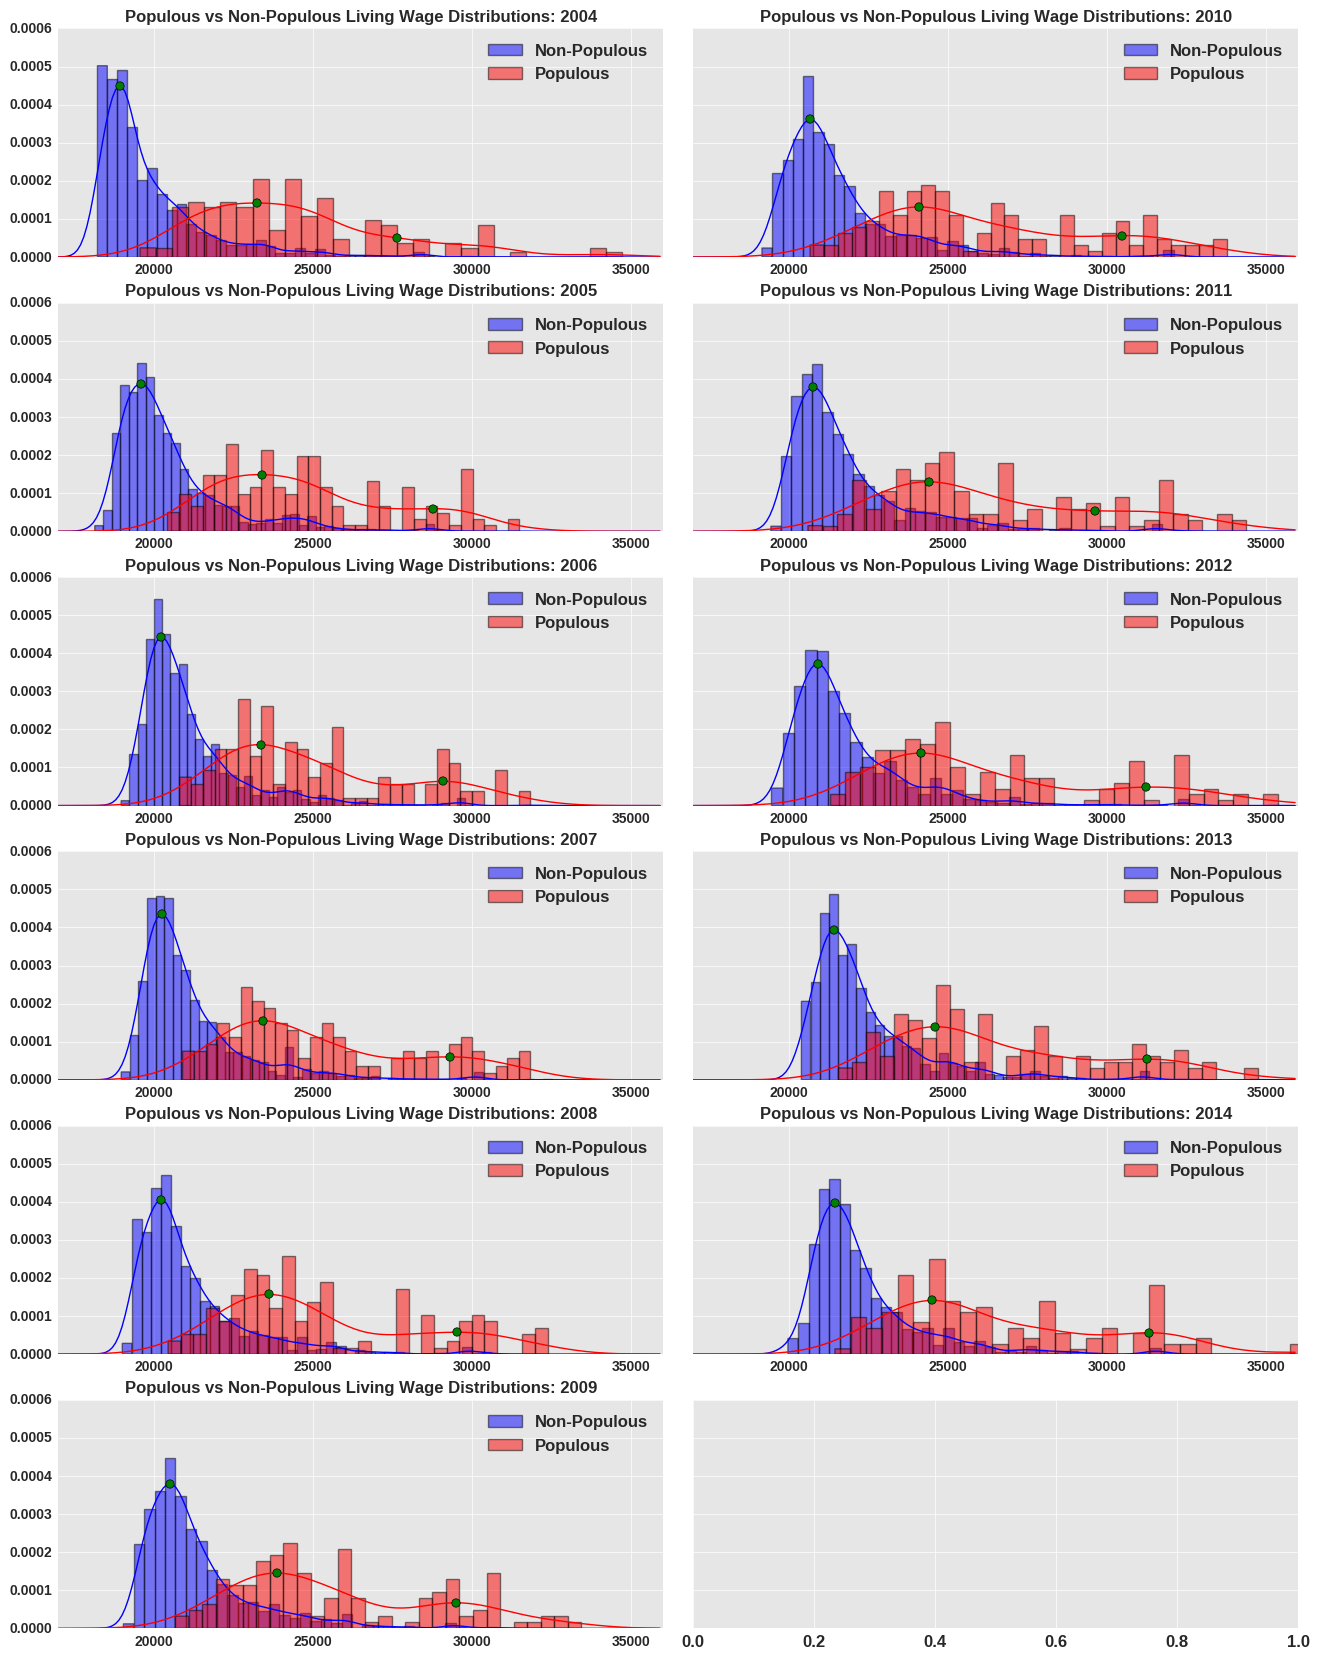

In [714]:
# Three subplots sharing both x/y axes
f, ((ax11, ax12), (ax21, ax22), (ax31, ax32), (ax41, ax42), (ax51, ax52), (ax61, ax62)) = \
    plt.subplots(6, 2, sharey=True, figsize=(16, 20))
axes = [ax11, ax21, ax31, ax41, ax51, ax61, ax12, ax22, ax32, ax42, ax52, ax62]

# Caclulate the inverse of the most populous counties (which is defined in FMR section)
least_populous_fips = list(set(final_model_values_df.index.values) - set(most_populous_fips))

# Seperate the data frame based on the fip codes of the populous and non-populous counties
most_populous_living_wage_df = final_model_values_df.loc[most_populous_fips]
least_populous_living_wage_df = final_model_values_df.loc[least_populous_fips]

# Color the histograms and density plots with same color
color_nonpopulous = current_color_palette[2]
color_populous = current_color_palette[0]
point_color = 'green'

# Keep track of variances of each distro
mpvariance = []
lpvariance = []

second_group_fips = []

# X-axis
x = numpy.arange(17000, 36000, 100)

split_threshold = [27500, 27500, 27500, 27500, 27500, 27500, 29000, 29500, 29500, 29500, 29500]

least_populous_maxes = []
most_populous_maxes = []
most_populous2_maxes = []

# setup_default_visuals()

plot_idx = 0
for year in model_years:
    # Subset data for populous counties by year, and store variance of distribution
    most_populous_living_wage_data = most_populous_living_wage_df[ most_populous_living_wage_df["year"] == year ]["total_cost"]
    mpvariance.append(np.std(most_populous_living_wage_data))
    # print len(most_populous_living_wage_data)
    
    # Subset data for non-populous counties by year, and store variance of distribution
    least_populous_living_wage_data = least_populous_living_wage_df[ least_populous_living_wage_df["year"] == year ]["total_cost"]
    lpvariance.append(np.std(least_populous_living_wage_data))
    # print len(least_populous_living_wage_data)
    
    # Histogram / density plot of populous counties living wage distribution
    axes[plot_idx].hist(least_populous_living_wage_data.values, 50, normed=True, label="Non-Populous", alpha=0.5, color=color_populous)
    density = stats.kde.gaussian_kde(least_populous_living_wage_data)
    axes[plot_idx].plot(x, density(x), color=color_populous)
    
    # Least populous maxes
    least_populous_density = density(least_populous_living_wage_data.values)
    least_populous_max_idx = argmax(least_populous_density)
    axes[plot_idx].plot(least_populous_living_wage_data.values[least_populous_max_idx], 
                       least_populous_density[least_populous_max_idx], marker='o', color=point_color)
    least_populous_maxes.append(least_populous_living_wage_data.values[least_populous_max_idx])
    
    # Histogram / density plot of non-populous counties living wage distribution
    axes[plot_idx].hist(most_populous_living_wage_data.values, 30, normed=True, label="Populous", alpha=0.5, color=color_nonpopulous)
    density = stats.kde.gaussian_kde(most_populous_living_wage_data.values)
    axes[plot_idx].plot(x, density(x), color=color_nonpopulous)
    
    # Most populous maxes
    first_group = most_populous_living_wage_data[most_populous_living_wage_data <= split_threshold[plot_idx]]
    first_group_density = density(first_group.values)
    most_populous_max_idx = argmax(first_group_density)
    axes[plot_idx].plot(first_group.values[most_populous_max_idx], 
                       first_group_density[most_populous_max_idx], marker='o', color=point_color)
    most_populous_maxes.append(first_group.values[most_populous_max_idx])
    
    second_group = most_populous_living_wage_data[most_populous_living_wage_data > split_threshold[plot_idx]]
    second_group_fips.append(set(second_group.index))
    second_group_density = density(second_group.values)
    most_populous2_max_idx = argmax(density(second_group.values))
    axes[plot_idx].plot(second_group.values[most_populous2_max_idx], 
                       second_group_density[most_populous2_max_idx], marker='o', color=point_color)
    most_populous2_maxes.append(second_group.values[most_populous2_max_idx])
    
    
    # Figure metadata and plot
    axes[plot_idx].legend(fontsize=12)
    axes[plot_idx].set_title("Populous vs Non-Populous Living Wage Distributions: %d" % year, fontsize=12, fontweight='bold')
    axes[plot_idx].set_xlim([17000, 36000])
    axes[plot_idx].tick_params(axis='both', which='major', labelsize=10)
    axes[plot_idx].tick_params(axis='both', which='minor', labelsize=10)

    # Go to next plot
    plot_idx += 1

f.subplots_adjust(wspace=0.05)
plt.show()

setup_custom_visuals()

# Standard deviation
# print np.average(mpvariance) # 3123.05012618
# print np.average(lpvariance) # 1791.75923332

In [759]:
second_group_fips_set = set(second_group_fips[0])
for s in second_group_fips:
    second_group_fips_set = second_group_fips_set.union(s)

second_group_counties = []
for c in second_group_fips_set:
    second_group_counties.append(tuple(fmr_df.loc[2014].loc[c][["countyname", "state_alpha"]].values))
print "\n".join(["%s, %s" % c for c in sorted(second_group_counties, key=lambda x: x[1])])

# Print nicely
model_variable_diffs.columns = ['Counties with Highest Living Wages']
formatters = { column:'${:,.2f}'.format for column in model_variable_diffs.columns }
HTML(model_variable_diffs.to_html(formatters=formatters))

Orange County, CA
San Mateo County, CA
San Diego County, CA
Alameda County, CA
Riverside County, CA
San Bernardino County, CA
San Francisco County, CA
Sonoma County, CA
Santa Clara County, CA
Ventura County, CA
Los Angeles County, CA
Contra Costa County, CA
Fairfield County, CT
New Haven County, CT
District of Columbia, DC
Palm Beach County, FL
Broward County, FL
Honolulu County, HI
Plymouth County, MA
Norfolk County, MA
Suffolk County, MA
Essex County, MA
Middlesex County, MA
Bristol County, MA
Worcester County, MA
Prince George's County, MD
Montgomery County, MD
Passaic County, NJ
Ocean County, NJ
Morris County, NJ
Bergen County, NJ
Hudson County, NJ
Monmouth County, NJ
Essex County, NJ
Middlesex County, NJ
Union County, NJ
Queens County, NY
Suffolk County, NY
Bronx County, NY
New York County, NY
Richmond County, NY
Westchester County, NY
Nassau County, NY
Kings County, NY
Fairfax County, VA


Lets look at the living wage peaks of each subgroup over time:

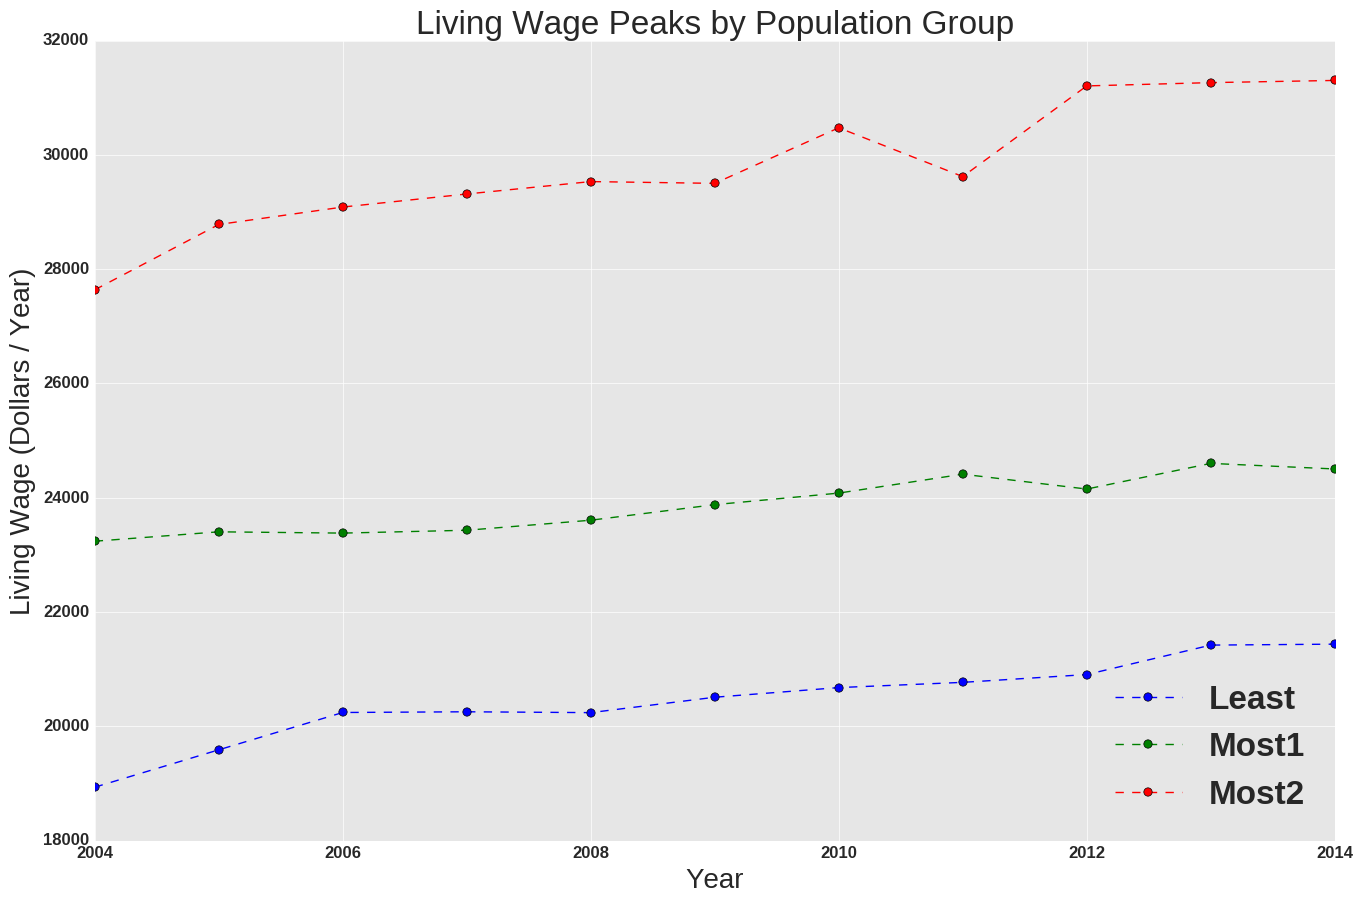

In [712]:
f = plt.figure(figsize=(16, 10))
plt.plot(model_years, least_populous_maxes, label="Least", linestyle='--', marker='o')
plt.plot(model_years, most_populous_maxes, label="Most1", linestyle='--', marker='o')
plt.plot(model_years, most_populous2_maxes, label="Most2", linestyle='--', marker='o')
f.axes[0].set_title('Living Wage Peaks by Population Group')
f.axes[0].set_ylabel('Living Wage (Dollars / Year)')
f.axes[0].set_xlabel('Year')
l = f.axes[0].legend(loc="lower right")

Whats interesting here is that the different between the peak in the least-populous county group and the two peaks in the most-populous group is very steady in value, despite a general increase over time. This seems to insinuate that living in a more populated area comes at the cost of an increase in the living wage needed, and that this cost is maintained over time.

What variables in the model account for the differences in the living wage across the least and most populated counities:

In [760]:
columns = ["food_cost", "insurance_cost", "healthcare_cost", "housing_cost", "transportation_cost", "other_cost", "total_cost"]

# Find the average model variables for least populous counties
least_populous_model_variable_averages = \
    final_model_values_df.loc[least_populous_fips].groupby("year").aggregate(np.average)
least_populous_model_variable_averages = least_populous_model_variable_averages[columns]

# For ease of coding, get subset of dataframe for the most populous counties
most_pop_df = final_model_values_df.loc[most_populous_fips]

# For each year, average model variables for each subgroup in the most populous counties
most_populous_model_variable_averages = None
most_populous2_model_variable_averages = None
for idx, year in enumerate(model_years):
    # Average the model variables across fips in the most populous counties for this year, append to df
    if most_populous_model_variable_averages is not None:
        most_populous_model_variable_averages = pd.concat([most_populous_model_variable_averages, most_pop_df[ most_pop_df["total_cost"] <= split_threshold[idx] ].loc[most_populous_fips]])
    else:
        most_populous_model_variable_averages = most_pop_df[ most_pop_df["total_cost"] <= split_threshold[idx] ].loc[most_populous_fips]

        
    # Average the model variables across fips in the most populous counties for this year, append to df
    if most_populous2_model_variable_averages is not None:
        most_populous2_model_variable_averages = pd.concat([most_populous2_model_variable_averages, most_pop_df[ most_pop_df["total_cost"] > split_threshold[idx] ].loc[most_populous_fips]])
    else:
        most_populous2_model_variable_averages = most_pop_df[ most_pop_df["total_cost"] > split_threshold[idx] ].loc[most_populous_fips]

# Aggregated by year and take an average; filter out only useful variables (tax rates hardly change)
most_populous_model_variable_averages = most_populous_model_variable_averages.groupby("year").aggregate(np.average)
most_populous_model_variable_averages = most_populous_model_variable_averages[columns]
most_populous2_model_variable_averages= most_populous2_model_variable_averages.groupby("year").aggregate(np.average)
most_populous2_model_variable_averages = most_populous2_model_variable_averages[columns]

# Differences between the model variables between each subgroup
model_variable_diffs = pd.concat([(most_populous2_model_variable_averages - most_populous_model_variable_averages).apply(np.average).transpose(),
                                (most_populous2_model_variable_averages - least_populous_model_variable_averages).apply(np.average).transpose(),
                                (most_populous_model_variable_averages - least_populous_model_variable_averages).apply(np.average).transpose()], axis=1)

# Print nicely
model_variable_diffs.columns = ['Diff Most2 and Most Pop', 'Diff Most2 and Least Pop', 'Diff Most1 and Least Pop']
formatters = { column:'${:,.2f}'.format for column in model_variable_diffs.columns }
HTML(model_variable_diffs.to_html(formatters=formatters))

As we can see, that majority of the average difference between these sub-groups is the housing cost variable, followed by food costs and then insurance cost. Note: since we are not doing regional weighting on the CEX data, the three variables derived from them are the same nationally. Hence we expect no change between these variables. This should be looked into after an appropriate regional weighting scheme is found.

Another avenue for investigation is to look into each sub-group and see what percentage each individial model variable accounts for in the total cost average for that sub-group. We will only look at 2014:

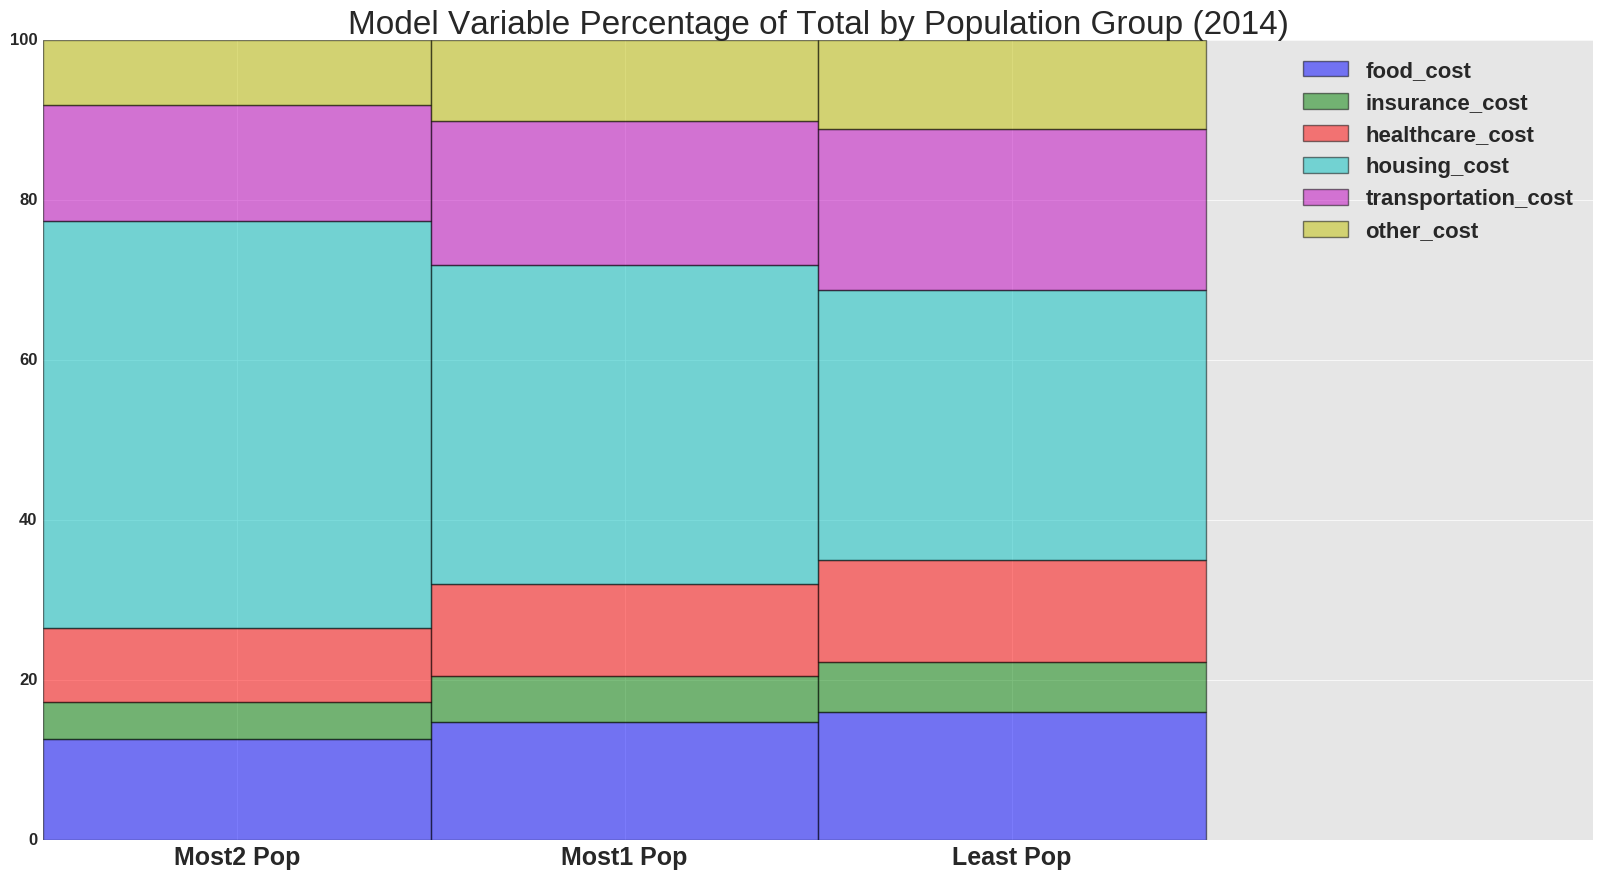

In [762]:
# Percent change in the averages of the model variables broken down by population group
most_populous2_model_variable_perc = most_populous2_model_variable_averages.apply(lambda x: x * 100.0 / sum(x[:-1]), axis=1)
most_populous_model_variable_perc = most_populous_model_variable_averages.apply(lambda x: x * 100.0 / sum(x[:-1]), axis=1)
least_populous_model_variable_perc = least_populous_model_variable_averages.apply(lambda x: x * 100.0 / sum(x[:-1]), axis=1)

# Differences between the model variables between each subgroup for 2014
model_variable_percs = pd.concat([most_populous2_model_variable_perc.loc[model_years[-1]],
                                most_populous_model_variable_perc.loc[model_years[-1]],
                                least_populous_model_variable_perc.loc[model_years[-1]]], axis=1)

# No need for total_cost anymore
model_variable_percs = model_variable_percs[:-1]

model_variable_percs.columns = ['Most2 Pop', 'Most1 Pop', 'Least Pop']

# Create a 1 x 3 figure of stacked bar
fig = plt.figure(figsize=(20, 10))
ax = fig.gca()

width = 0.1
idx = [0, width, 2*width]
xtick_idx = [width/2, 3*width/2, 5*width/2]

data = None
prev_data = None
for rowidx in range(len(model_variable_percs)):
    color = current_color_palette[rowidx]
    data = model_variable_percs.iloc[rowidx]
    if prev_data is not None:
        ax.bar(idx, data, width, bottom=prev_data, color=color, alpha=0.5)
        prev_data += data
    else:
        ax.bar(idx, data, width, color=color, alpha=0.5)
        prev_data = data

# Add legend,title and Adjust x-axis labels and limits
ax.legend(labels=model_variable_percs.index, prop={'size':16})
ax.set_title("Model Variable Percentage of Total by Population Group (2014)")
plt.xticks(xtick_idx, model_variable_percs.columns, fontsize=18)
ax.set_xlim(0, 4*width)
ax.set_ylim((0, 100))

plt.show()

## Living Wage Distribution by Race

([TOC](#Table-of-Contents))

**TODO**

* Why does 2004 and 2005 not work in this breakdown?
* Right now using only 2010 census data; can I get it for 2000?
* What % of race has living wage above some threshold


### Loading Race Data from 2010 Census

In [763]:
census_race_data_df = pd.DataFrame.from_csv(open("/home/james/Code/Masters/Thesis/data/census/aff_download/DEC_10_DP_DPDP1_with_ann_stripped.csv", "r"))
census_race_columns = ["GEO.display-label", "HD02_S078", "HD02_S079", "HD02_S080", "HD02_S081", 
                       "HD02_S089", 
                       "HD02_S114","HD02_S115","HD02_S116","HD02_S117","HD02_S118","HD02_S119"]
census_race_data_df = census_race_data_df[census_race_columns]
census_race_data_df.columns = ["Label", "white_perc", "black_perc", "american_indian_perc", "asian_perc", 
                               "pacific_islander_perc", 
                               "hispanic_perc", "hispanic_white_perc", "hispanic_black_perc", "hispanic_american_indian_perc", 
                               "hispanic_asian_perc", "hispanic_pacific_islander_perc"]

census_races = census_race_data_df.columns[1:6]
                                   
# adjust for latinos / hispanics
for race in census_races:
    census_race_data_df[race] = census_race_data_df[race] - census_race_data_df["hispanic_" + race]

census_races = [ "_".join(race.split('_')[0:-1]) for race in census_race_data_df.columns[1:7] ]
num_races = len(census_races)

census_race_data_df.index = census_race_data_df.index.map(lambda x: int(x.split("US")[1] + '99999'))

### Living Wage County Non-Weighted Breakdown by Race

At the end of the day, I think not weighing the data by population doesn't make sense. Leaving this section here till I can fully create a weighted version of the boxplot / violinplot in matplotlib

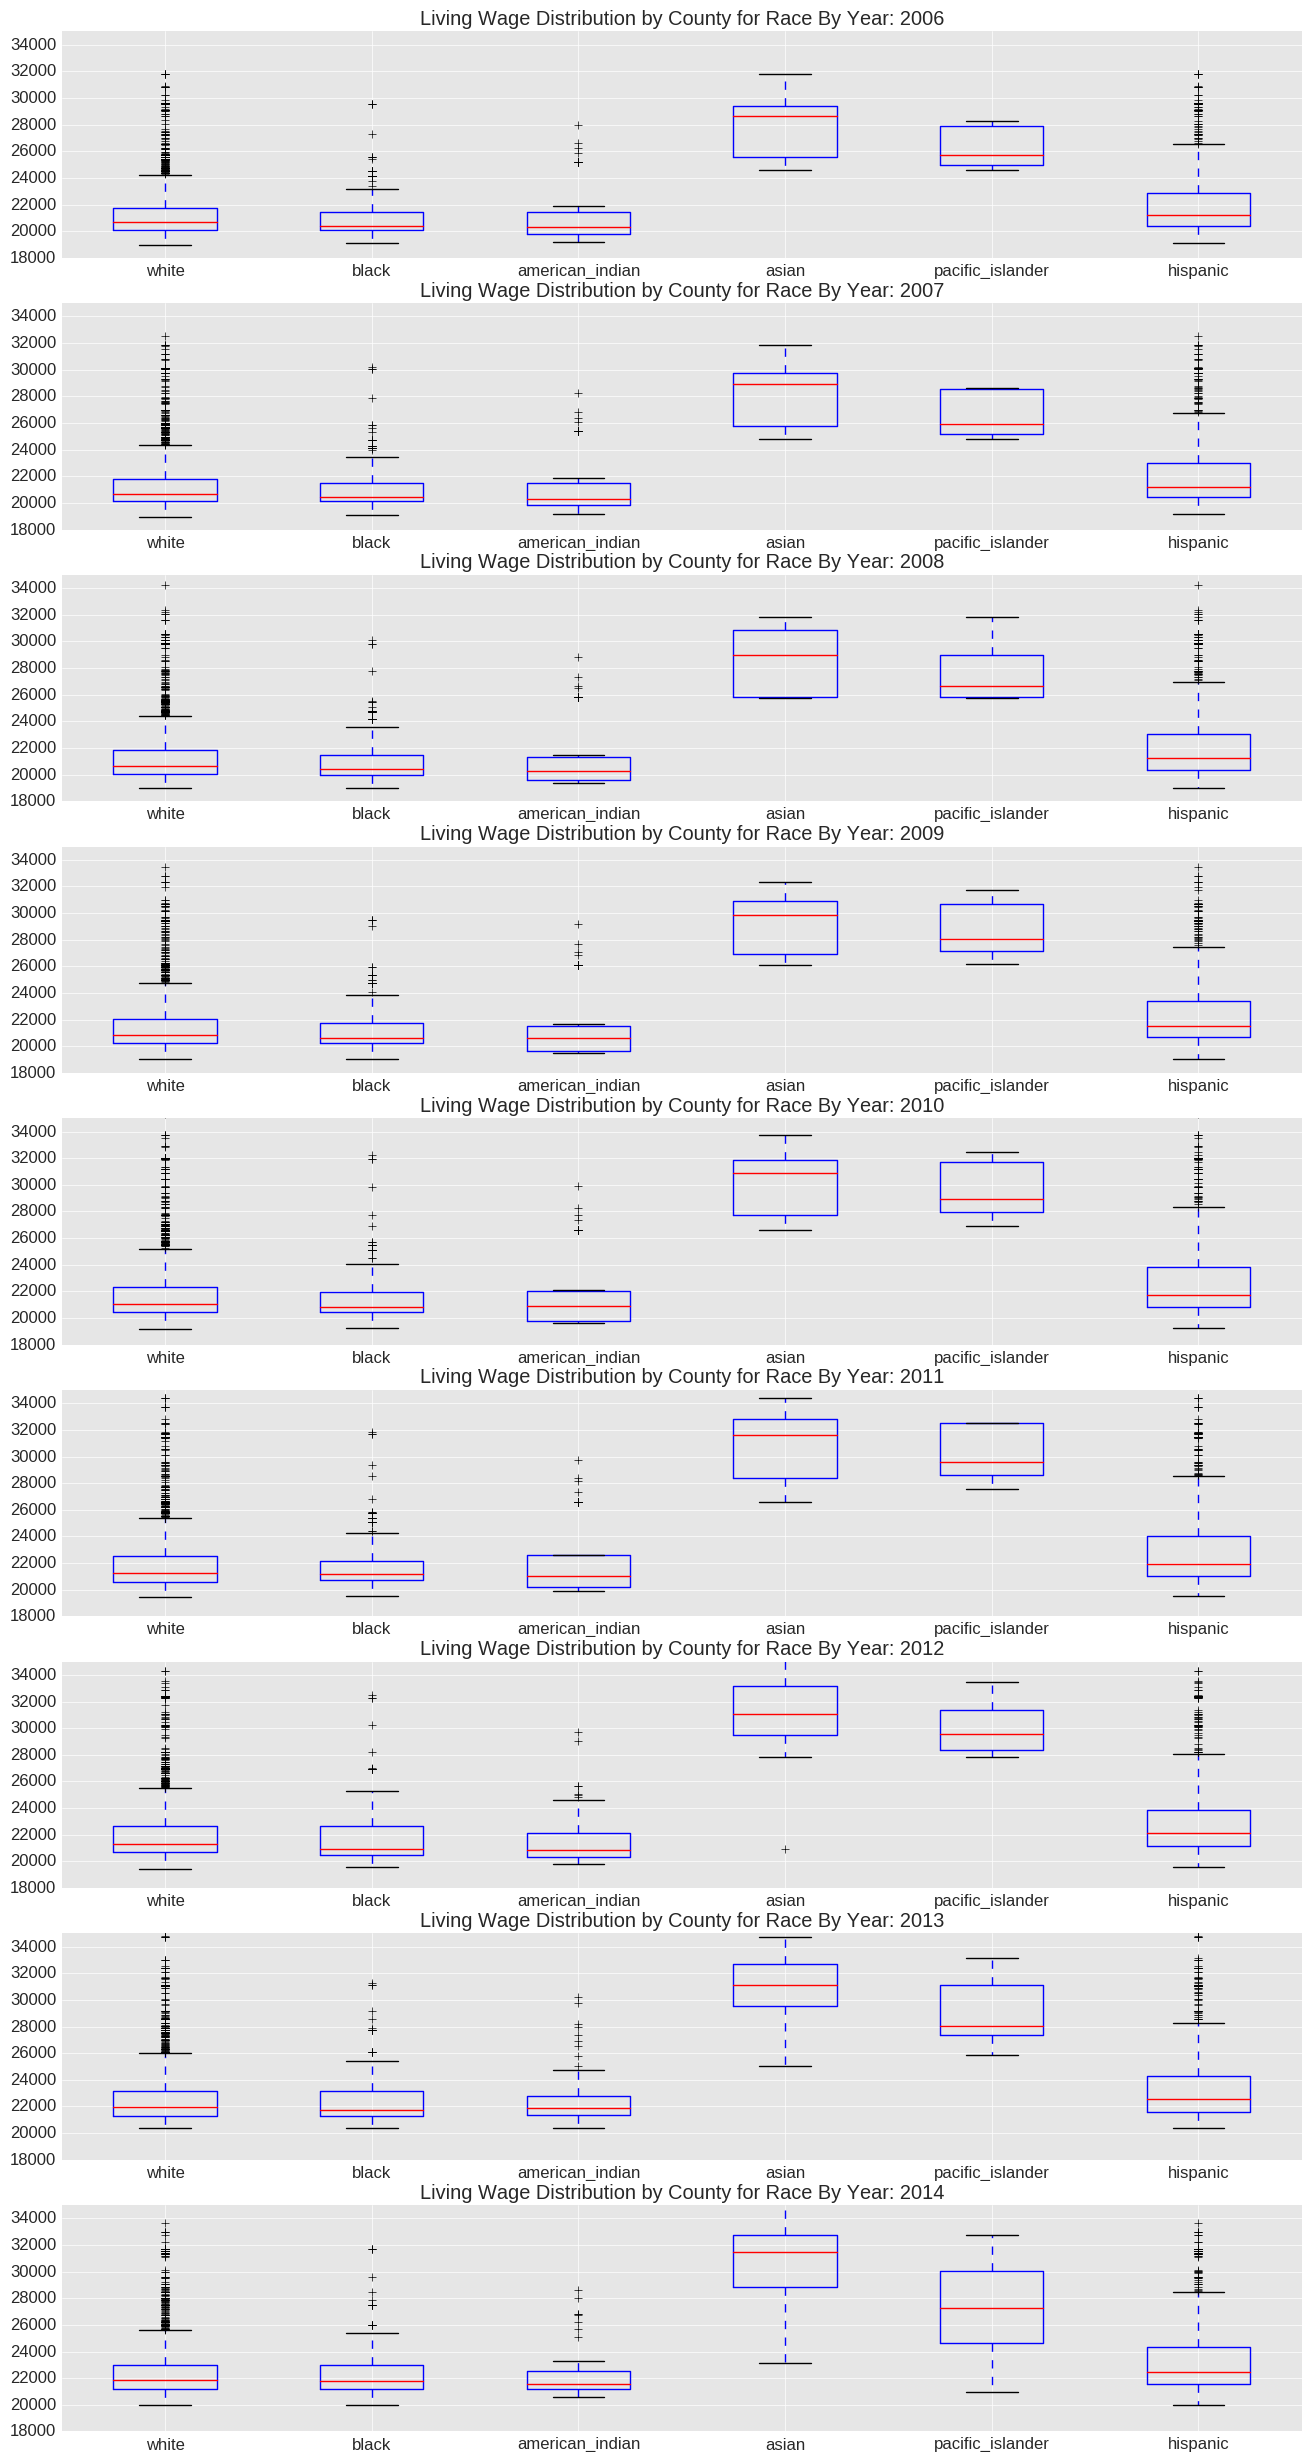

In [770]:
race_years = range(2006, 2015)
num_race_years = len(race_years)
race_density = defaultdict(dict)
race_counties = defaultdict(dict)

thresholds = [ 35.0, 35.0, 20.0, 20.0, 5.0, 5.0, 35.0 ]

setup_default_visuals()

f, axes = plt.subplots(len(race_years), 1, sharey=True, figsize=(16, 30))
alpha = 0.2
plot_idx = 0

for year in race_years:
    boxplot_data = []
    for idx, race in enumerate(census_races):
        subdf = final_model_values_df[final_model_values_df['year'] == year].join(census_race_data_df).dropna()
        race_counties[race] = subdf[census_race_data_df.columns[1:]].apply(lambda x: x[race + "_perc"] > thresholds[idx], axis=1)
        boxplot_data.append(subdf[race_counties[race]]["total_cost"])
        race_density[race][year] = stats.kde.gaussian_kde(subdf[race_counties[race]]["total_cost"])

    axes[plot_idx].boxplot(boxplot_data)
    axes[plot_idx].set_title("Living Wage Distribution by County for Race By Year: %s" % year)
    axes[plot_idx].set_ylim((18000, 35000))
    axes[plot_idx].set_xticklabels(census_races)
    plot_idx += 1

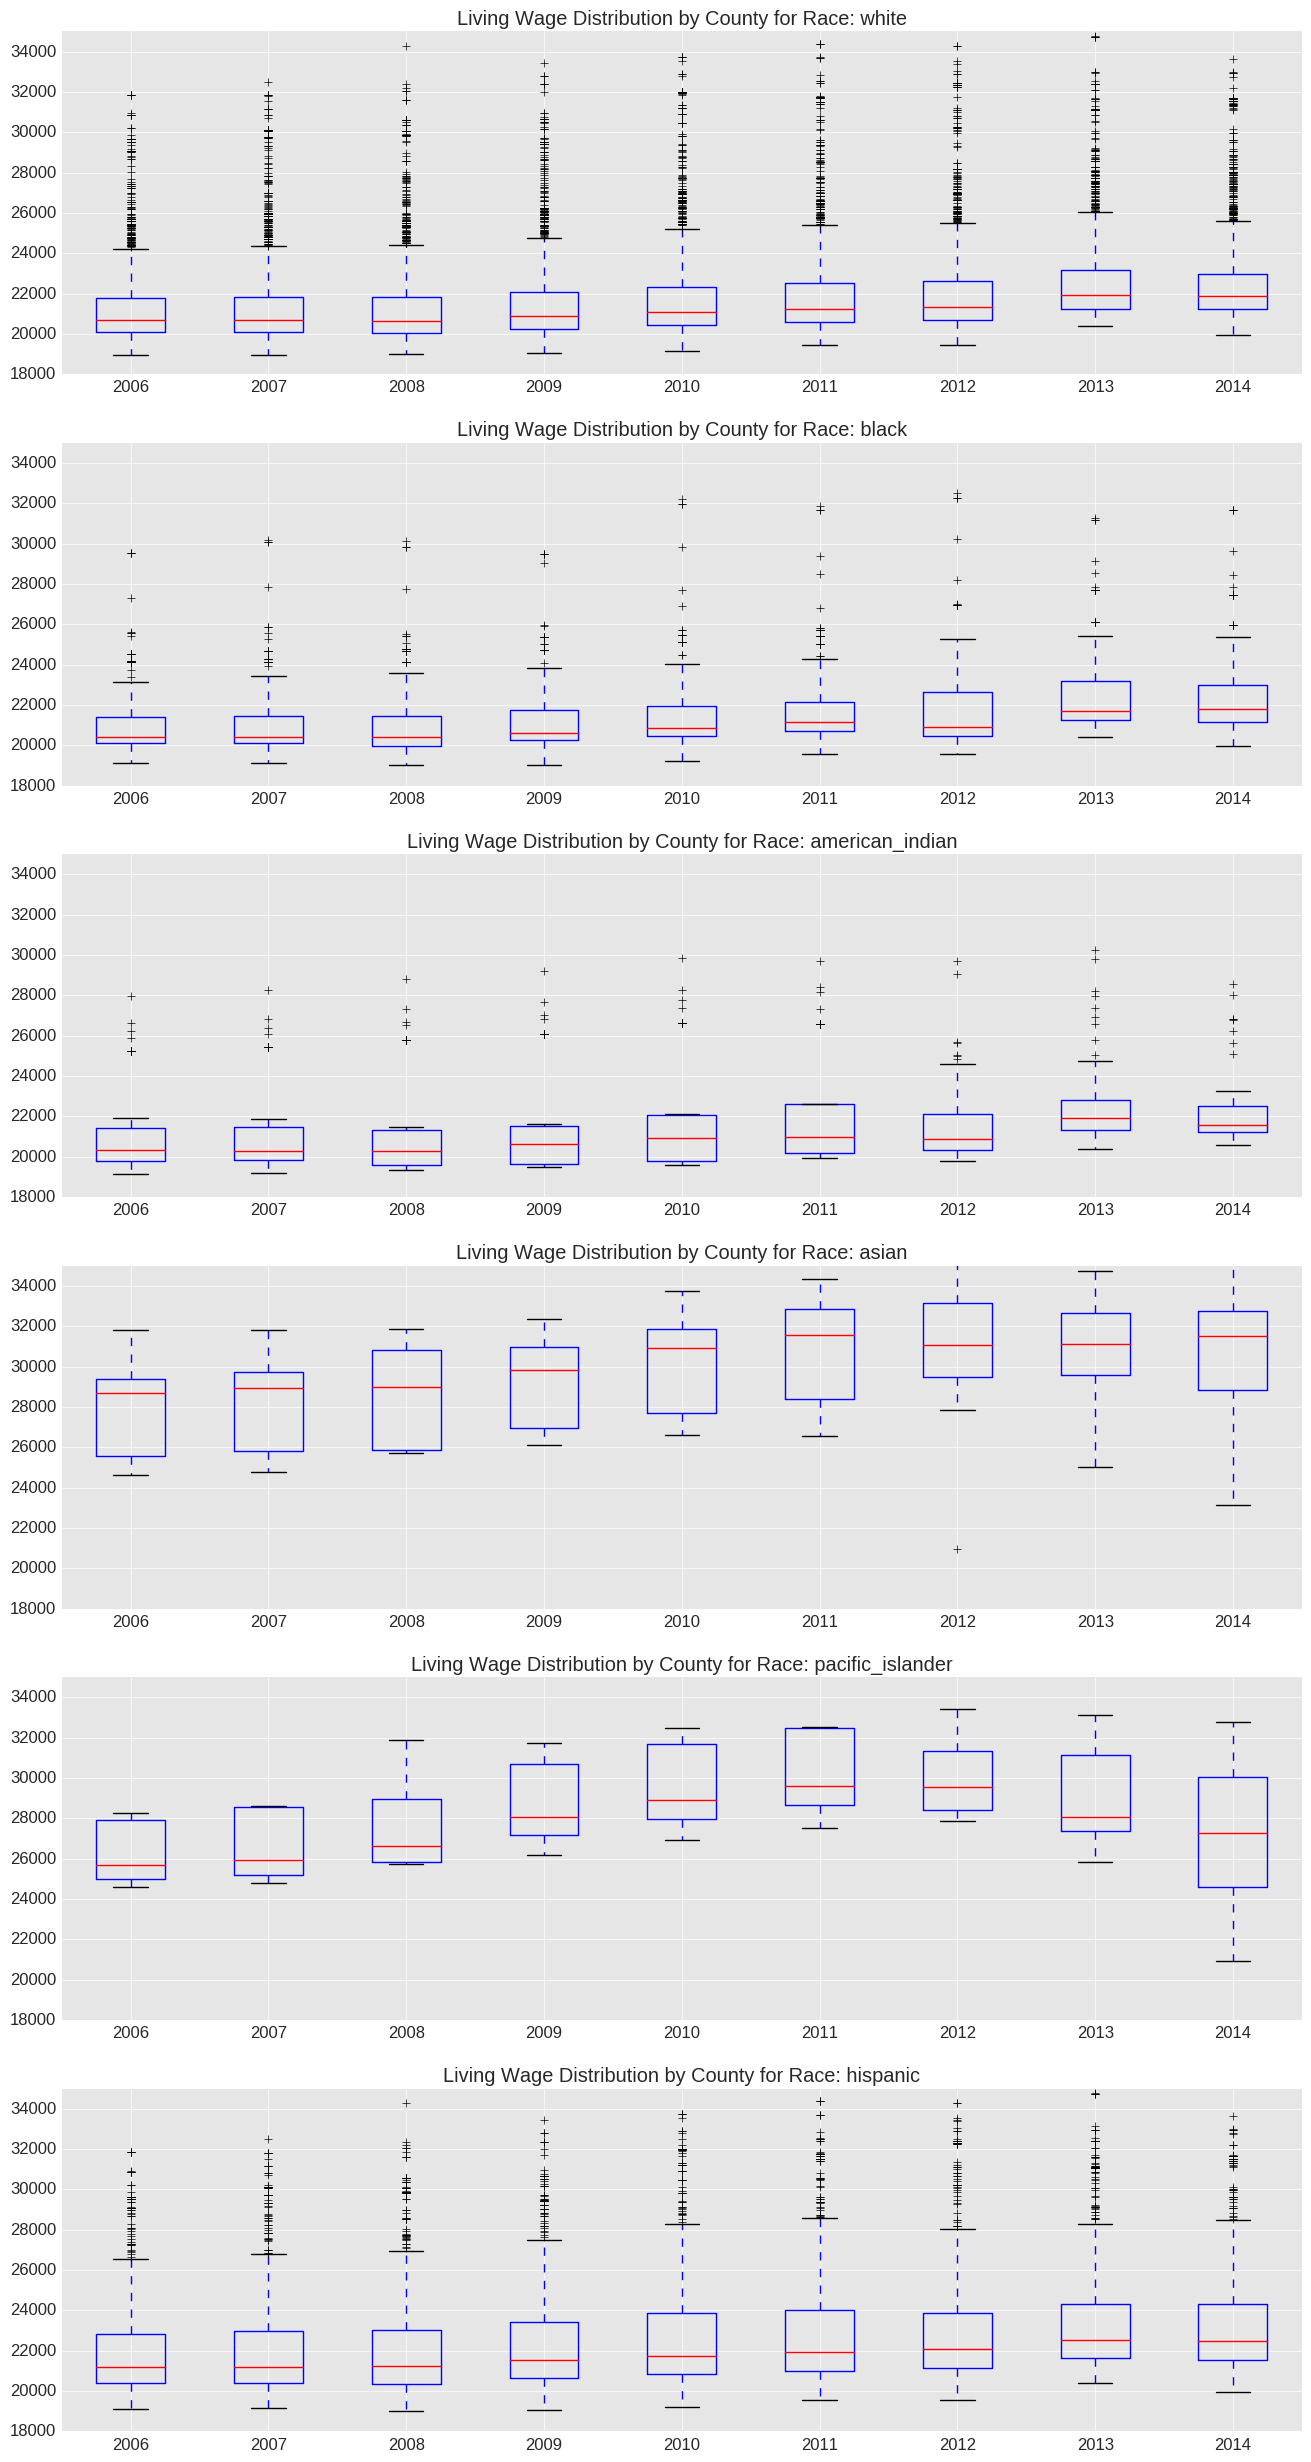

In [771]:
race_years = range(2006, 2015)
num_race_years = len(race_years)
race_density = defaultdict(dict)
race_counties = defaultdict(dict)

thresholds = [ 35.0, 35.0, 20.0, 20.0, 5.0, 5.0, 35.0 ]

f, axes = plt.subplots(len(census_races), 1, sharey=True, figsize=(16, 30))
alpha = 0.2
plot_idx = 0

for idx, race in enumerate(census_races):
    boxplot_data = []
    for year in race_years:
        subdf = final_model_values_df[final_model_values_df['year'] == year].join(census_race_data_df).dropna()
        race_counties[race] = subdf[census_race_data_df.columns[1:]].apply(lambda x: x[race + "_perc"] > thresholds[idx], axis=1)
        boxplot_data.append(subdf[race_counties[race]]["total_cost"])
        race_density[race][year] = stats.kde.gaussian_kde(subdf[race_counties[race]]["total_cost"])

    axes[plot_idx].boxplot(boxplot_data)
    axes[plot_idx].set_title("Living Wage Distribution by County for Race: %s" % race)
    axes[plot_idx].set_ylim((18000, 35000))
    axes[plot_idx].set_xticklabels(race_years)
    plot_idx += 1

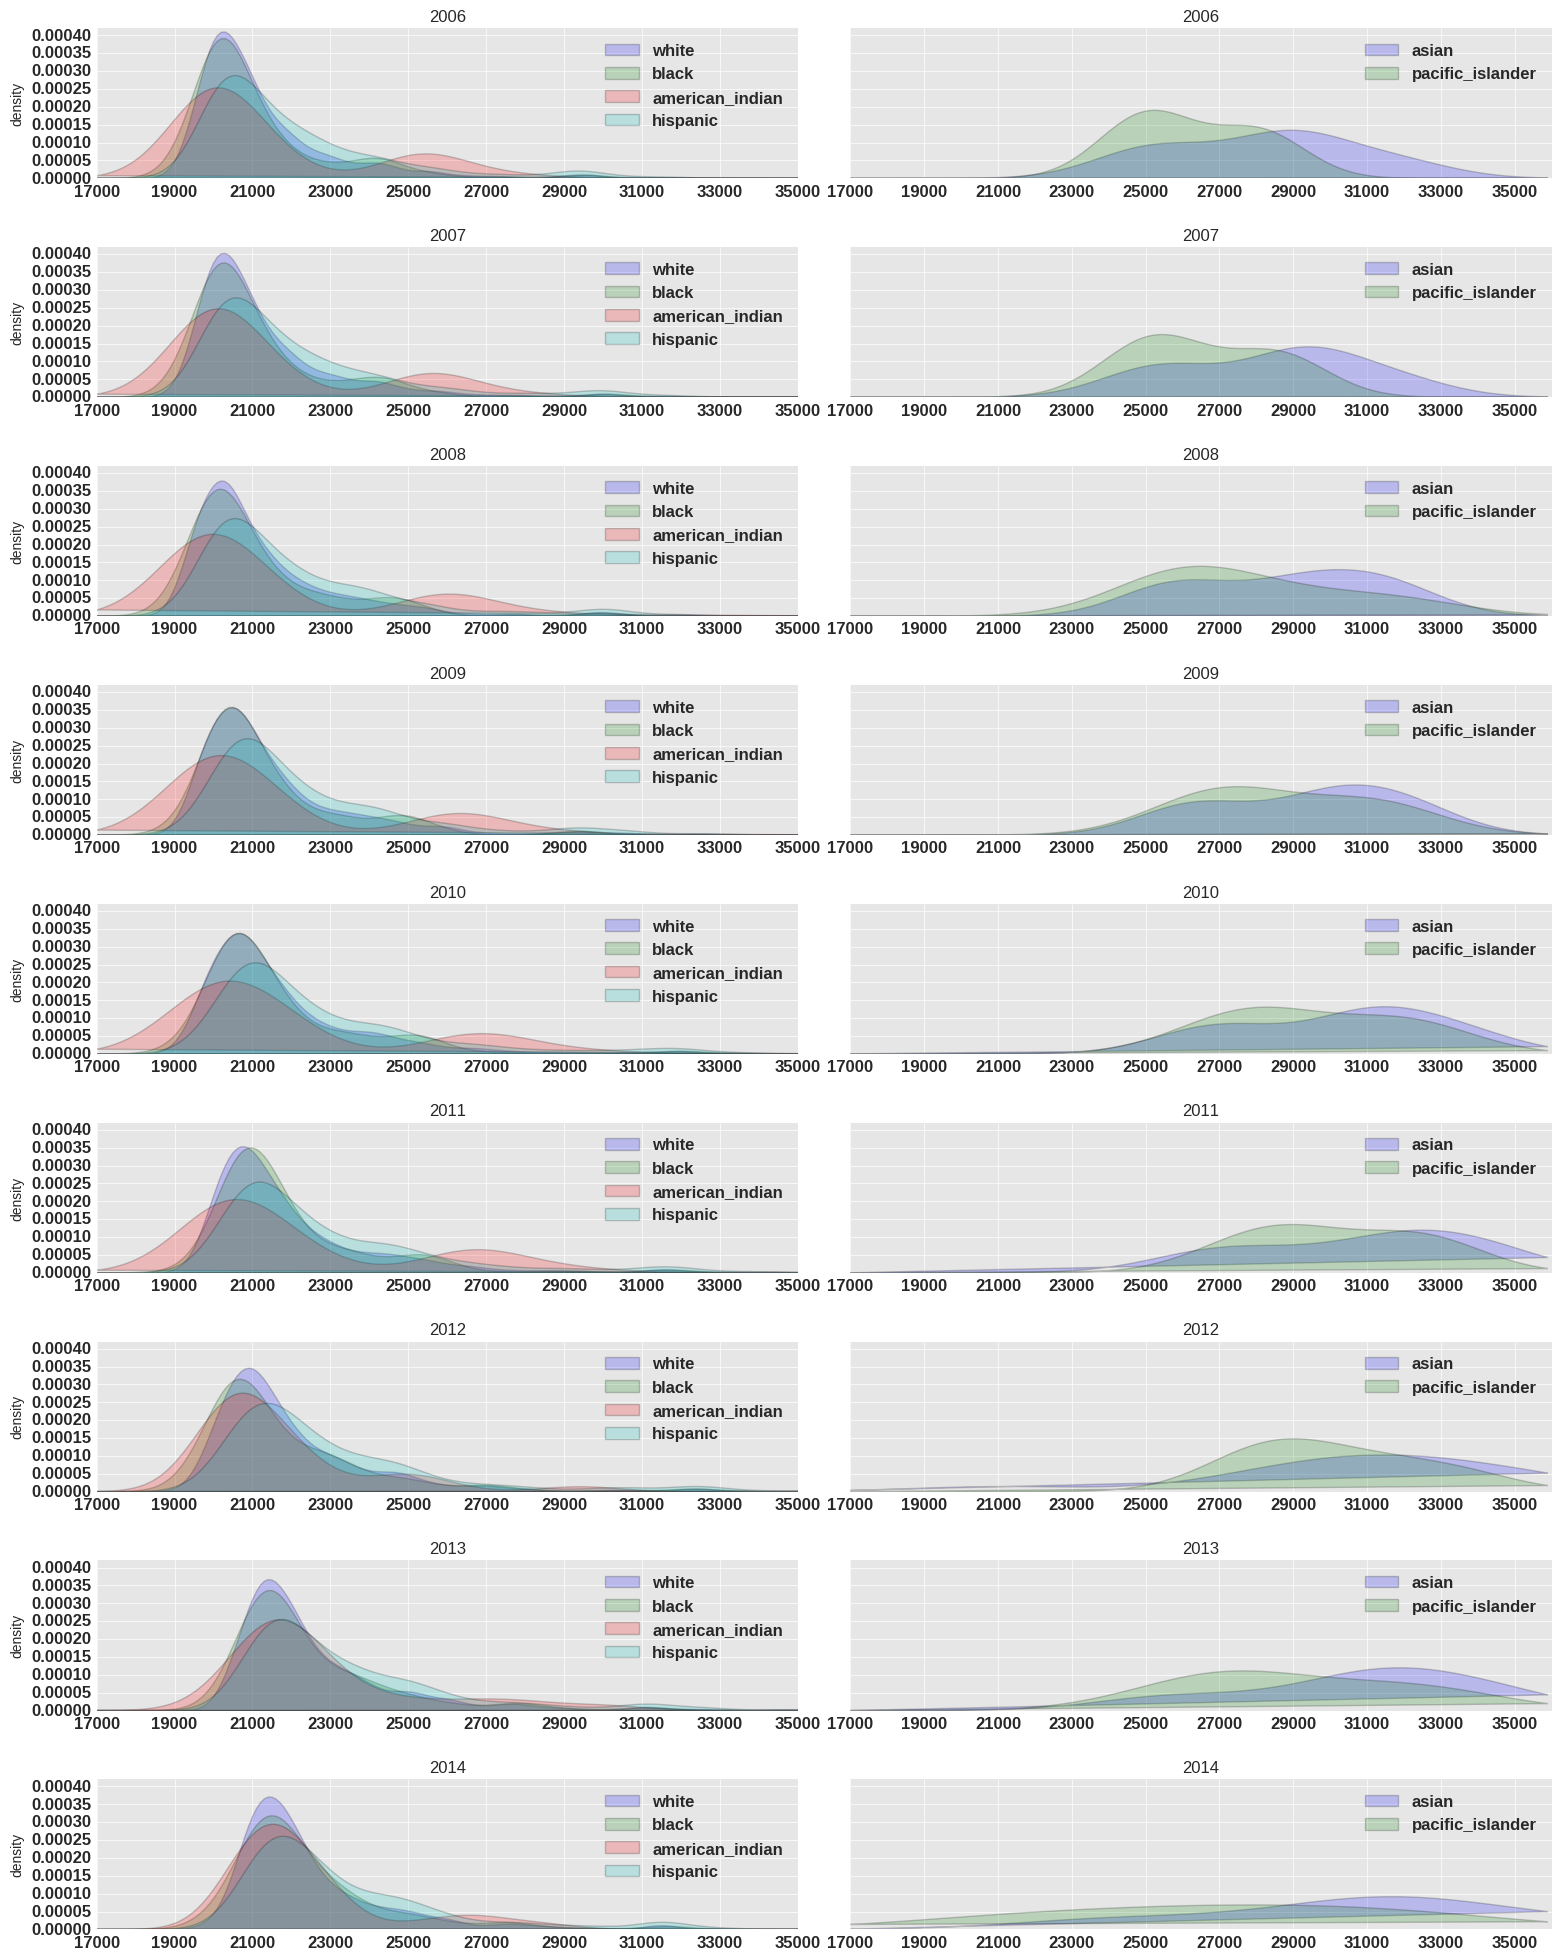

In [776]:
f, ((ax11, ax12), (ax21, ax22), (ax31, ax32), (ax41, ax42), (ax51, ax52), (ax61, ax62), (ax71, ax72), (ax81, ax82), (ax91, ax92)) = \
    plt.subplots(num_race_years, 2, sharey=True, figsize=(16, 20))
axes = [ax11, ax21, ax31, ax41, ax51, ax61, ax71, ax81, ax91, ax12, ax22, ax32, ax42, ax52, ax62, ax72, ax82, ax92]

alpha = 0.2
x = numpy.arange(17000, 36000, 100)
plot_idx = 0

races_group1 = ["white", "black", "american_indian", "hispanic"]
races_group2 = ["asian", "pacific_islander"]

for year in race_years:
    for race in races_group1:
        axes[plot_idx].fill(x, race_density[race][year](x), alpha=alpha)#, color=current_color_palette[0])
        # axes[plot_idx].fill(x, race_density["white"][year](x), alpha=alpha)#, color=current_color_palette[0])
        # axes[plot_idx].fill(x, race_density["black"][year](x), alpha=alpha)#, color=current_color_palette[0])
        # axes[plot_idx].fill(x, race_density["american_indian"][year](x), alpha=alpha)#, color=current_color_palette[0])
        # axes[plot_idx].fill(x, race_density["hispanic"][year](x), alpha=alpha)#, color=current_color_palette[0])    
    
    axes[plot_idx].set_title(year,  fontsize=12)
    axes[plot_idx].legend(labels=races_group1, fontsize=12)
    axes[plot_idx].set_xlim((17000, 31000))
    axes[plot_idx].set_ylim((0, 0.00042))
    axes[plot_idx].set_ylabel("density", fontsize=10)
    axes[plot_idx].set_xticks(range(17000, 36000, 2000))
    
    for race in races_group2:
        axes[plot_idx + num_race_years].fill(x, race_density[race][year](x), alpha=alpha)#, color=current_color_palette[0])
        # axes[plot_idx + num_race_years].fill(x, race_density["asian"][year](x), alpha=alpha)#, color=current_color_palette[0])
        # axes[plot_idx + num_race_years].fill(x, race_density["pacific_islander"][year](x), alpha=alpha)#, color=current_color_palette[0])
    
    axes[plot_idx + num_race_years].set_title(year,  fontsize=12)
    axes[plot_idx + num_race_years].legend(labels=races_group2, fontsize=12)
    axes[plot_idx + num_race_years].set_xlim((17000, 36000))
    axes[plot_idx + num_race_years].set_ylim((0, 0.00042))
    axes[plot_idx + num_race_years].set_xticks(range(17000, 36000, 2000))
    
    # Go to next plot
    plot_idx += 1

f.tight_layout()
f.subplots_adjust(wspace=0.075)

setup_custom_visuals()

### Living Wage County Weighted Breakdown by Race

In [828]:
# Find densities of weighted 
weighted_costs = defaultdict(dict)
# for year in race_years:
for year in model_years:
    subdf = final_model_values_df[final_model_values_df['year'] == year].join(census_race_data_df).dropna()

    for race in census_races:
        subdf[race + '_pop'] = (subdf['pop'] * (subdf[race + '_perc'] / 100.0)).map(int)
        
        if year not in weighted_costs or race not in weighted_costs[year]:
            weighted_cost = sm.nonparametric.KDEUnivariate(subdf["total_cost"])
            weighted_cost.fit(fft=False, weights=subdf[race + '_pop'])
            weighted_costs[year][race] = weighted_cost

Custom weighted violin plots (saved as [public gist](https://gist.github.com/jquacinella/1a6341f0f1446973714c))

In [778]:
# import weighted
# from matplotlib.cbook import violin_stats
# from scipy import stats
# import statsmodels.api as sm

def vdensity_with_weights(weights):
    def vdensity(data, coords):
        # print "2w: %s" % weights
        # print "2d: %s" % data
        weighted_cost = sm.nonparametric.KDEUnivariate(data)
        weighted_cost.fit(fft=False, weights=weights)

        y = weighted_cost.evaluate(coords)
        # print "y: %s" % y
        return y
    return vdensity

def custom_violin_stats(data, weights):
    # print "1w: %s" % weights
    # print "1d: %s" % data
    median = weighted.quantile_1D(data, weights, 0.5)
    mean, sumw = np.ma.average(data, weights=list(weights), returned=True)
    results = violin_stats(data, vdensity_with_weights(weights))
    
    # print "orig results: %s" % results[0]["vals"]
    
    results[0][u"mean"] = mean
    results[0][u"median"] = median
    results[0][u"min"] =  np.min(data)
    results[0][u"max"] =  np.max(data)

    # print "new results: %s" % results[0]["vals"]
    return results

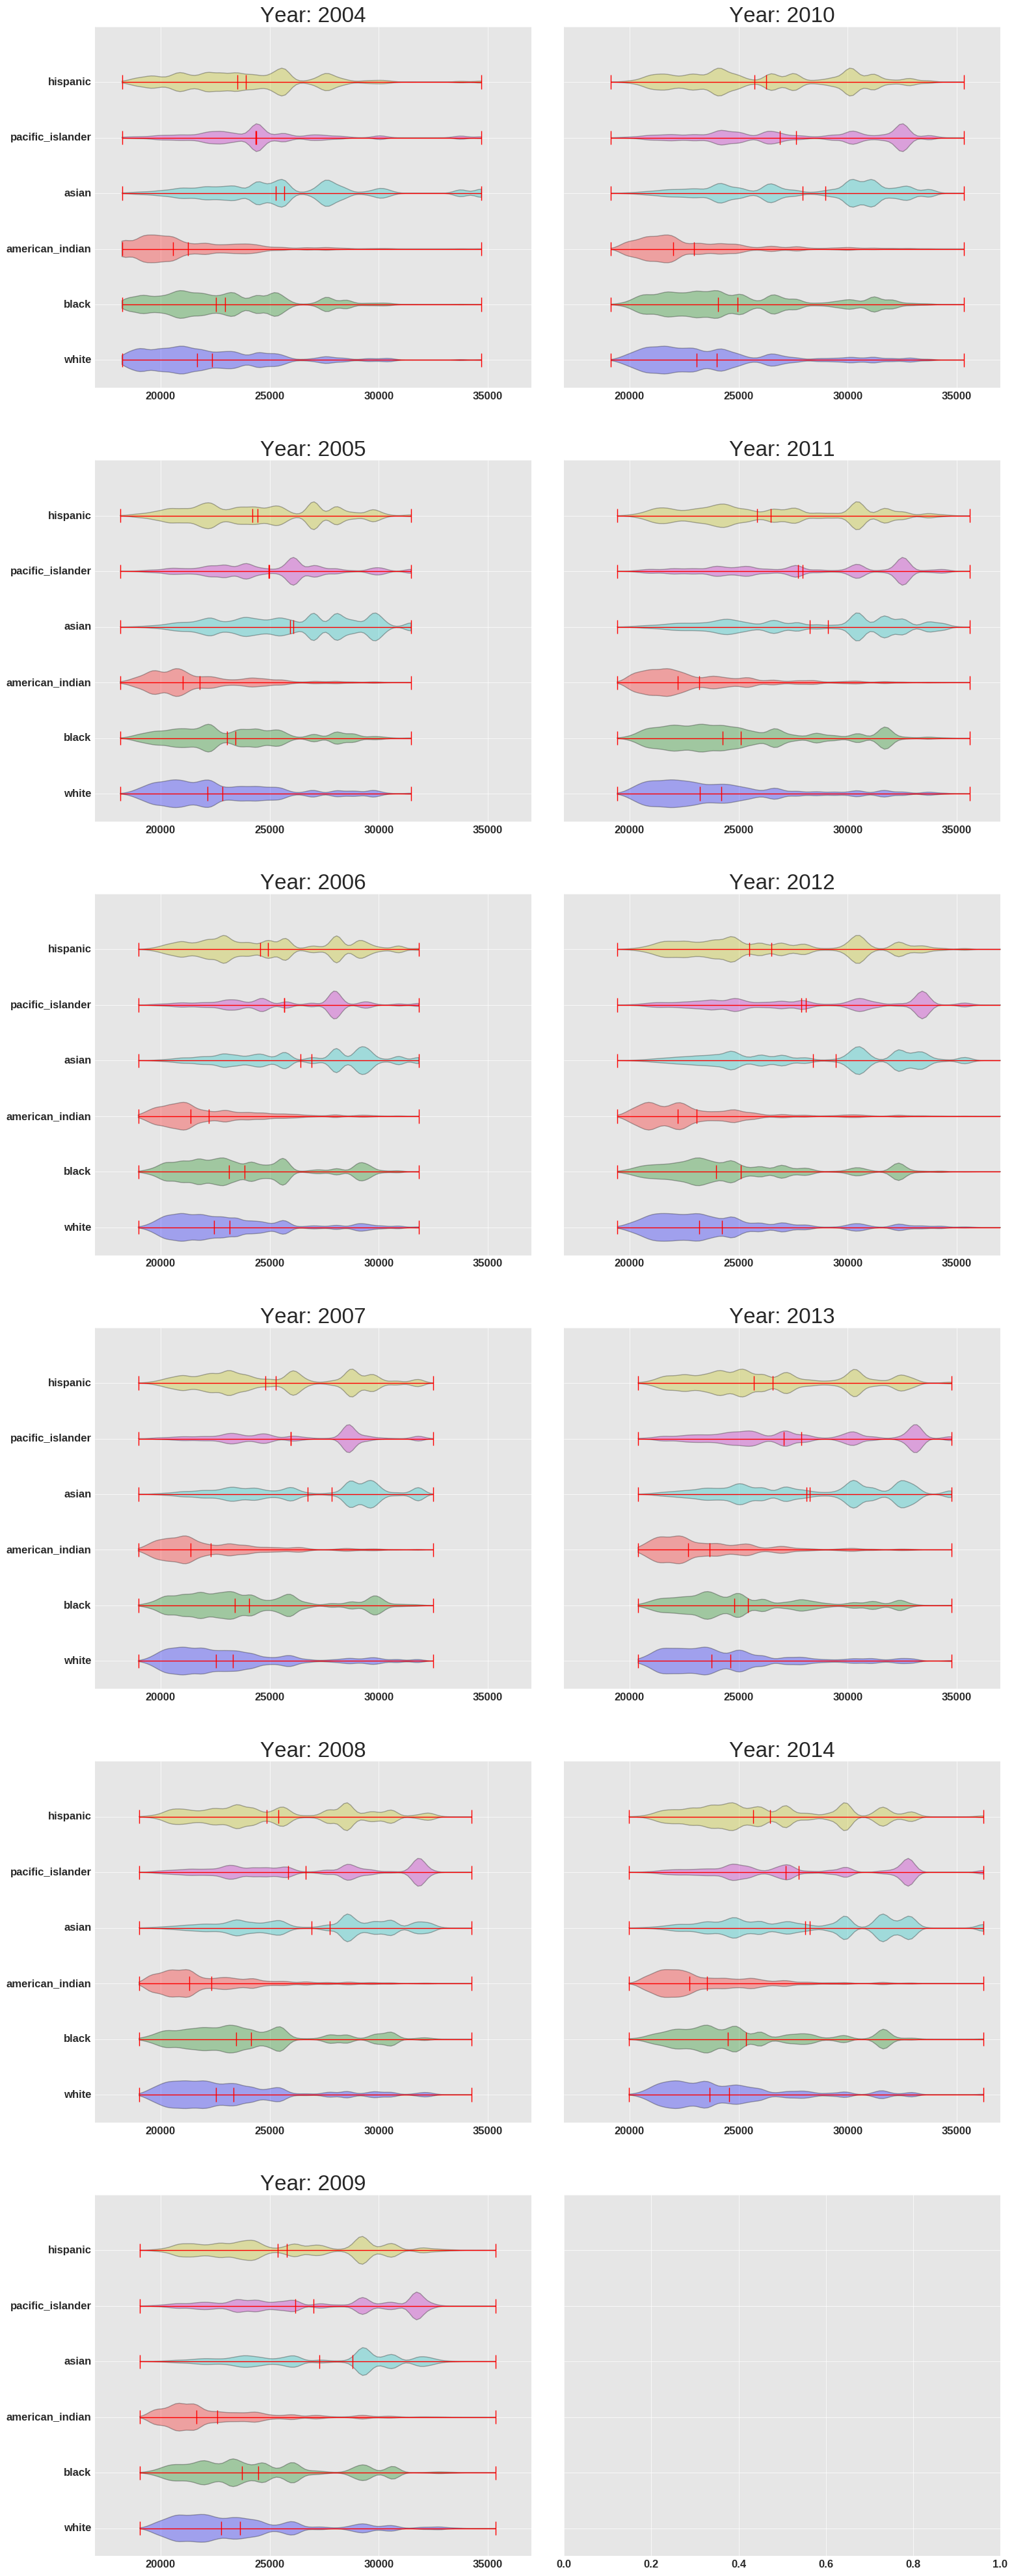

In [802]:
# fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 10))
# f, (ax11, ax21, ax31, ax41, ax51, ax61, ax71, ax81, ax91) = \
f, ((ax11, ax12), (ax21, ax22), (ax31, ax32), (ax41, ax42), (ax51, ax52), (ax61, ax62)) = \
    plt.subplots(int(math.ceil(len(model_years)/2))+1, 2, sharey=True, figsize=(16, 40))
axes = [ax11, ax21, ax31, ax41, ax51, ax61, ax12, ax22, ax32, ax42, ax52, ax62]


plot_idx = 0

# Find densities of weighted 
weighted_costs = defaultdict(dict)
# for year in race_years:
for year in model_years:
    subdf = final_model_values_df[final_model_values_df['year'] == year].join(census_race_data_df).dropna()

    pos_idx = 0
    for race in census_races:
        subdf[race + '_pop'] = (subdf['pop'] * (subdf[race + '_perc'] / 100.0)).map(float)
        
        vpstats1 = custom_violin_stats(np.asarray(subdf['total_cost']), np.asarray(subdf[race + '_pop']))
        tmp = axes[plot_idx].violin(vpstats1, [pos_idx+1], vert=False, 
                              showmeans=True, showextrema=True, showmedians=True)

        for pc in tmp['bodies']:
            pc.set_facecolor(current_color_palette[pos_idx])
            pc.set_edgecolor('black')
        
        pos_idx += 1
    
    axes[plot_idx].set_xlim((17000, 37000))
    axes[plot_idx].set_ylim((0.5, len(census_races)+1))
    axes[plot_idx].set_title("Year: %s" % year)
    axes[plot_idx].set_yticklabels(labels=[''] + census_races)
    plot_idx += 1
    

f.tight_layout()
f.subplots_adjust(hspace=0.2, wspace=0.075)
plt.show()

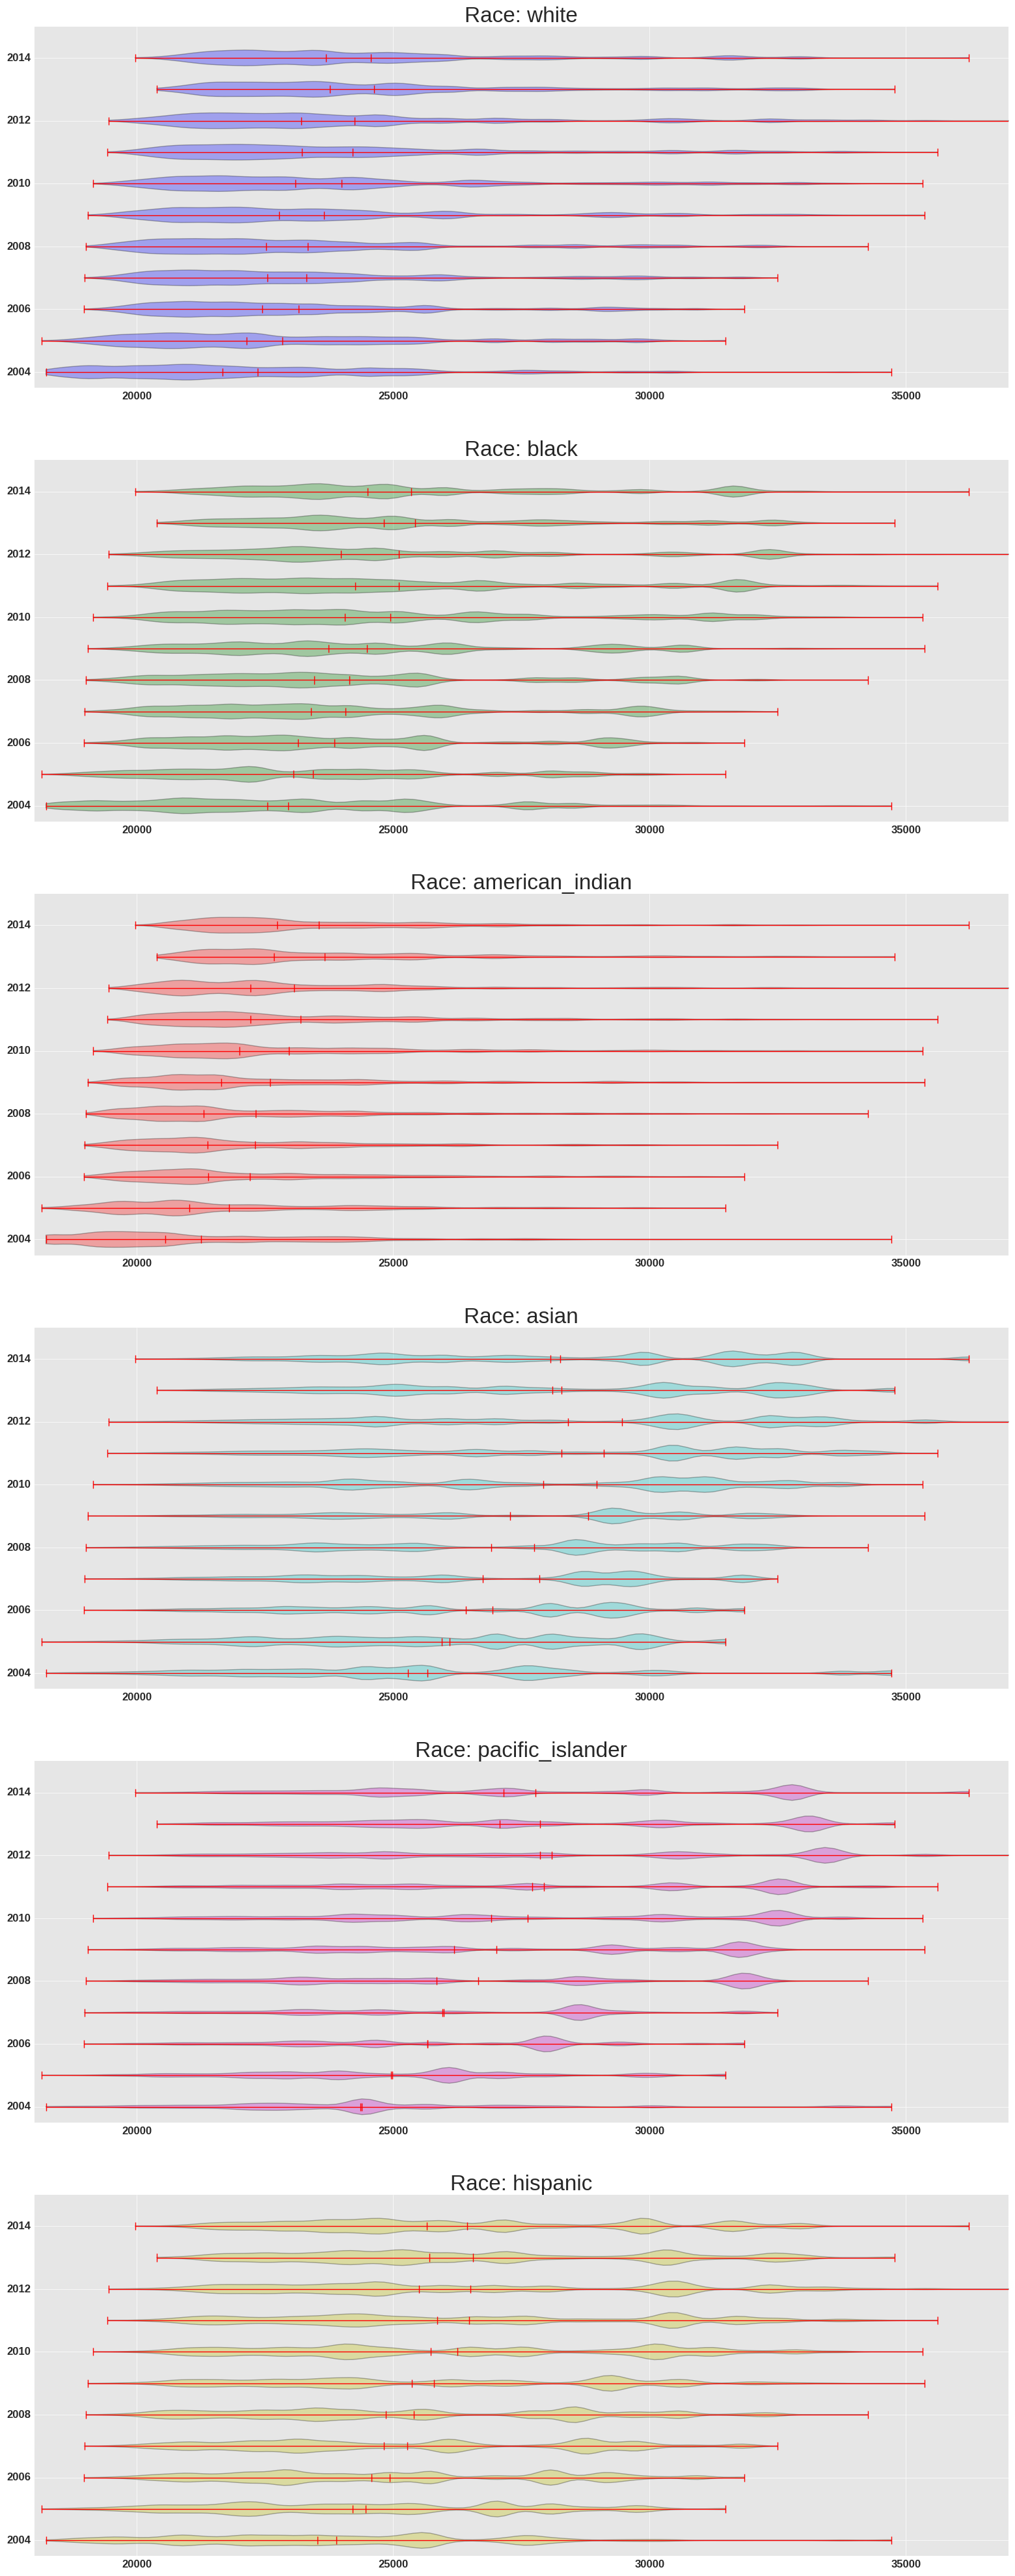

In [819]:
f, (ax11, ax21, ax31, ax41, ax51, ax61) = \
    plt.subplots(num_races, sharey=True, figsize=(16, 40))
axes = [ax11, ax21, ax31, ax41, ax51, ax61]

plot_idx = 0

# Find densities of weighted 
weighted_costs = defaultdict(dict)
for race in census_races:
    pos_idx = 0
    #for year in race_years:
    for year in model_years:
        subdf = final_model_values_df[final_model_values_df['year'] == year].join(census_race_data_df).dropna()
        subdf[race + '_pop'] = (subdf['pop'] * (subdf[race + '_perc'] / 100.0)).map(float)
        
        vpstats1 = custom_violin_stats(np.asarray(subdf['total_cost']), np.asarray(subdf[race + '_pop']))
        tmp = axes[plot_idx].violin(vpstats1, [pos_idx], vert=False, 
                              showmeans=True, showextrema=True, showmedians=True)

        for pc in tmp['bodies']:
            pc.set_facecolor(current_color_palette[plot_idx])
            pc.set_edgecolor('black')
        
        pos_idx += 1
    
    axes[plot_idx].set_xlim((18000, 37000))
    axes[plot_idx].set_ylim((-0.5, len(model_years)))
    axes[plot_idx].set_title("Race: %s" % race)
    axes[plot_idx].set_yticklabels([''] + [year for year in model_years if year % 2 == 0])
    plot_idx += 1
    
f.tight_layout()
f.subplots_adjust(hspace=0.2, wspace=0.075)
plt.show()

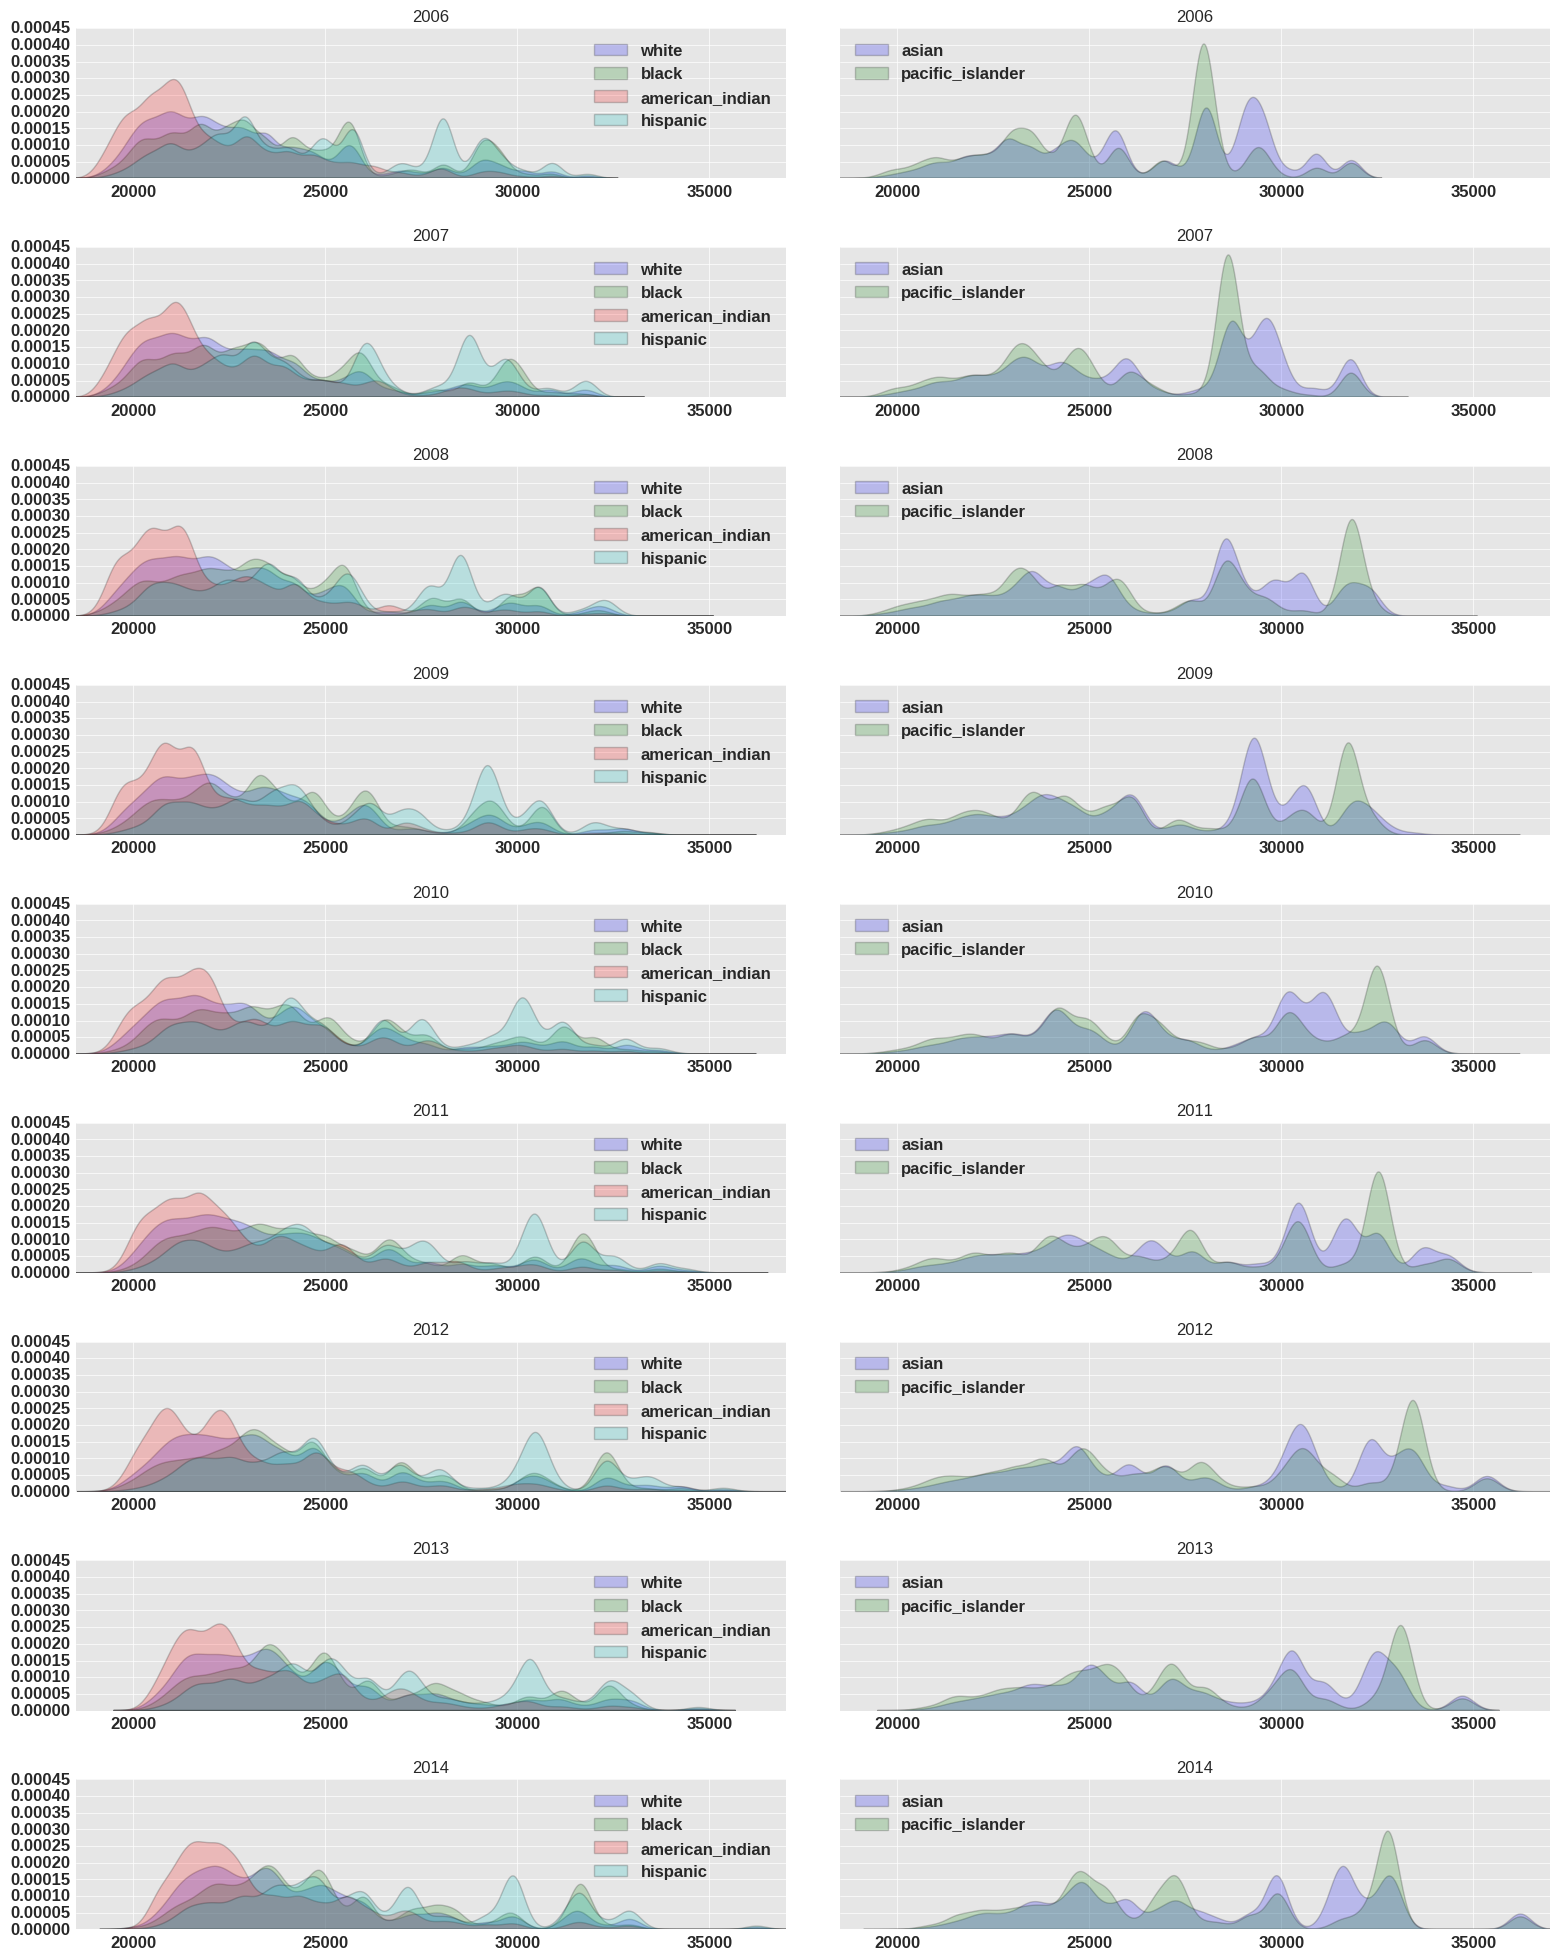

In [829]:
f, ((ax11, ax12), (ax21, ax22), (ax31, ax32), (ax41, ax42), (ax51, ax52), (ax61, ax62), (ax71, ax72), (ax81, ax82), (ax91, ax92)) = \
    plt.subplots(num_race_years, 2, sharey=True, figsize=(16, 20))
axes = [ax11, ax21, ax31, ax41, ax51, ax61, ax71, ax81, ax91, ax12, ax22, ax32, ax42, ax52, ax62, ax72, ax82, ax92]

plot_idx = 0
for year in race_years:
    for race in races_group1:
        axes[plot_idx].fill(weighted_costs[year][race].support, weighted_costs[year][race].density, alpha=alpha)
        
    axes[plot_idx].set_title(year,  fontsize=12)
    axes[plot_idx].legend(races_group1, fontsize=12, loc="upper right")
    axes[plot_idx].set_xlim((18500, 37000))
    # axes[plot_idx].set_ylim((0.00, 0.10))
    
    for race in races_group2:
        axes[plot_idx + num_race_years].fill(weighted_costs[year][race].support, weighted_costs[year][race].density, alpha=alpha)
        
    axes[plot_idx + num_race_years].set_title(year,  fontsize=12)
    axes[plot_idx + num_race_years].legend(races_group2, fontsize=12, loc="upper left")
    axes[plot_idx + num_race_years].set_xlim((18500, 37000))
    # axes[plot_idx].set_ylim((0.00, 0.10))
    
    # Go to next plot
    plot_idx += 1

f.tight_layout()
plt.subplots_adjust(wspace=0.075)
setup_custom_visuals()

### Population Weighted Averages Broken Down By Race

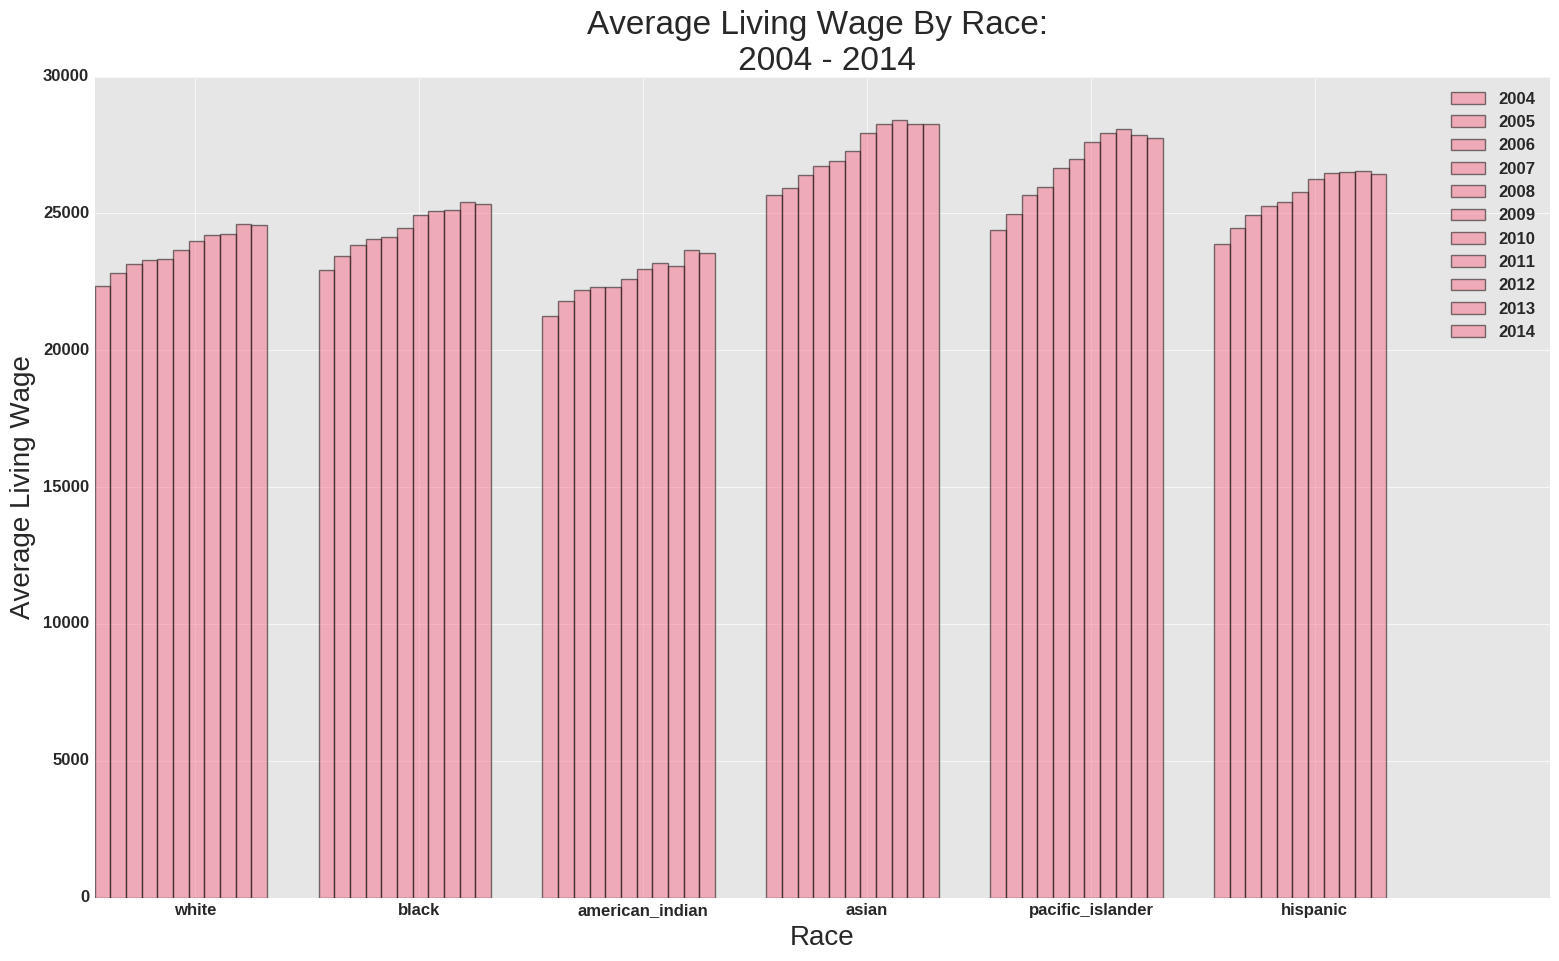

In [830]:
fig, ax = plt.subplots(figsize=(16, 10))
index = np.arange(len(census_races))
bar_width = 0.07

for idx, year in enumerate(model_years):
    race_points = []
    subdf = final_model_values_df[final_model_values_df['year'] == year].join(census_race_data_df).dropna()
    for race in census_races:
        subdf[race + '_pop'] = subdf["pop"] * (subdf[race + '_perc'] / 100.0)
        race_points.append(sum(subdf[race + '_pop'] * subdf['total_cost']) / sum(subdf[race + '_pop']))
    plt.bar(index + idx*bar_width, race_points, bar_width, color=husl_color_palette[0], alpha=0.5)

plt.xlabel('Race')
plt.ylabel('Average Living Wage')
plt.title('Average Living Wage By Race: \n 2004 - 2014')
plt.xticks(index + 9*width/2, census_races)
plt.legend(labels=model_years, fontsize=12)
plt.xlim((0,6.5))
plt.tight_layout()
plt.show()

# Living Wage Gap

([TOC](#Table-of-Contents))

The living wage gap can be defined as:

* the difference between the living wage and the applicable minimum wage.
* the difference between the living wage and the applicable median income.

For the median wage, two data sets from the [Census.gov](http://www.census.gov/hhes/www/income/about/index.html):

> **[American Community Survey (ACS)](http://www.census.gov/programs-surveys/acs/)**: Starting with 2000, the ACS provides subnational estimates of income and poverty for the nation, states, and places, counties, and metropolitan areas with a population of at least 250,000. The sample size of this survey from 2000 to 2004 was about 800,000 addresses per year. In 2006, the ACS began releasing annual subnational estimates of income and poverty for all places, counties, and metropolitan areas with a population of at least 65,000 as well as the nation and the states. The sample size of this survey increased to about three million addresses per year, making the ACS exceptionally useful for subnational analyses.

> ** [Small Area Income and Poverty Estimates](http://www.census.gov//did/www/saipe/) **: The SAIPE program produces single-year estimates of median household income and poverty for states and all counties, as well as population and poverty estimates for school districts. Since SAIPE estimates combine ACS data with administrative and other data, SAIPE estimates generally have lower variance than ACS estimates but are released later because they incorporate ACS data in the models. For counties and school districts, particularly those with populations below 65,000, the SAIPE program provides the most accurate subnational estimates of poverty. For counties, SAIPE generally provides the best single year estimates of median household income.

Based on the description above, I will choose SAIPE data for estimates of county median income.

For the minimum wage:

> ** [Basic Minimum Wages](http://www.dol.gov/whd/state/stateMinWageHis.htm) **: CHANGES IN BASIC MINIMUM WAGES IN NON-FARM EMPLOYMENT UNDER STATE LAW: SELECTED YEARS 1968 TO 2013

We calculate the gap for each FIPS and year combination and look for any trends.

**TODO** 

- start with median wage living wage gap
  - load median wage data (DONE)
  - validate the data: what to do about empty cells?
  - for each county in each year, calculate the gap
  - calculate state averages
  - look at state averages
  - calculate regional averages
  - look at reginal averages
- start with minimum wage living wage gap
  - load minimum wage data (DONE)
  - validate the data: how do you fill in states with no minimum wage? (DONE)
  - for each county in each year, calculate the gap
  - calculate state averages
  - look at state averages
  - calculate regional averages
  - look at regional averages
- Using [PINC survey data](http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc10_000.htm), find out what % of population live at or below living wage
- what % of people make the living wage per year? can this even be done? would need more info on underlying distribution of wages outside of mean. pinc data?


## Small Area Income and Poverty Estimates

First, we'll download the data for 2004 - 2014 and load it into a dataframe:

In [144]:
saipe_county_data = {}
saipe_state_data = {}
saipe_national_data = {}

saipe_path = "data/census/SAIPE"
saipe_columns=["state", "county", "state_alpha", "countyname", "median_income"]

for year in model_years:
# for year in [2006]:
    filename = os.path.join(saipe_path, "est%sALL_stripped.csv" % str(year)[2:])
    df = pd.DataFrame.from_csv(filename, header=None, index_col=False)
    df.columns = saipe_columns

    # Skip counties with no median income
    if year == model_years[0]:
        print "Dropped: %d" % np.argmax(df["median_income"] == ".")
        df = df[ df["median_income"] != "." ]
    else:
        startlen = len(df)
        df = df.dropna()
        print "Dropped: %d" % (startlen - len(df))
        
    # Cleanup median income
    try:
        if df["median_income"].dtype == np.object:
            df["median_income"] = df["median_income"].apply(lambda x: float(x.replace(",", "")))
    except Exception as e:
        pass
    
    # Filter for only counties
    saipe_county_data[year] = df[ df["county"] != 0 ].copy()
    
    # Calculate FIPS for each county
    try:
        saipe_county_data[year]["fips"] = saipe_county_data[year].apply(
            lambda row: pad_fips(str(row["state"]) + pad_county(int(row["county"]))), axis=1)
    except Exception as e:
        print df[df["county"].isnull()]
    
    # Filter out the states
    saipe_state_data[year] = df[ (df["county"] == 0) & (df["countyname"] != "United States") ].copy()
    
    # Filter out national average
    saipe_national_data[year] = df[ (df["county"] == 0) & (df["countyname"] == "United States") ].copy()
    
    print "Num counties: %d" % len(saipe_county_data[year])

Dropped: 0
Num counties: 3141
Dropped: 0
Num counties: 3141
Dropped: 0
Num counties: 3141
Dropped: 1
Num counties: 3140
Dropped: 1
Num counties: 3141
Dropped: 1
Num counties: 3142
Dropped: 0
Num counties: 3143
Dropped: 0
Num counties: 3143
Dropped: 0
Num counties: 3143
Dropped: 0
Num counties: 3143
Dropped: 0
Num counties: 3142


## Minimum Wage Data

Here I load the minimum wage data from a hand-written CSV file that was generated from the HTML at the minimum wage [data source](http://www.dol.gov/whd/state/stateMinWageHis.htm). For any state with no minimum wage or a minimum wage less then the Fedderal minimum wage, we use the Federal minimum wage. To [quote](http://www.shrm.org/LegalIssues/StateandLocalResources/StateandLocalStatutesandRegulations/Documents/minimprevwage.pdf):

> If a state minimum wage rate is less then the federal rate of \$7.25 per hour then employers
are required to follow federal minimum wage law. State laws will only supersede federal requirements when
the state law provides a more generous benefit to employees.



In [162]:
# Load minimum wage data gathered by hand from data source
minimum_wage_df = pd.DataFrame.from_csv("data/census/MinimumWage/minimum_wage.csv")

def convert_to_yearly(x):
    if x != -1: 
        return x * 52.0 * 40.0
    else: 
        return -1.0

# Convert to yearly wage
minimum_wage_df = minimum_wage_df.applymap(convert_to_yearly)
minimum_wage_df.columns = [ int(year) for year in minimum_wage_df.columns]
minimum_wage_df = minimum_wage_df[model_years]

# Fill in missing minimum wages with federal minimum wage
for year in model_years:
    minimum_wage_df[year][ minimum_wage_df[year] < minimum_wage_df[year]["Federal"] ] = minimum_wage_df[year]["Federal"]
    
# Convert statenames to state abbreviations for joining later
minimum_wage_df.index = map(lambda x: statename_to_state_mapping[x.lower()], minimum_wage_df.index)

## Combine Wage Data with Model Values

In [831]:
# Create dataframe that combines model values with appropriate minimum and media wage
wages_df = pd.DataFrame()
wages = [ ]
for year in model_years:
    final_model_values_subdf = final_model_values_df[ final_model_values_df['year'] == year]
    saipe_county_data[year].index = saipe_county_data[year]['fips']
    df = saipe_county_data[year].join(final_model_values_subdf, lsuffix='l', how='inner')[["pop", "state_alpha", "countyname", "median_income", "total_cost", "year"]]
    
    df = df.join(minimum_wage_df[year], on='state_alpha')
    df.rename(columns={year: "minimum_wage"}, inplace=True)
    
    wages.append(df)
wages_df = pd.concat(wages)
wages_df = wages_df.reset_index()
wages_df = wages_df.set_index(['fips'])

# wages_df = wages_df.reset_index()

# Calculate gaps
wages_df['inflation_adjust'] = wages_df['year'].map(lambda year: updated_inflation_multipliers[year])
wages_df['gap_median'] = wages_df['median_income'] * wages_df['inflation_adjust'] - wages_df['total_cost']
wages_df['gap_minimum'] = wages_df['minimum_wage'] * wages_df['inflation_adjust'] - wages_df['total_cost']

# wages_df['year'].map(lambda year: updated_inflation_multipliers[year]) * ([15.0 * 42 * 50] * len(wages_df['year']))

wages_df['gap_minimum15'] = ([ 15.0 * 40 * 52 ]*len(wages_df)) * wages_df['inflation_adjust'] - wages_df['total_cost']

wages_df

pop state_alpha          countyname  median_income  \
fips                                                                
100199999    43671          AL      Autauga County          45379   
100399999   140415          AL      Baldwin County          42227   
100599999    29038          AL      Barbour County          26495   
100799999    20826          AL         Bibb County          34055   
100999999    51024          AL       Blount County          38643   
101199999    11714          AL      Bullock County          20485   
101399999    21399          AL       Butler County          27244   
101599999   112249          AL      Calhoun County          34813   
101799999    36583          AL     Chambers County          30573   
101999999    23988          AL     Cherokee County          33564   
102199999    39593          AL      Chilton County          35507   
102399999    15922          AL      Choctaw County          27690   
102599999    27867          AL       Clarke County          28776   
102799999    14254          AL         Clay County          31194   
102999999    14123          AL     Cleburne County          34128   
103199999    43615          AL       Coffee County          37066   
103399999    54984          AL      Colbert County          34575   
103599999    14089          AL      Conecuh County          24334   
103799999    12202          AL        Coosa County          30173   
103999999    37631          AL    Covington County          29237   
104199999    13665          AL     Crenshaw County          28909   
104399999    77483          AL      Cullman County          35150   
104599999    49129          AL         Dale County          34065   
104799999    46365          AL       Dallas County          24949   
104999999    64452          AL       DeKalb County          32286   
105199999    65874          AL       Elmore County          43645   
105399999    38440          AL     Escambia County          29330   
105599999   103459          AL       Etowah County          32727   
105799999    18495          AL      Fayette County          30595   
105999999    31223          AL     Franklin County          29234   
...            ...         ...                 ...            ...   
5512999999   15911          WI     Washburn County          42079   
5513199999  131887          WI   Washington County          69346   
5513399999  389891          WI     Waukesha County          76584   
5513599999   52410          WI      Waupaca County          52850   
5513799999   24496          WI     Waushara County          46835   
5513999999  166994          WI    Winnebago County          52711   
5514199999   74749          WI         Wood County          51003   
5600199999   36299          WY       Albany County          42838   
5600399999   11668          WY     Big Horn County          50437   
5600599999   46133          WY     Campbell County          79358   
5600799999   15885          WY       Carbon County          58225   
5600999999   13833          WY     Converse County          63166   
5601199999    7083          WY        Crook County          59701   
5601399999   40123          WY      Fremont County          48624   
5601599999   13249          WY       Goshen County          45721   
5601799999    4812          WY  Hot Springs County          44427   
5601999999    8569          WY      Johnson County          51434   
5602199999   91738          WY      Laramie County          57192   
5602399999   18106          WY      Lincoln County          63575   
5602599999   75450          WY      Natrona County          57427   
5602799999    2484          WY     Niobrara County          45251   
5602999999   28205          WY         Park County          55354   
5603199999    8667          WY       Platte County          49713   
5603399999   29116          WY     Sheridan County          54716   
5603599999   10247          WY     Sublette County          77222   
5603799999   

In [832]:
# Serialize for later use
# wages_df.to_csv('wages_df.v3.csv')

### Analysis

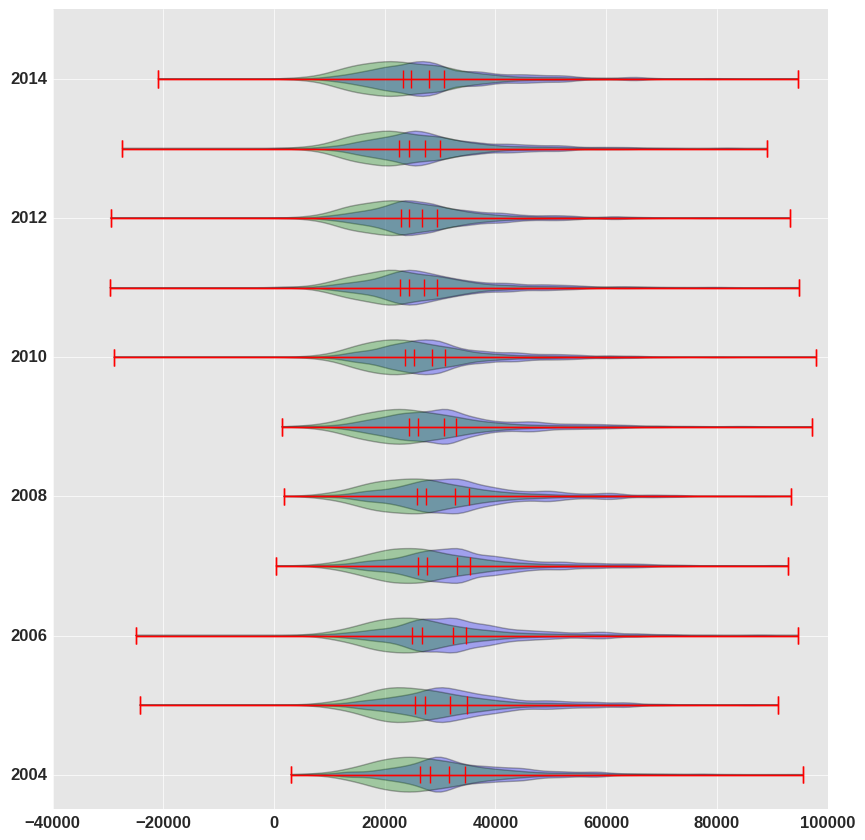

In [839]:
f, axes = plt.subplots(1, 1, sharey=True, figsize=(10, 10))
# axes = [ax11, ax21, ax31, ax41, ax51, ax61, ax71, ax81, ax91, ax12, ax22, ax32, ax42, ax52, ax62, ax72, ax82, ax92]

for idx, year in enumerate(model_years):
    # subdf = wages_df.loc[year]
    subdf = wages_df[ wages_df["year"] == year]

    vpstats1 = custom_violin_stats(np.asarray(subdf['gap_median']), np.asarray(subdf['pop']))
    tmp = axes.violin(vpstats1, [idx], vert=False, showmeans=True, showextrema=True, showmedians=True)
    for pc in tmp['bodies']:
        pc.set_facecolor(current_color_palette[0])
        pc.set_edgecolor('black')
            
    tmp = axes.violinplot([subdf['gap_median']], [idx], vert=False, showmeans=True, showmedians=True)
    for pc in tmp['bodies']:
        pc.set_facecolor(current_color_palette[1])
        pc.set_edgecolor('black')

axes.set_ylim((-0.5, len(model_values)))
l = axes.set_yticklabels(['']+ [year for year in model_years if year % 2 == 0])

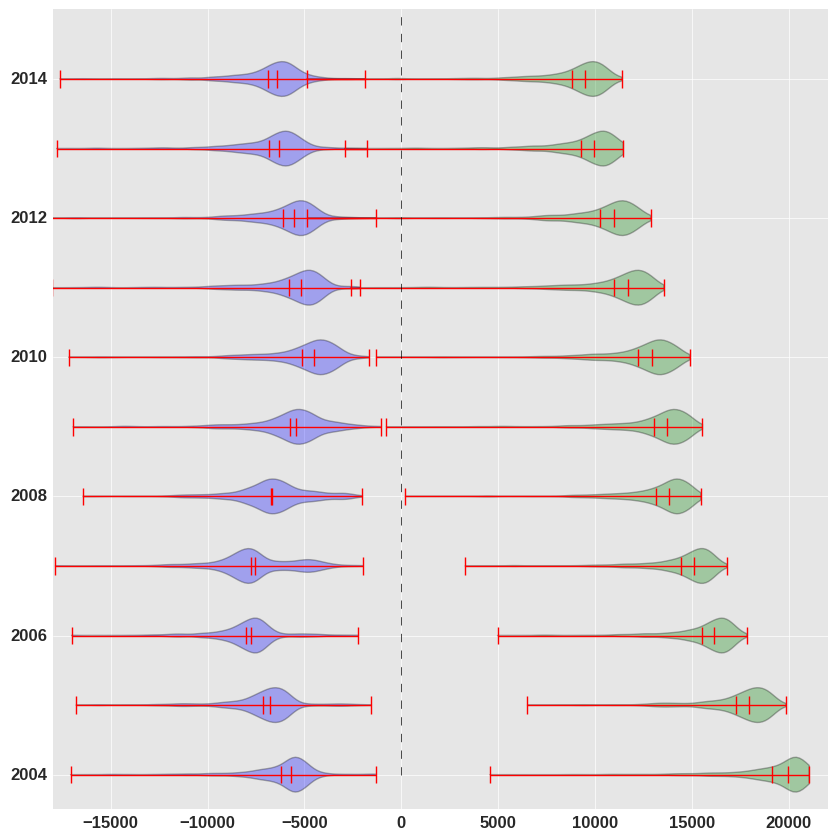

In [845]:
f, axes = plt.subplots(1, 1, sharey=True, figsize=(10, 10))

for idx, year in enumerate(model_years):
    # subdf = wages_df.loc[year]
    subdf = wages_df[ wages_df["year"] == year ]

    subdf_gap_minimum = subdf['gap_minimum'][ np.invert(np.isnan(subdf['gap_minimum'])) ]
    subdf_gap_minimum15 = subdf['gap_minimum15'][ np.invert(np.isnan(subdf['gap_minimum'])) ]
    subdf_pop = subdf['pop'][ np.invert(np.isnan(subdf['gap_minimum'])) ]

    # vpstats1 = custom_violin_stats(np.asarray(subdf_gap_minimum), np.asarray(subdf_pop))
    # tmp = axes.violin(vpstats1, [0 + 0.6*idx], vert=False, showmeans=True, showextrema=True, showmedians=True)
    tmp = axes.violinplot([subdf_gap_minimum], [0 + 1.0*idx], vert=False, showextrema=True, showmeans=True, showmedians=True)
    for pc in tmp['bodies']:
        pc.set_facecolor(current_color_palette[0])
        pc.set_edgecolor('black')
    
    # vpstats1 = custom_violin_stats(np.asarray(subdf_gap_minimum15), np.asarray(subdf_pop))
    # tmp = axes.violin(vpstats1, [0 + 0.6*idx], vert=False, showmeans=True, showextrema=True, showmedians=True)
    tmp = axes.violinplot([subdf_gap_minimum15], [0 + 1.0*idx], vert=False, showextrema=True, showmeans=True, showmedians=True)
    for pc in tmp['bodies']:
        pc.set_facecolor(current_color_palette[1])
        pc.set_edgecolor('black')

plot([0, 0], [0, len(model_years)], color='k', linestyle='--', linewidth=0.5)

axes.set_xlim((-18000, 22000))
axes.set_ylim((-0.5, len(model_values)))
l = axes.set_yticklabels(['']+ [year for year in model_years if year % 2 == 0])

## Wage Distribution

Used non-family household to match our model definition, since this model is for single adults with no children

In [846]:
wage_dist_2014_df = pd.DataFrame.from_csv(open("data/wage_distribution/ACS_14_5YR_S1901/ACS_14_5YR_S1901_with_ann_stripped.csv", "r"), index_col=False)
wage_dist_2014_df = wage_dist_2014_df[["GEO.id2", "HC04_EST_VC01", "HC04_EST_VC02", "HC04_EST_VC03", "HC04_EST_VC04", "HC04_EST_VC05"]]
wage_dist_columns = ["fips", "nf_hh_total", 
                            "nf_hh_perc_<10000", 
                            "nf_hh_perc_<14999", 
                            "nf_hh_perc_<24999", 
                            "nf_hh_perc_<34999", ]
wage_dist_2014_df.columns = wage_dist_columns

wage_dist_endpoints = [10000, 14999, 24999, 34999]
wage_dist_endpoint_colidx = [ 
    ["nf_hh_perc_<10000"],
    ["nf_hh_perc_<10000", "nf_hh_perc_<14999"],
    ["nf_hh_perc_<10000", "nf_hh_perc_<14999", "nf_hh_perc_<24999"],
    ["nf_hh_perc_<10000", "nf_hh_perc_<14999", "nf_hh_perc_<24999", "nf_hh_perc_<34999"],
]

wage_dist_2014_df["fips"] = wage_dist_2014_df["fips"].apply(lambda x: int(str(x) + '99999'))
wage_dist_2014_df = wage_dist_2014_df.set_index("fips")
wage_dist_columns = wage_dist_columns[1:]
final_costs_2014 = final_model_values_df[ final_model_values_df["year"] == 2014 ]

# print set(final_costs_2014.index) - set(wage_dist_2014_df["fips"])  # 4 counties

wage_dist_2014_final_df = final_costs_2014.join(wage_dist_2014_df)[["total_cost"] + wage_dist_columns]

In [1078]:
def calc_perc_below(row):
    tc = row["total_cost"]
    
    idx = 0 
    while idx < len(wage_dist_endpoints):
        endpoint = wage_dist_endpoints[idx]
        if tc < endpoint:
            break
        idx +=1
    try:
        return np.sum(row[wage_dist_endpoint_colidx[idx]])
    except Exception as e:
        return 0.0

# For each county, calc % of single households earning the living wage or less
wage_dist_2014_final_df['perc_less_living_wage'] = wage_dist_2014_final_df.apply(calc_perc_below, axis=1)

# Get percentage but filter out nulls
subdf = wage_dist_2014_final_df['perc_less_living_wage'][ np.invert(np.isnan(wage_dist_2014_final_df['perc_less_living_wage'])) ] / 100.0

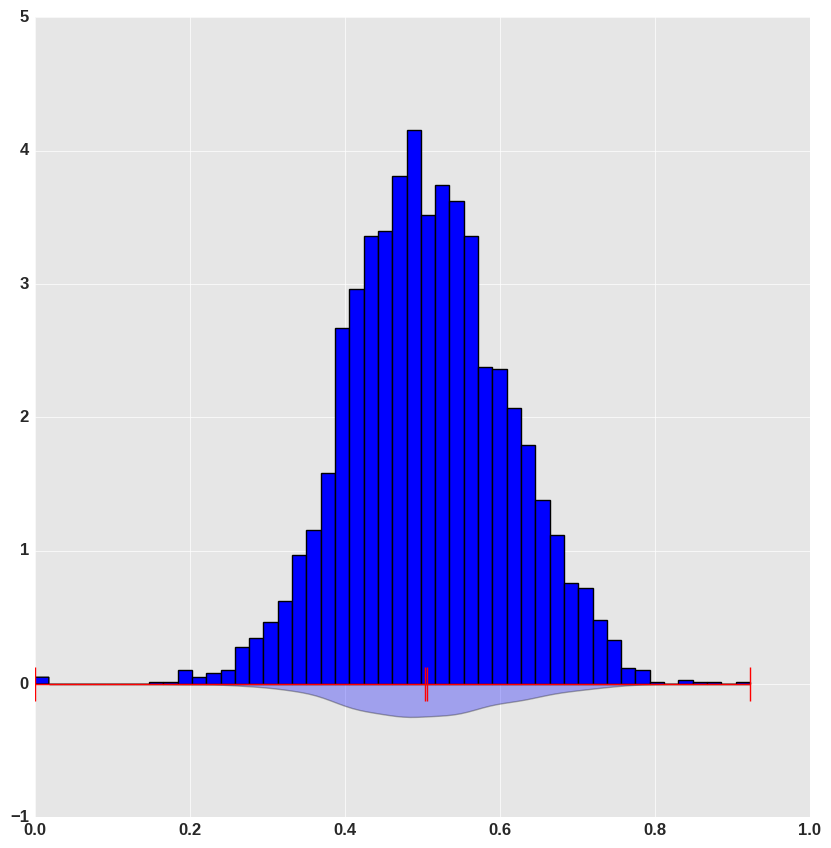

In [1079]:
f, axes = plt.subplots(1, 1, sharey=True, figsize=(10, 10))
tmp = axes.hist([subdf], bins=50, normed=True)

# f, axes = plt.subplots(1, 1, sharey=True, figsize=(10, 10))

# vpstats1 = custom_violin_stats(np.asarray(subdf_gap_minimum), np.asarray(subdf_pop))
# tmp = axes.violin(vpstats1, [0 + 0.6*idx], vert=False, showmeans=True, showextrema=True, showmedians=True)
tmp = axes.violinplot([subdf], [0], vert=False, showextrema=True, showmeans=True, showmedians=True)
for pc in tmp['bodies']:
    pc.set_facecolor(current_color_palette[0])
    pc.set_edgecolor('black')

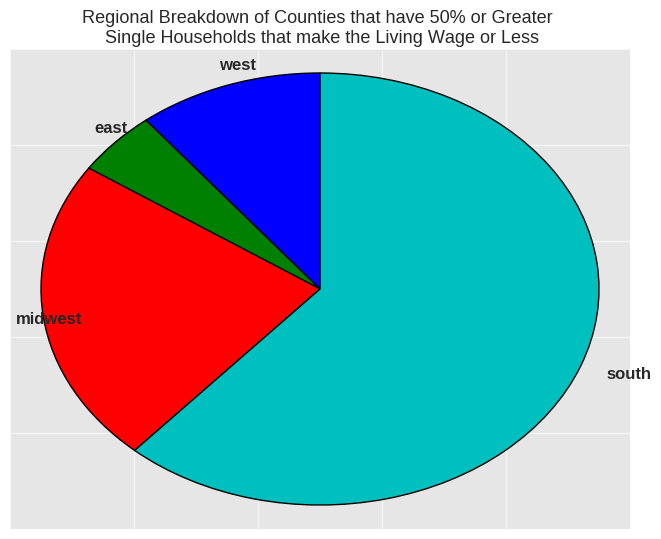

In [1080]:
import collections
counter = collections.Counter( 
    [ val for val in wage_dist_2014_final_df[ wage_dist_2014_final_df['perc_less_living_wage'] > 50.0 ]\
        .join(fmr_df.loc[2014], lsuffix='l')['region'].values if val != 'base'] )

fig = plt.figure()
ax = fig.gca()
ax.pie(counter.values(), labels=counter.keys(), startangle=90, radius=0.45, center=(0.5, 0.5), frame=True)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
l = ax.set_title("Regional Breakdown of Counties that have 50% or Greater \n Single Households that make the Living Wage or Less", fontsize=13)

In [1081]:
subdf = subdf.to_frame().reset_index().rename(columns={"fips": "id", "perc_less_living_wage": "rate"})
subdf["id"] = subdf["id"].apply(lambda x: int(x / 100000.0))
subdf.to_csv("data/map/perc_at_or_below_living_wage.tsv", sep="\t", index=False)

In [1084]:
%%html
<div id='map2-legend'></div>
<div id='map2'></div>

In [1086]:
print_map("/notebooks/Thesis/data/map/perc_at_or_below_living_wage.tsv", "map2", "map2_div1", domain_min=0.1, domain_max=1, show_legend=True)

<IPython.core.display.Javascript object>

# Overall Results

* The living wage seems to have leveled off in last few years. Not sure why, but future analysis would be interesting
* Gap between minimum wage and the living wage reached a peak, and then some gains were made due to increases in the minimum wage. However, due to rent and inflation, current levels are close to the peak again.
* The top 150 most populous counties have a much higher living wage than the rest of the country. This is mostly due to rent
* The top 150 most populous counties can be split into two groups. 
* White and blacks seem to have similar living wage distributions, as they are relatively well mixed across the county. Other races, especially asians and PI, are concentrated into areas with high living wages.
* Races seem to experience the same increases over time, with their distributions being controlled by population dyamics (since the living wage changes most with location)
* When looking at **only** single households, we see that on average, 50% of them are making the living wage or less.
* The region that has the most counties that have 50% or more of their single households making he living wage or less, is the South. 

* Median wage?

# Future

* If we could get wages broken down by race **and** by county, this would allow us to see how the living wage gap have evolved over time between races. 

---------

---------

# Appendix - Data Tables 

([TOC](#Table-of-Contents))

## Housing Costs Data Table

The model definition is specified in [Model Variable: Housing](#Housing-Costs).

In [272]:
fmr_df

county                       countyname  cousub        fips  \
year fips                                                                      
2002 202099999      NaN                Anchorage, AK MSA     NaN   202099999   
     201399999      NaN                   ALEUTIANS EAST     NaN   201399999   
     201699999      NaN                   ALEUTIANS WEST     NaN   201699999   
     205099999      NaN                           BETHEL     NaN   205099999   
     206099999      NaN                      BRISTOL BAY     NaN   206099999   
     207099999      NaN                       DILLINGHAM     NaN   207099999   
     209099999      NaN             FAIRBANKS-NORTH STAR     NaN   209099999   
     210099999      NaN                   HAINES BOROUGH     NaN   210099999   
     211099999      NaN                           JUNEAU     NaN   211099999   
     212299999      NaN                  KENAI PENINSULA     NaN   212299999   
     213099999      NaN                KETCHIKAN-GATEWAY     NaN   213099999   
     215099999      NaN                    KODIAK ISLAND     NaN   215099999   
     216499999      NaN                 LAKE & PENINSULA     NaN   216499999   
     217099999      NaN                MATANUSKA-SUSITNA     NaN   217099999   
     218099999      NaN                             NOME     NaN   218099999   
     218599999      NaN                      NORTH SLOPE     NaN   218599999   
     202099999      NaN                        NW ARCTIC     NaN   202099999   
     220199999      NaN  PRINCE OF WALES-OUTER KETCHIKAN     NaN   220199999   
     222099999      NaN                       SITKA BORO     NaN   222099999   
     223299999      NaN           SKAGWAY-YAKUTAT-ANGOON     NaN   223299999   
     224099999      NaN              SOUTHEAST FAIRBANKS     NaN   224099999   
     226199999      NaN                   VALDEZ-CORDOVA     NaN   226199999   
     227099999      NaN                     WADE HAMPTON     NaN   227099999   
     228099999      NaN              WRANGELL-PETERSBURG     NaN   228099999   
     229099999      NaN                    YUKON-KOYUKUK     NaN   229099999   
     112599999      NaN                 Anniston, AL MSA     NaN   112599999   
     112599999      NaN           Auburn-Opelika, AL MSA     NaN   112599999   
     112599999      NaN               Birmingham, AL MSA     NaN   112599999   
     112599999      NaN                  Decatur, AL MSA     NaN   112599999   
     112599999      NaN                   Dothan, AL MSA     NaN   112599999   
...                 ...                              ...     ...         ...   
2014 7210199999     101                Morovis Municipio   99999  7210199999   
     7210399999     103                Naguabo Municipio   99999  7210399999   
     7210599999     105              Naranjito Municipio   99999  7210599999   
     7210799999     107               Orocovis Municipio   99999  7210799999   
     7210999999     109               Patillas Municipio   99999  7210999999   
     7211199999     111               Peñuelas Municipio   99999  7211199999   
     7211399999     113                  Ponce Municipio   99999  7211399999   
     7211599999     115           Quebradillas Municipio   99999  7211599999   
     7211799999     117                 Rincón Municipio   99999  7211799999   
     7211999999     119             Río Grande Municipio   99999  7211999999   
     7212199999     121          Sabana Grande Municipio   99999  7212199999   
     7212399999     123                Salinas Municipio   99999  7212399999   
     7212599999     125             San Germán Municipio   99999  7212599999   
     7212799999     127               San Juan Municipio   99999  7212799999   
     7212999999     129            San Lorenzo Municipio   99999  7212999999   
     7213199999     131          San Sebastián Municipio   99999  7213199999   
     7213399999     133           Santa Isabel Municipio   99999  7213399999   
     7213599999  


## Food Costs Data Table

The model definition is specified in [Model Variable: Food Costs](#Food-Costs).

In [179]:
national_monthly_food_cost_per_year_df

2001      2002      2003      2004      2005     2006      2007  \
base     187.4400  191.3400  195.5400  205.5600  208.9800  212.700  224.5800   
east     202.4352  206.6472  211.1832  222.0048  225.6984  229.716  242.5464   
midwest  178.0680  181.7730  185.7630  195.2820  198.5310  202.065  213.3510   
south    174.3192  177.9462  181.8522  191.1708  194.3514  197.811  208.8594   
west     208.0584  212.3874  217.0494  228.1716  231.9678  236.097  249.2838   

            2008      2009        2010        2011        2012        2013  \
base     243.900  242.6400  264.848422  269.263723  272.085202  268.955169   
east     263.412  262.0512  286.036295  290.804821  293.852018  290.471582   
midwest  231.705  230.5080  251.606001  255.800537  258.480942  255.507410   
south    226.827  225.6552  246.309032  250.415262  253.039238  250.128307   
west     270.729  269.3304  293.981748  298.882732  302.014574  298.540237   

             2014  
base     270.7800  
east     292.4424  
midwest  257.2410  
south    251.8254  
west     300.5658

## Insurance Costs Data Table

The model definition is specified in [Model Variable: Health Insurance Costs](#Health-Insurance-Costs).

In [144]:
insurance_costs_df

2001  2002  2003  2004  2005  2006    2007  2008  \
alabama                       622   620   636   726   838   891   925.0   959   
alaska                        449   533   433   535   895   714   764.0   814   
arizona                       503   547   560   662   752   803   807.0   811   
arkansas                      496   533   644   616   796   699   740.0   781   
california                    369   446   475   554   592   658   699.5   741   
colorado                      499   590   581   677   741   717   857.5   998   
connecticut                   629   620   789   773   749   862   927.0   992   
delaware                      559   495   711   694   905   735   810.0   885   
district of columbia          507   NaN   710   634   765   699   845.0   991   
florida                       584   569   750   723   892   860   962.5  1065   
georgia                       560   687   699   716   707   862   917.0   972   
hawaii                        250   257   251   311   302   366   408.5   451   
idaho                         374   533   540   682   737   565   520.5   476   
illinois                      502   615   625   693   846   822   888.0   954   
indiana                       570   611   732   646   701   833   891.5   950   
iowa                          646   505   682   653   762   784   770.0   756   
kansas                        548   524   786   887   721   765   786.0   807   
kentucky                      549   669   688   700   731   691   748.5   806   
louisiana                     548   622   633   729   803   755   811.5   868   
maine                         612   684   698   892   792  1072  1063.0  1054   
maryland                      524   670   791   804   896   898   931.0   964   
massachusetts                 691   708   713   885   918  1011  1060.5  1110   
michigan                      475   502   538   558   704   682   708.5   735   
minnesota                     499   669   604   759   809   810   850.5   891   
mississippi                   501   547   503   637   648   727   738.0   749   
missouri                      441   496   572   641   665   703   829.5   956   
montana                       548   432   475   582   548   598   590.5   583   
nebraska                      548   678   875   736   776   873   941.5  1010   
nevada                        426   413   474   620   691   551   707.0   863   
new hampshire                 548   665   753   944   965  1004  1134.0  1264   
new jersey                    516   621   611   613   847   902   967.5  1033   
new mexico                    548   536   593   611   794   726   838.0   950   
new york                      506   648   625   714   781   965   956.0   947   
north carolina                594   575   541   674   681   704   765.5   827   
north dakota                  548   533   571   638   721   675   714.5   754   
ohio                          567   604   579   687   674   781   833.0   885   
oklahoma                      386   680   625   575   680   650   718.5   787   
oregon                        342   350   438   427   503   547   579.5   612   
pennsylvania                  435   580   533   661   659   881   866.5   852   
rhode island                  568   533   820   794   840   862   956.0  1050   
south carolina                569   517   668   731   776   810   829.5   849   
south dakota                  548   533   771   722   807   718   802.5   887   
states not shown separately   548   533   NaN   NaN   NaN   NaN     NaN   NaN   
tennessee                     459   564   760   854   800   745   829.5   914   
texas                         473   530   548   663   617   728   786.0   844   
united states                 498   565   606   671   723   788   835.0   882   
utah                          491   562   638   614   796   826   789.0   752   
vermont                       569   533   653   744   739   738   862.0   986   
virginia                      580   563   634   735   752   

## Tax Data Tables

The model definition is specified in [Model Variable: Taxes](#Taxes-Data).

In [164]:
updated_fica_tax_rate_df

2000    2001    2002    2003    2004    2005    2006    2007  \
fica rate  0.0765  0.0765  0.0765  0.0765  0.0765  0.0765  0.0765  0.0765   

             2008    2009    2010    2011    2012    2013    2014  
fica rate  0.0765  0.0765  0.0765  0.0565  0.0565  0.0765  0.0765

In [162]:
updated_federal_income_tax_rate_df

2000    2001    2002    2003    2004    2005  \
federal income tax rate  0.0802  0.0671  0.0656  0.0534  0.0537  0.0569   

                           2006    2007    2008    2009   2010    2011  \
federal income tax rate  0.0585  0.0593  0.0354  0.0447  0.045  0.0559   

                           2012    2013    2014  
federal income tax rate  0.0584  0.0579  0.0534

In [566]:
updated_state_tax_rate_df

2001     2002     2003     2004     2005     2006     2007     2008  \
AL  0.02000  0.04000  0.04000  0.04000  0.04000  0.04000  0.04000  0.04000   
AK  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
AZ  0.02870  0.03200  0.03200  0.03200  0.03200  0.03200  0.03040  0.02880   
AR  0.01000  0.02500  0.02500  0.02500  0.02500  0.02500  0.02500  0.02500   
CA  0.01000  0.02000  0.02000  0.02000  0.02000  0.02000  0.02000  0.02000   
CO  0.04630  0.04630  0.04630  0.04630  0.04630  0.04630  0.04630  0.04630   
CT  0.03000  0.04500  0.04500  0.05000  0.05000  0.05000  0.05000  0.05000   
DE  0.00000  0.02200  0.02200  0.02200  0.02200  0.02200  0.02200  0.02200   
FL  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
GA  0.01000  0.02000  0.02000  0.02000  0.02000  0.02000  0.02000  0.02000   
HI  0.01600  0.03700  0.03200  0.03200  0.03200  0.03200  0.03200  0.03200   
ID  0.01900  0.03600  0.03600  0.03600  0.03600  0.03600  0.03600  0.03600   
IL  0.03000  0.03000  0.03000  0.03000  0.03000  0.03000  0.03000  0.03000   
IN  0.03400  0.03400  0.03400  0.03400  0.03400  0.03400  0.03400  0.03400   
IA  0.00360  0.00720  0.00720  0.00720  0.00720  0.00720  0.00720  0.00720   
KS  0.03500  0.06250  0.06250  0.06250  0.06250  0.06250  0.06250  0.06250   
KY  0.02000  0.03000  0.03000  0.03000  0.03000  0.03000  0.03000  0.03000   
LA  0.02000  0.04000  0.04000  0.04000  0.04000  0.04000  0.04000  0.04000   
MA  0.02000  0.04500  0.04500  0.04500  0.04500  0.04500  0.04500  0.04500   
MD  0.02000  0.03000  0.03000  0.03000  0.03000  0.03000  0.03000  0.03000   
ME  0.05850  0.05600  0.05600  0.05300  0.05300  0.05300  0.05300  0.05300   
MI  0.04200  0.04200  0.04100  0.04000  0.03900  0.03900  0.03900  0.04350   
MN  0.05350  0.07050  0.07050  0.07050  0.07050  0.07050  0.07050  0.07050   
MO  0.03000  0.04000  0.04000  0.04000  0.04000  0.04000  0.04000  0.04000   
MS  0.01500  0.02000  0.02000  0.02000  0.02000  0.02000  0.02000  0.02000   
MT  0.02000  0.03000  0.03000  0.03000  0.03000  0.02000  0.02000  0.02000   
NE  0.02510  0.03490  0.03490  0.03570  0.03570  0.03570  0.03570  0.03570   
NV  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
NH  0.05000  0.05000  0.05000  0.05000  0.05000  0.05000  0.05000  0.05000   
NJ  0.01400  0.01750  0.01750  0.01750  0.01750  0.01750  0.01750  0.01750   
NM  0.01700  0.03200  0.03200  0.03200  0.03200  0.03200  0.03200  0.03200   
NY  0.04000  0.04500  0.04500  0.04500  0.04500  0.04500  0.04500  0.04500   
NC  0.06000  0.07000  0.07000  0.07000  0.07000  0.07000  0.07000  0.07000   
ND  0.02100  0.02100  0.02100  0.02100  0.02100  0.02100  0.02100  0.02100   
OH  0.00691  0.01486  0.01486  0.01486  0.01486  0.01424  0.01361  0.01299   
OK  0.00500  0.01000  0.01000  0.01000  0.01000  0.01000  0.01000  0.01000   
OR  0.05000  0.07000  0.07000  0.07000  0.07000  0.07000  0.07000  0.07000   
PA  0.02800  0.02800  0.02800  0.03070  0.03070  0.03070  0.03070  0.03070   
RI  0.03825  0.03750  0.03750  0.03750  0.03750  0.03750  0.03750  0.03750   
SC  0.02500  0.03000  0.03000  0.03000  0.03000  0.03000  0.03000  0.03000   
SD  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
TN  0.06000  0.06000  0.06000  0.06000  0.06000  0.06000  0.06000  0.06000   
TX  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
UT  0.02300  0.03300  0.03300  0.03300  0.03300  0.03300  0.03300  0.05000   
VT  0.03600  0.03600  0.03600  0.03600  0.03600  0.03600  0.03600  0.03600   
VA  0.02000  0.03000  0.03000  0.03000  0.03000  0.03000  0.03000  0.03000   
WA  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
WV  0.03000  0.04000  0.04000  0.04000  0.04000  0.04000  0.04000  0.04000   
WI  0.04730  0.06150  0.06150  0.06150  0.06150  0.06150  0.06150  0.06150   
WY  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
DC  0.06000  0.07500  0.07000

## Transportation Costs Data Tables

The model definition is specified in [Model Variable: Transportation Costs](#Transportation-Costs).

In [456]:
transportation_costs_df

2001         2002         2003         2004  \
transportation_costs  4211.621619  4060.070682  3580.393387  3924.435905   

                             2005         2006         2007         2008  \
transportation_costs  4022.279086  4249.598878  4278.041226  4215.876585   

                           2009         2010         2011         2012  \
transportation_costs  3715.3704  3801.845418  3957.491897  4055.284079   

                             2013         2014  
transportation_costs  4257.053626  3965.869168

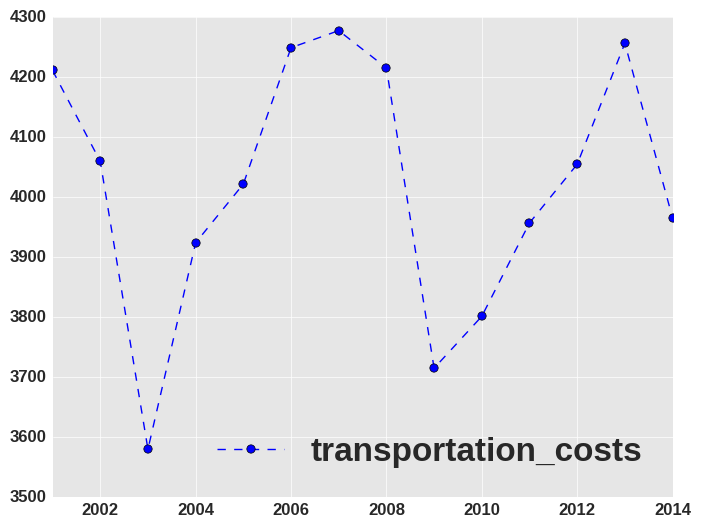

In [652]:
l = transportation_costs_df.transpose().plot(linestyle='--', marker='o')

## Health Care Costs Data Table

The model definition is specified in [Model Variable: Health Care Costs](#Health-Care-Costs).

In [526]:
health_costs_df

2001         2002         2003         2004         2005  \
health_costs  1932.71496  2012.318321  2006.776085  2136.603659  2128.872392   

                    2006         2007        2008         2009         2010  \
health_costs  2158.14434  2046.496085  2003.91239  2228.358321  2209.464019   

                     2011         2012         2013         2014  
health_costs  2229.735367  2419.270384  2417.518513  2528.386391

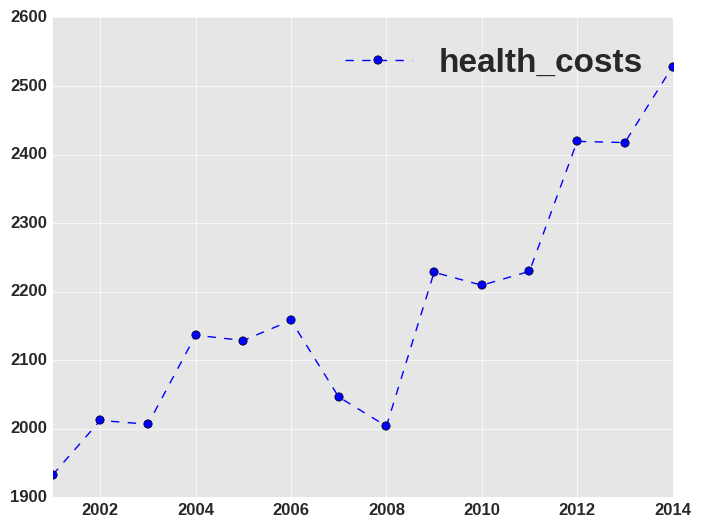

In [654]:
l = health_costs_df.transpose().plot(linestyle='--', marker='o')

## Other Necessities Cost Data Table

The model definition is specified in [Model Variable: Other Necessities Cost](#Other-Necessities-Cost)

In [528]:
other_costs_df

2001         2002         2003         2004         2005  \
other_costs  2672.458026  2873.691516  2492.637841  2800.961068  2763.890813   

                    2006         2007         2008         2009         2010  \
other_costs  2790.161546  2595.236769  2522.705462  2561.350255  2536.679344   

                    2011        2012         2013         2014  
other_costs  2509.044763  2325.19951  2159.887757  2195.290565

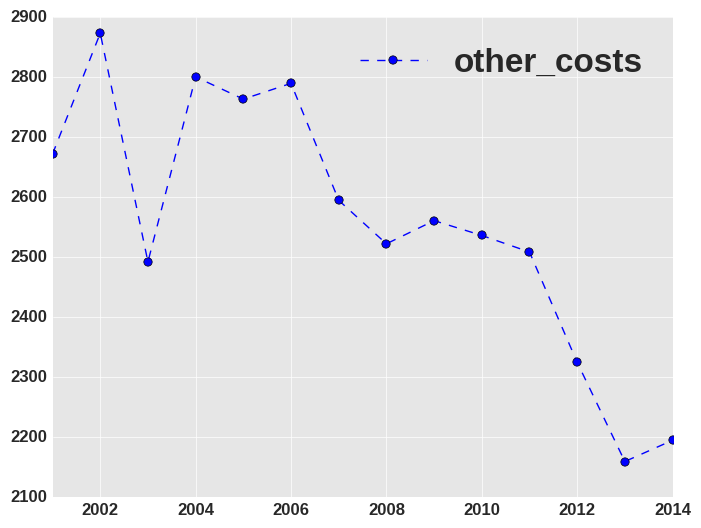

In [656]:
l = other_costs_df.transpose().plot(linestyle='--', marker='o')

## Appendix - Things to Revisit 

([TOC](#Table-of-Contents))

* Go back and redo CEX data to do proper regional weighting
* Make sure all inflation adjustments are done and done correctly
* Make sure understanding of CEX survey is solid and assignment of year is correct
* Education is not taken into account; which makes sense, but an expanded model of a 'middle class wage' might also be instructive
* Figure out the childcare costs for 2004 - 2005 and expand model into other family types outside of single adult